In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv("PH train.csv")

# EDA

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
df.shape

(1168, 81)

We have 1168 rows and 81 columns

In [5]:
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     77     1168        1168      1168  ...  1168.000000      7    237   
unique     2        4           4         1  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      41      740        1046      1168  ...          NaN      3    129   
mean     NaN      NaN         NaN       NaN  ...     3.448630    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    44.896939    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           44   1168.000000  1168.000000  1168.000000      1168   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            40           NaN          NaN          NaN       999   
mean           NaN     47.315068     6.344178  2007.804795       NaN   
std            NaN    543.264432     2.686352     1.329738       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1168    1168.000000  
unique              6            NaN  
top            Normal            NaN  
freq              945            NaN  
mean              NaN  181477.005993  
std               NaN   79105.586863  
min               NaN   34900.000000  
25%               NaN  130375.000000  
50%               NaN  163995.000000  
75%               NaN  215000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

We can observer dataset have large values and is not normally distributed

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

We have int,float and object type variables in dataset

In [7]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

'MiscFeature','PoolQC','Fence','FireplaceQu','Alley','GarageQual','GarageCond','GarageFinish','GarageYrBlt','GarageType','BsmtQual','BsmtCond','MasVnrType','MasVnrArea','BsmtExposure,'BsmtFinType2','BsmtFinType1','LotFrontage' have null values

In [8]:
df.drop(['MiscFeature','PoolQC','Fence','FireplaceQu','Alley','Id'],inplace=True,axis=1)

Dropped the columns count of null values is large

In [9]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0].strip(),inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0].strip(),inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0].strip(),inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0].strip(),inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0].strip(),inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0].strip(),inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0].strip(),inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0].strip(),inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0].strip(),inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

Replaced the null values

In [10]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 75 columns]

No Duplicate row is present

In [11]:
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',  'Heating','HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
        'Functional',  'GarageType','GarageFinish', 'GarageQual','GarageCond', 'PavedDrive',  'SaleType',
       'SaleCondition']

In [12]:
l = list(df.columns)
continous_columns=[]
for i in l:
    if(i not in categorical_columns):
        continous_columns.append(i)

In [13]:
print(continous_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


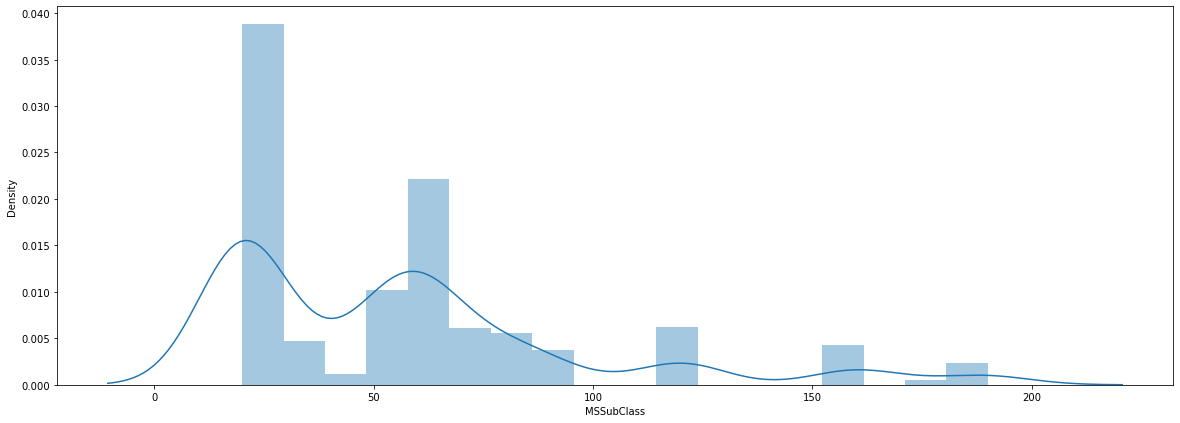

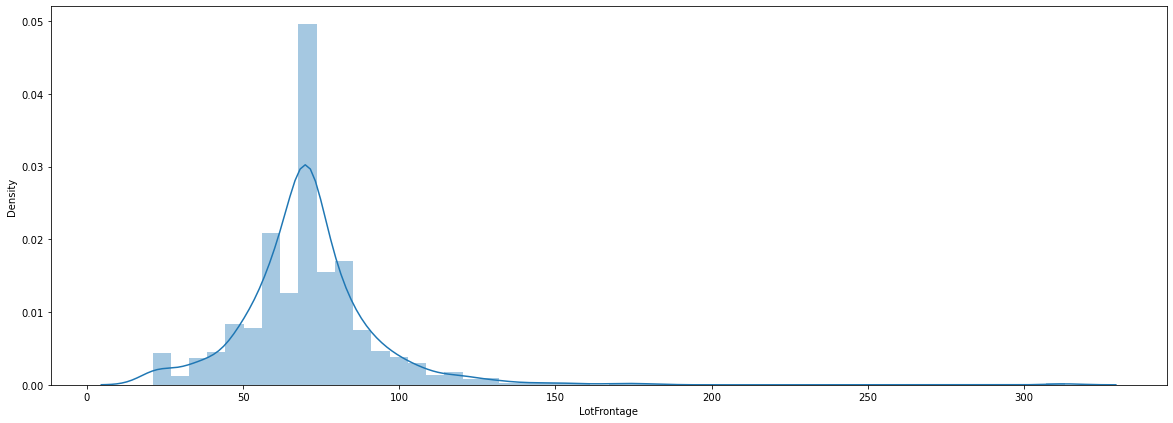

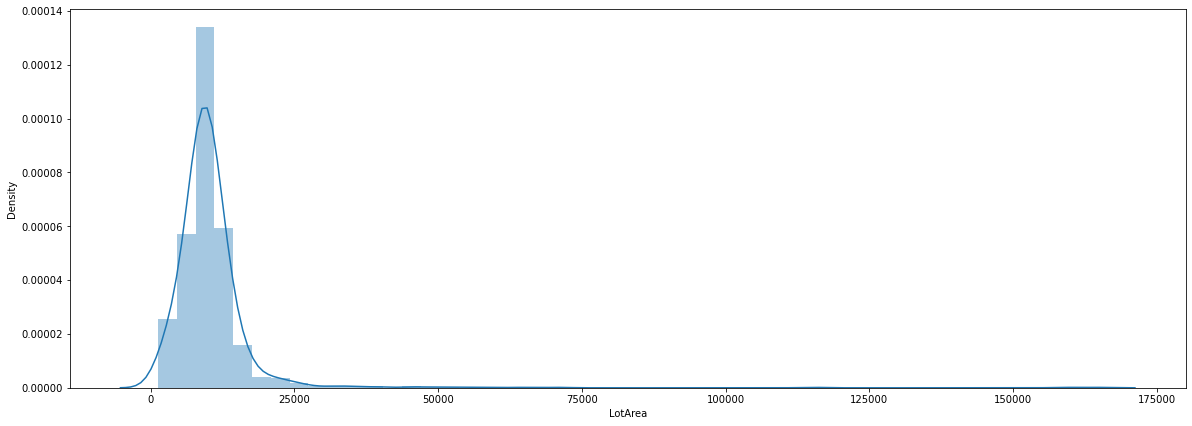

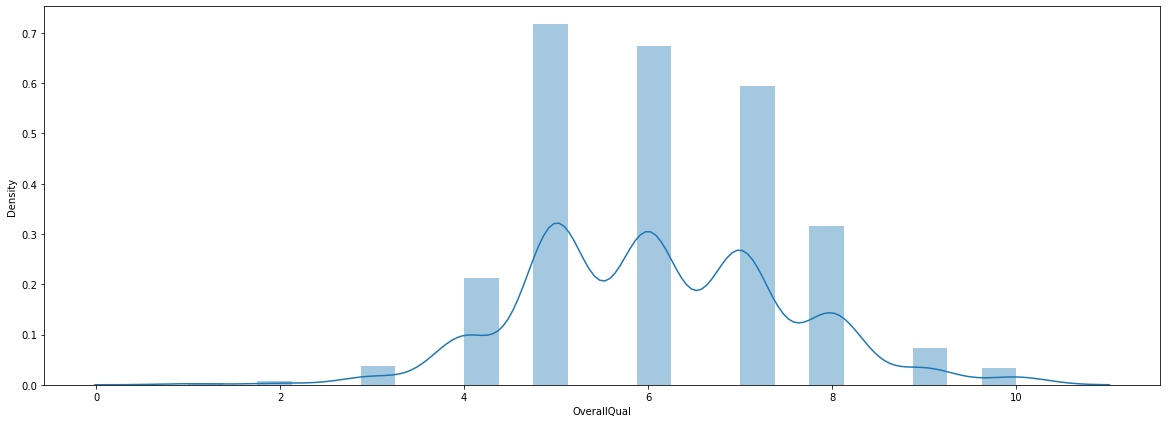

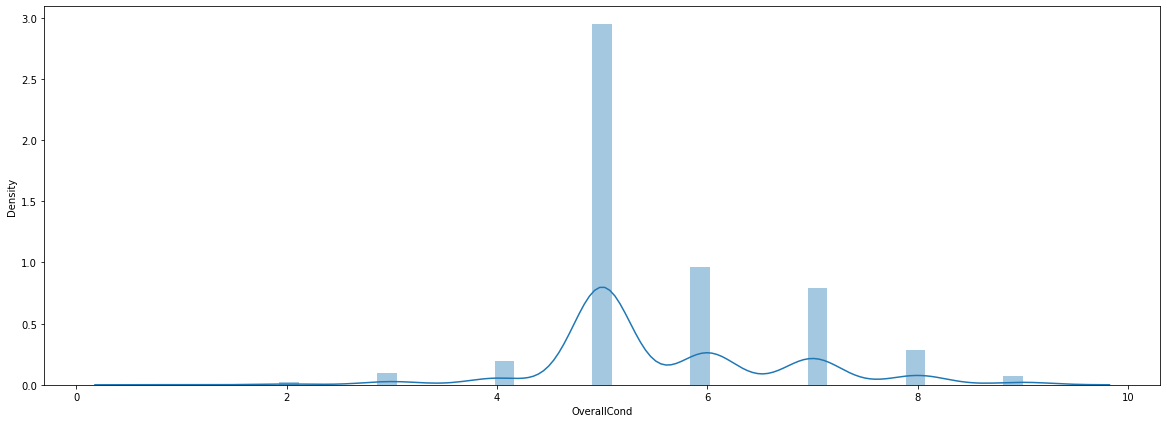

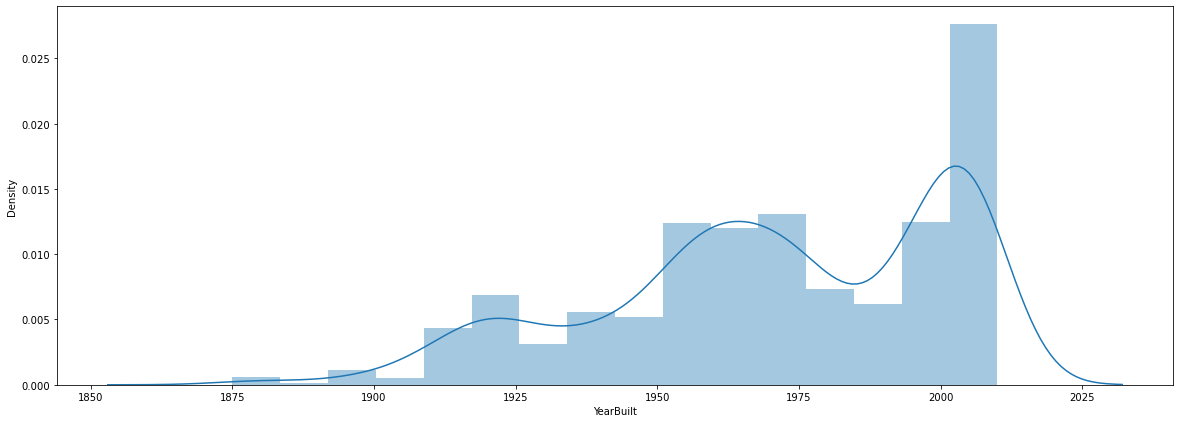

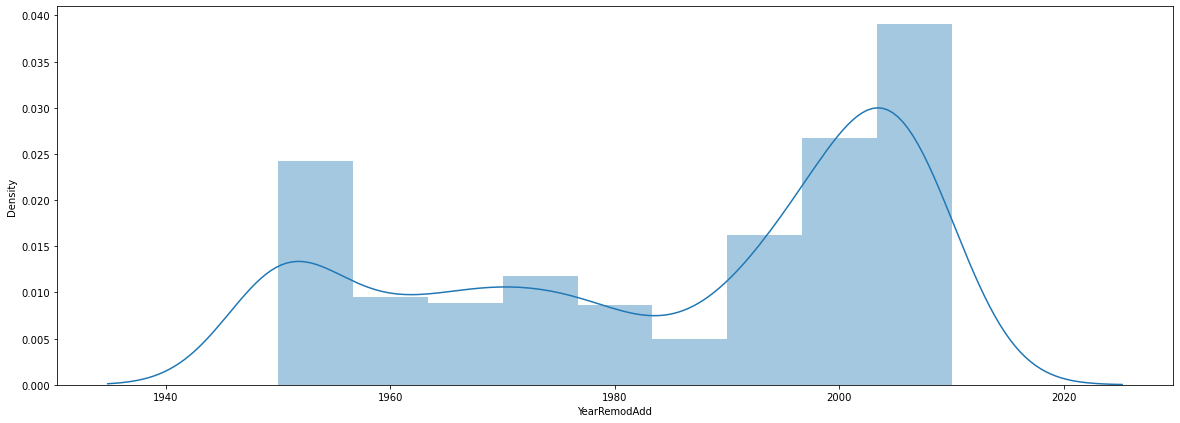

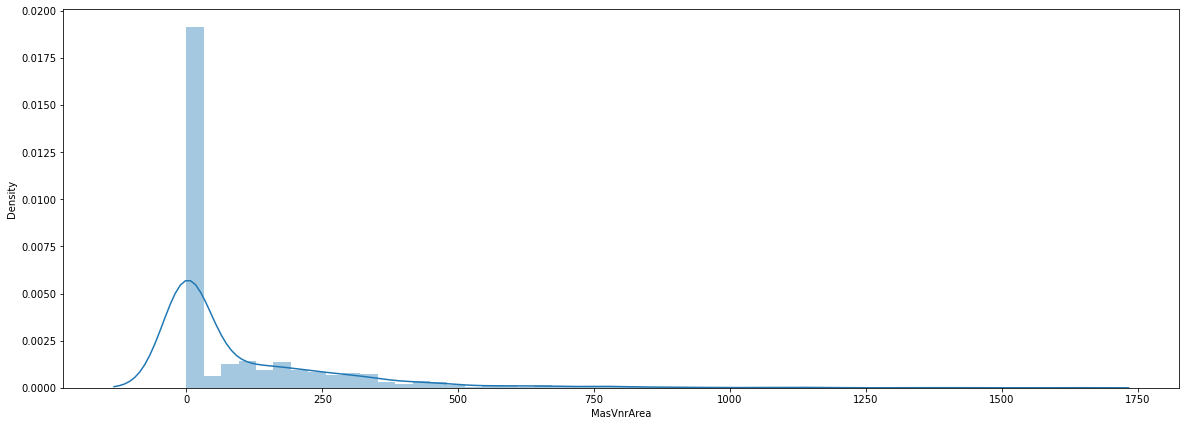

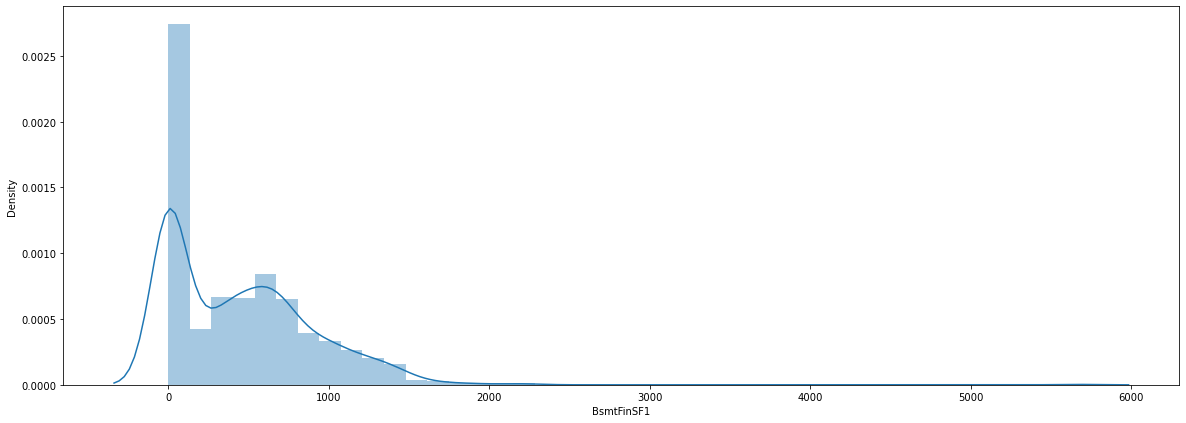

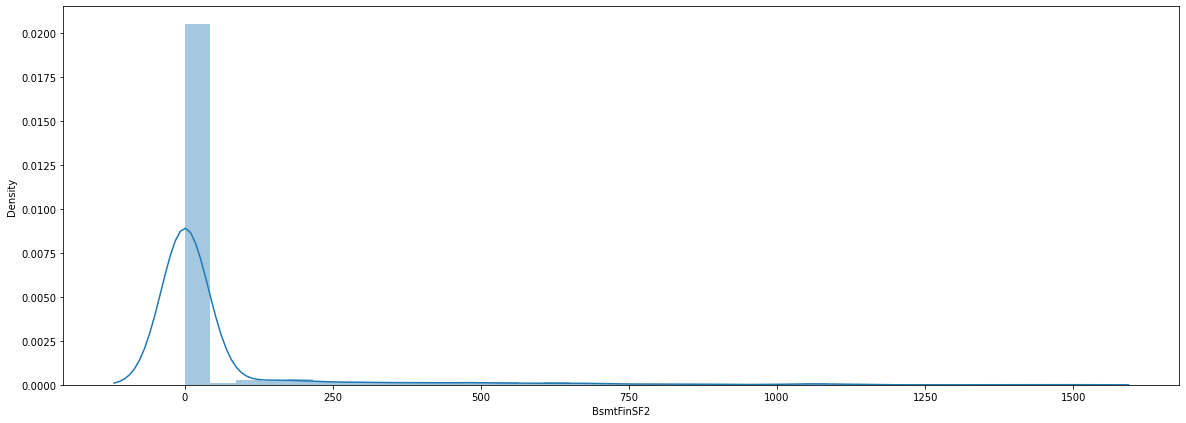

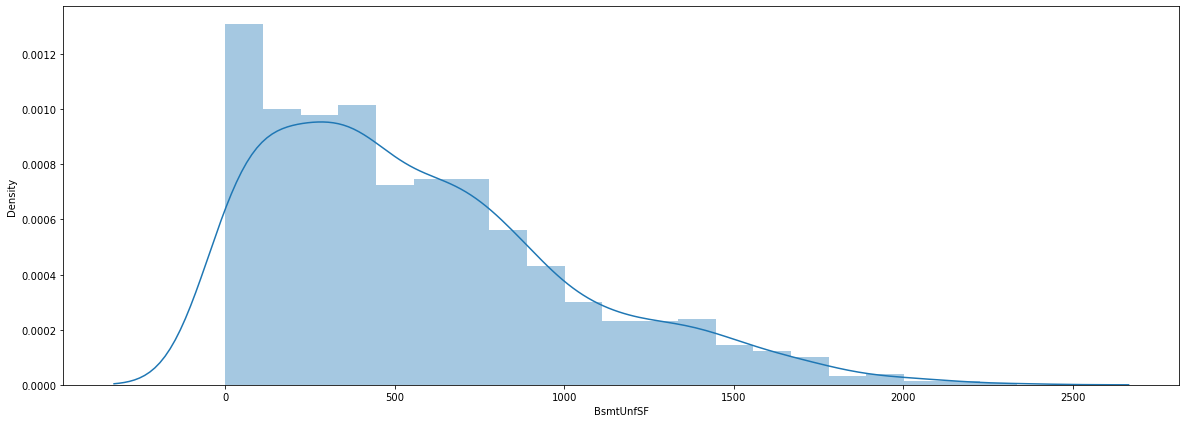

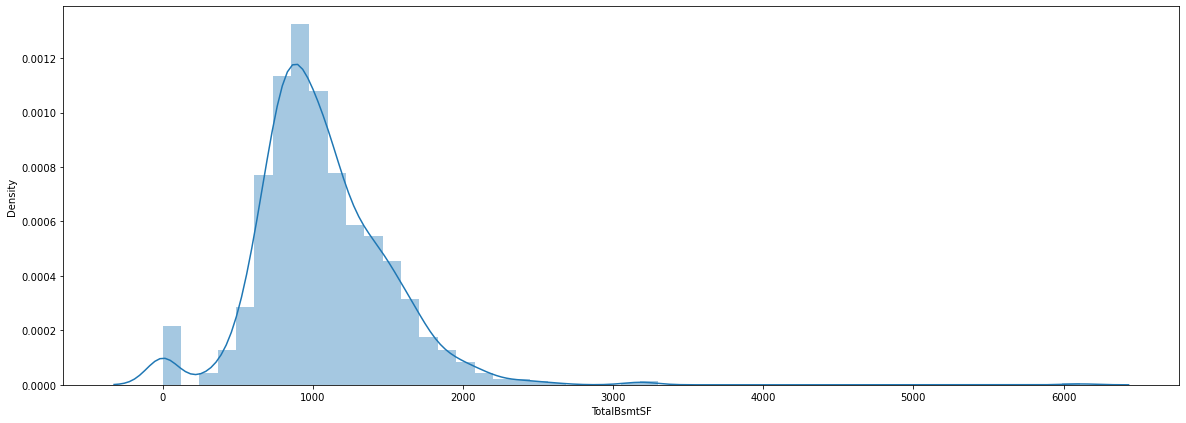

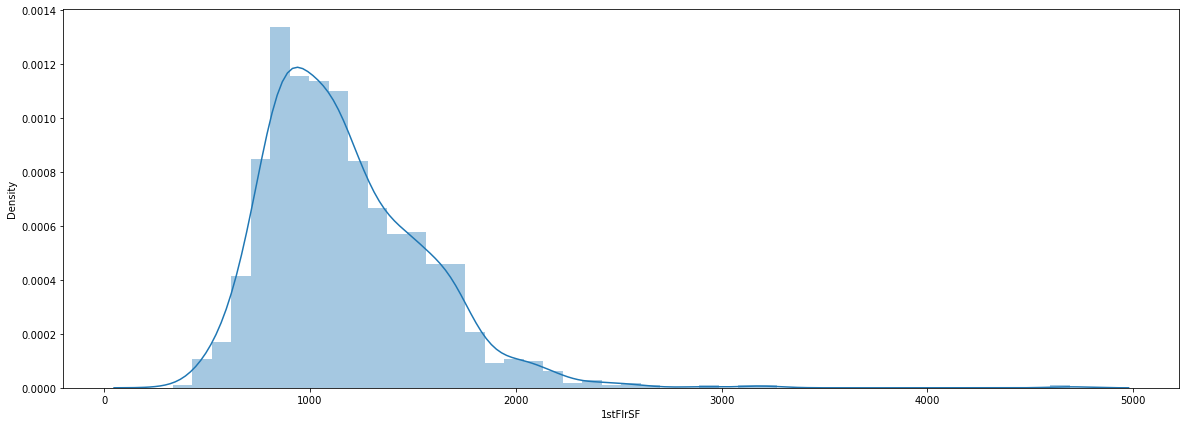

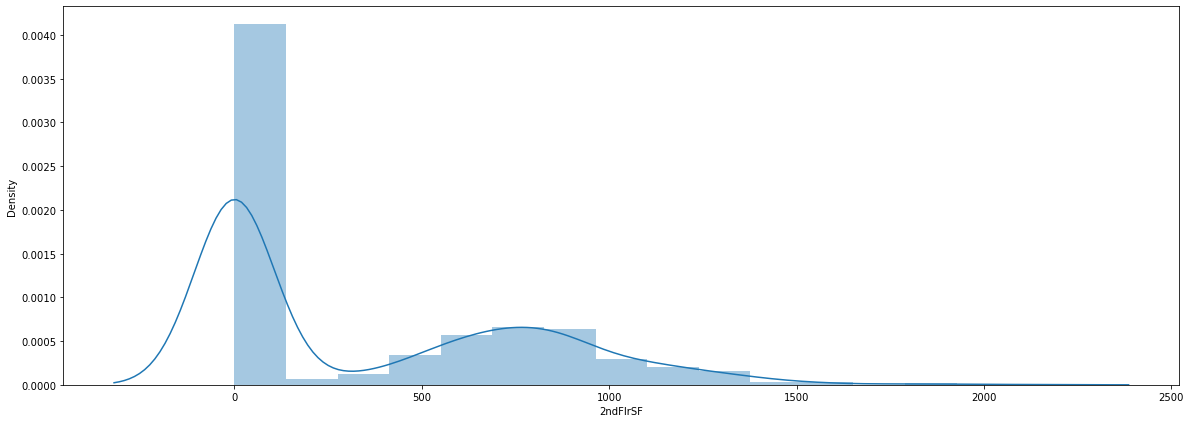

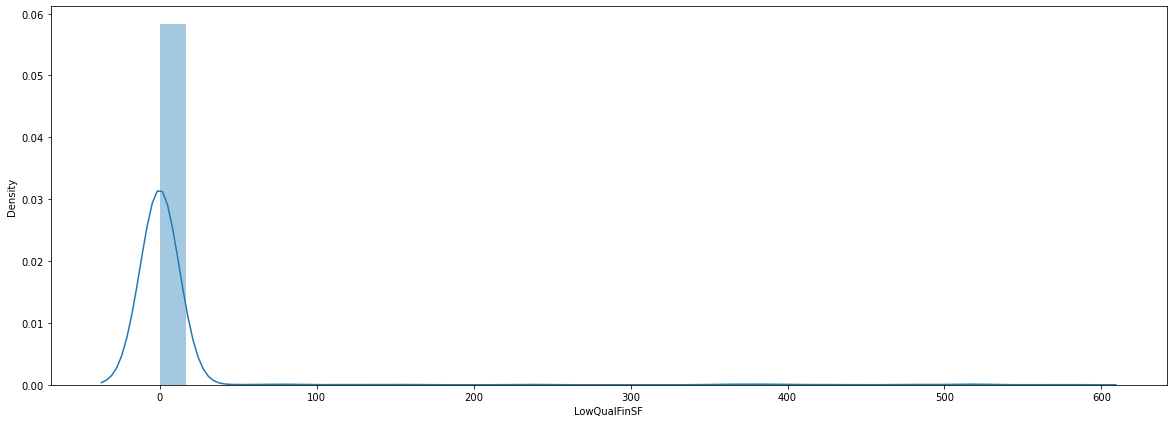

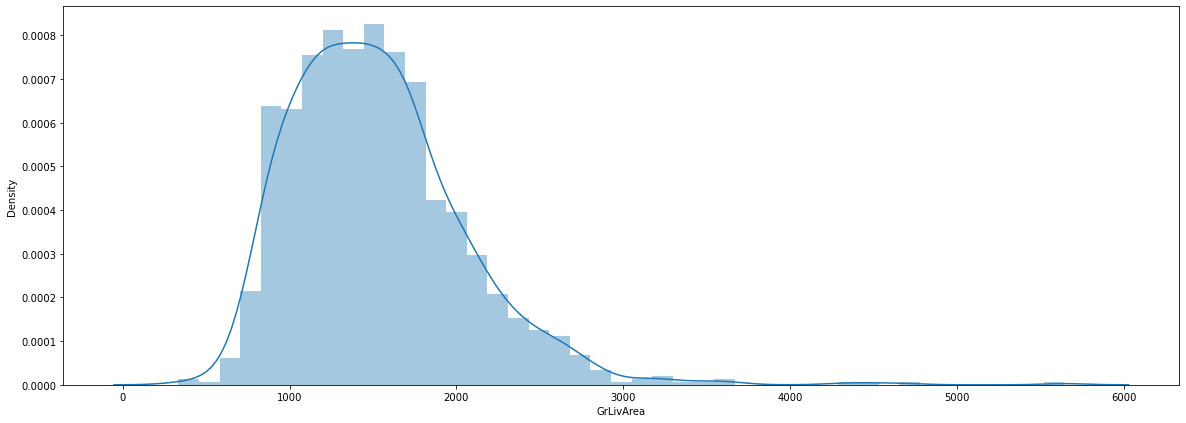

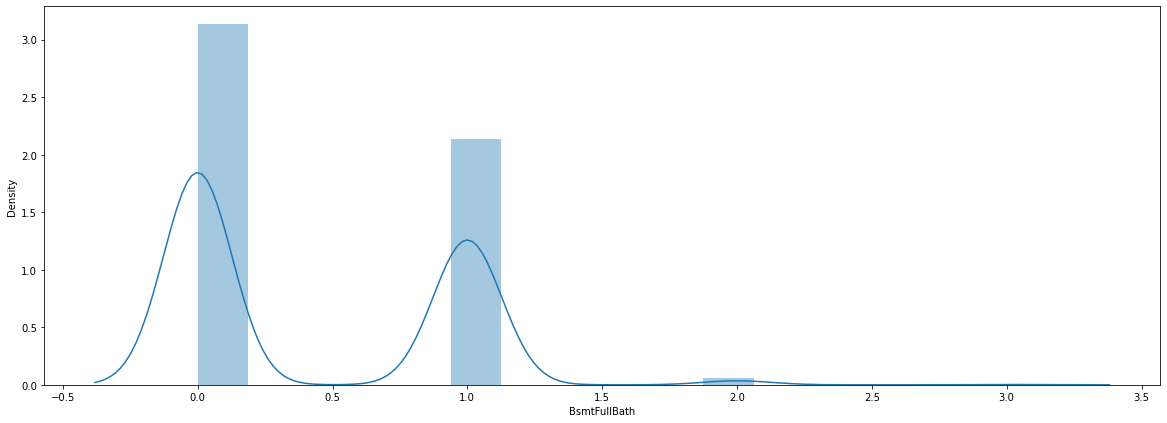

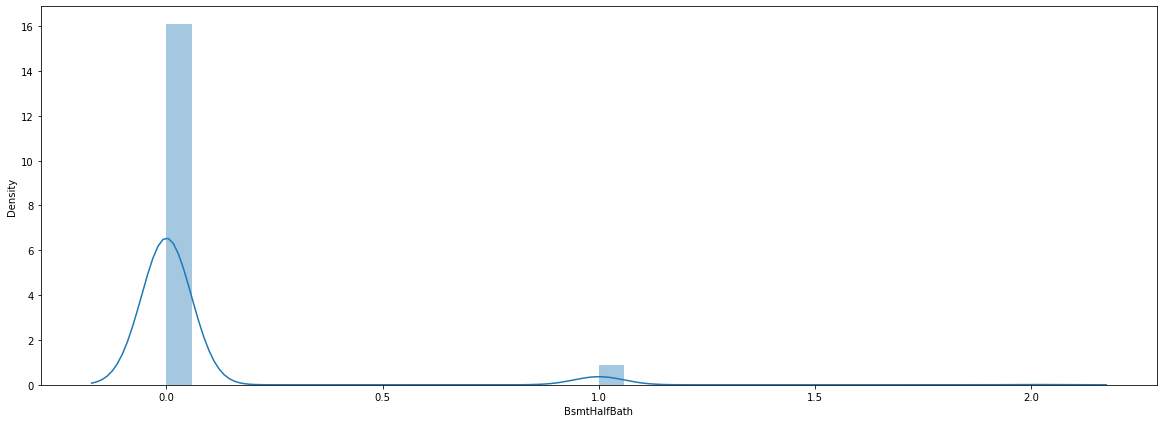

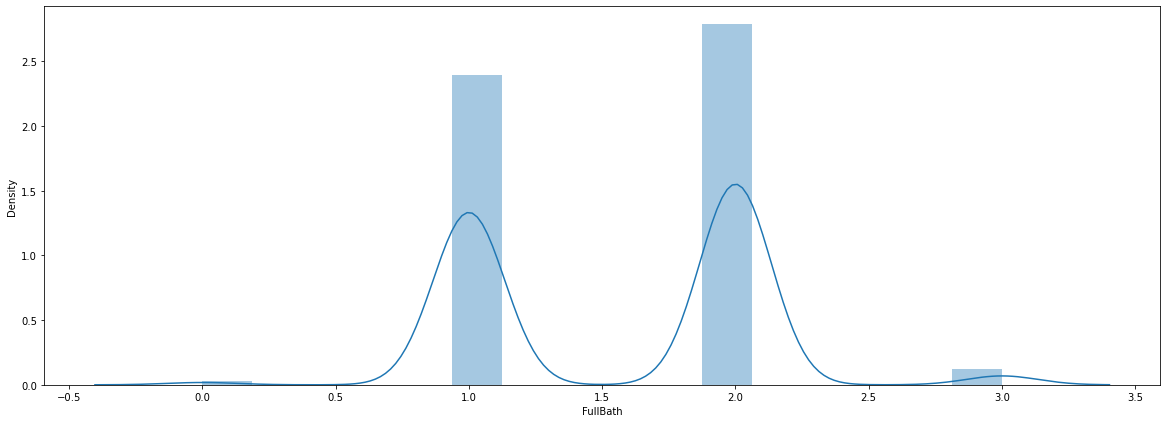

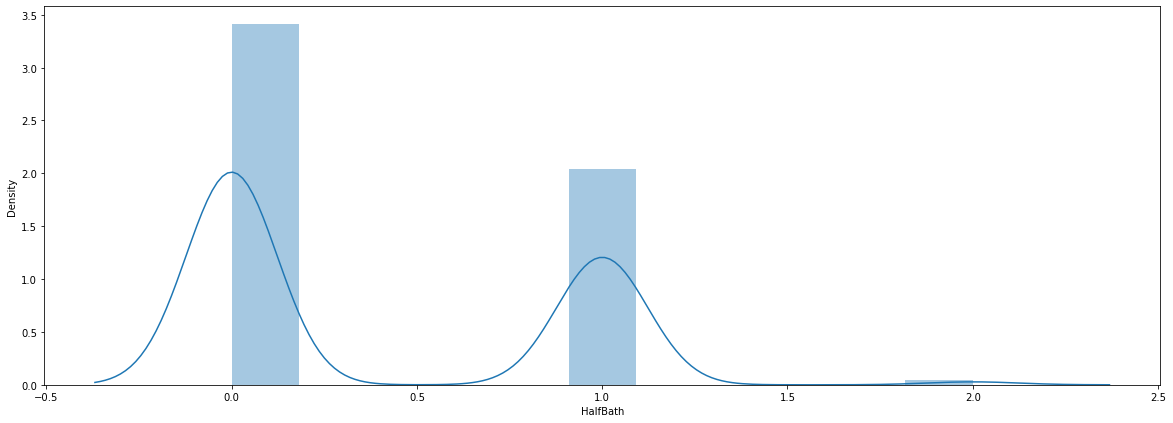

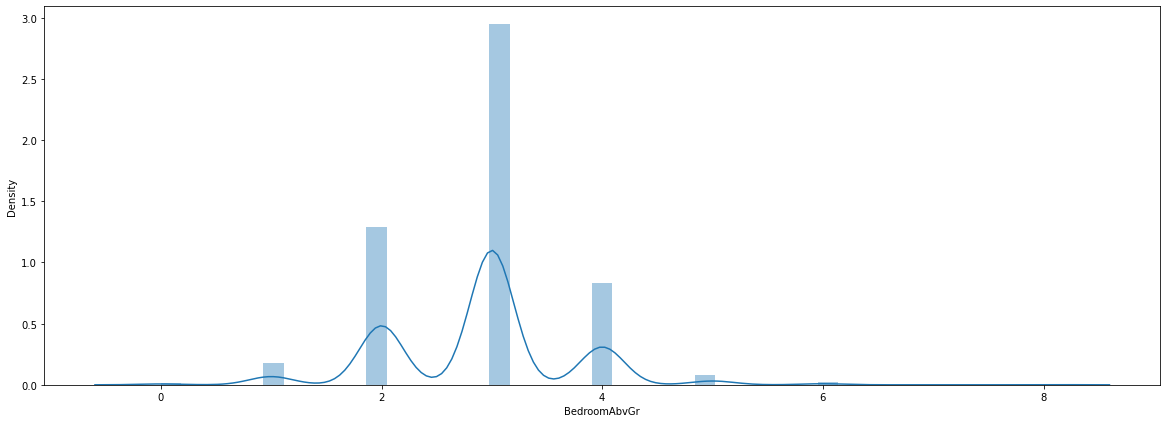

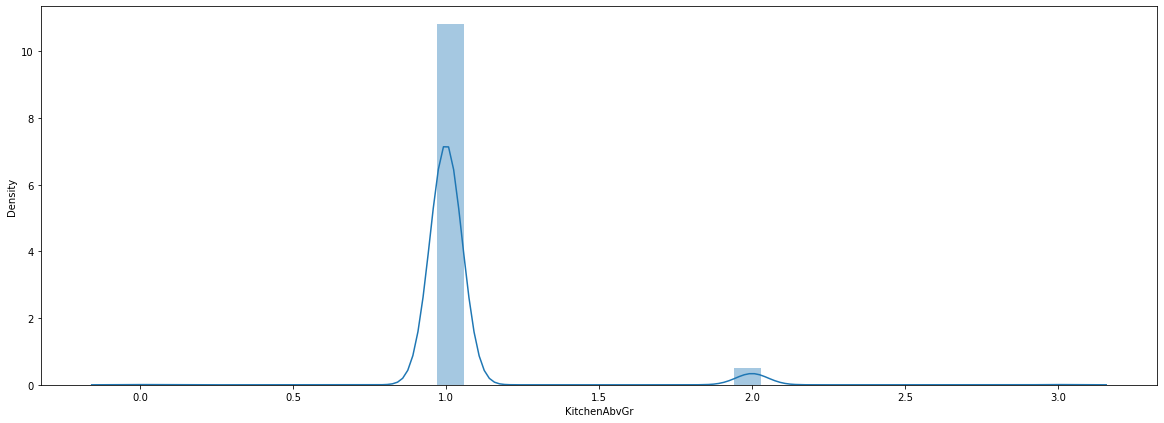

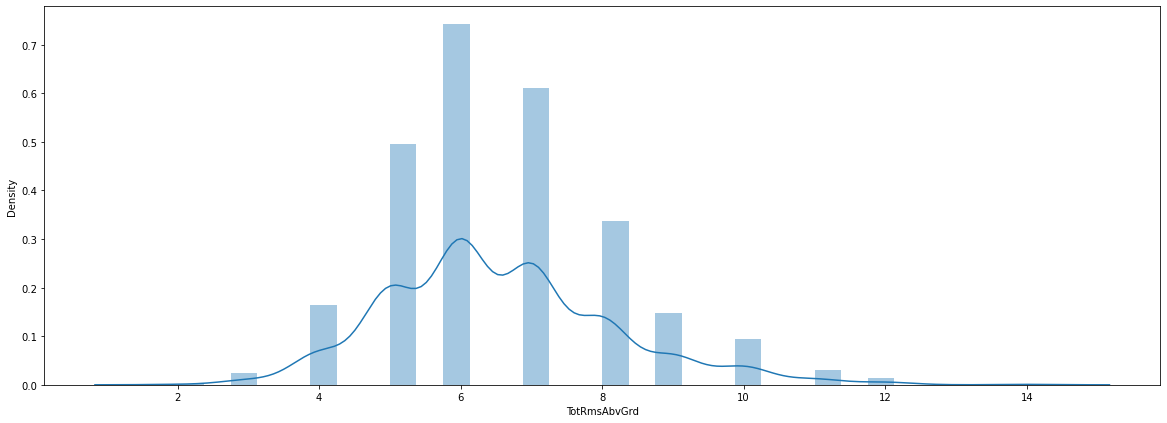

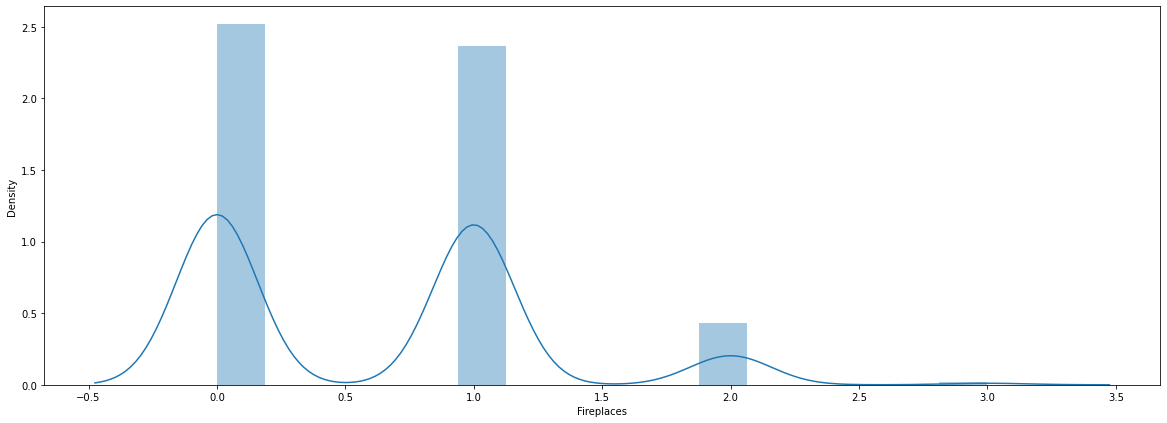

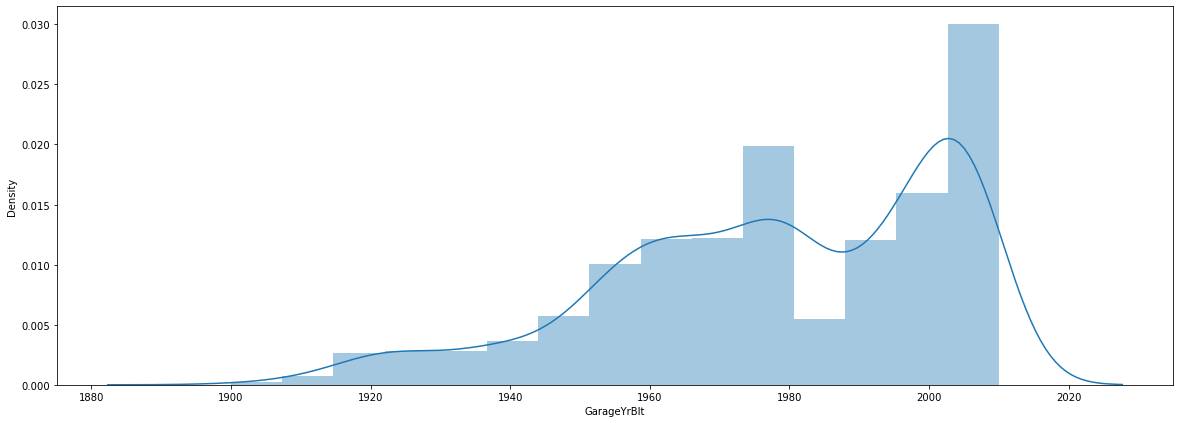

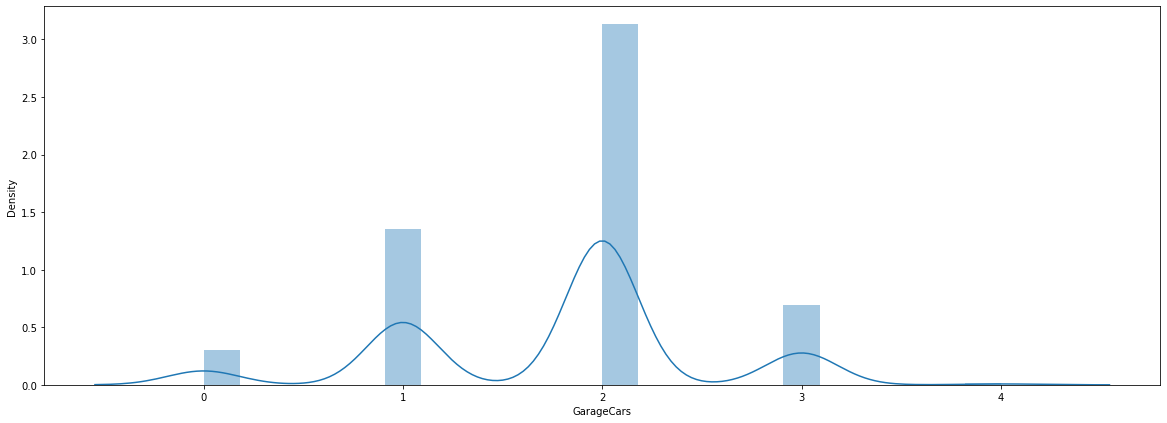

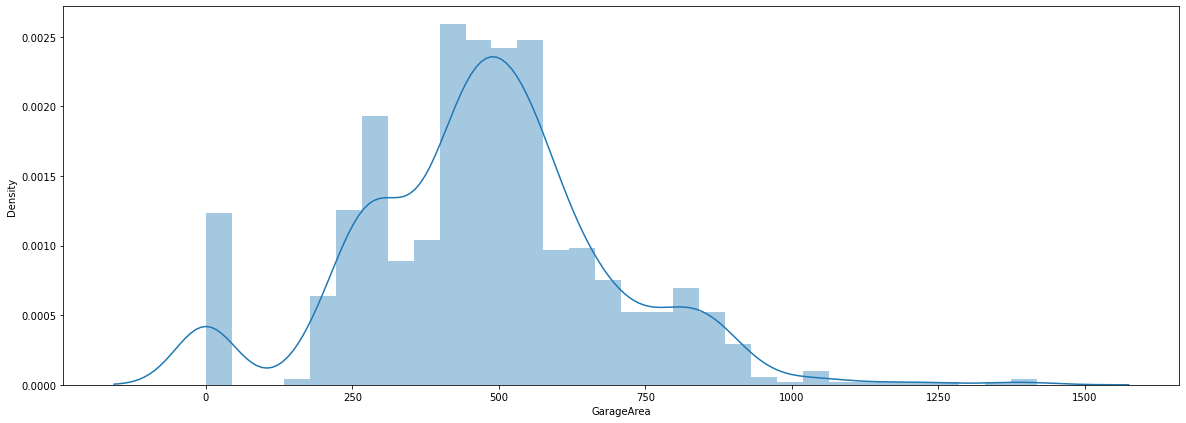

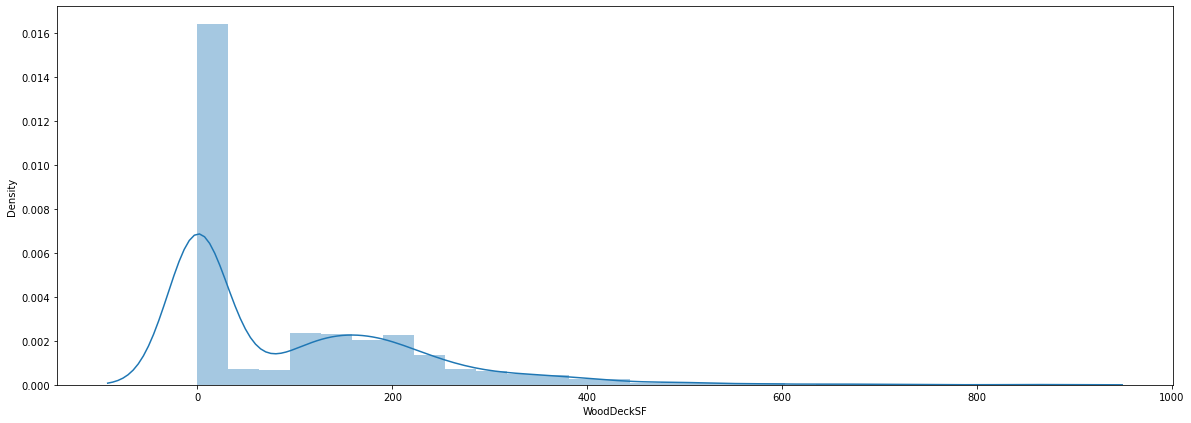

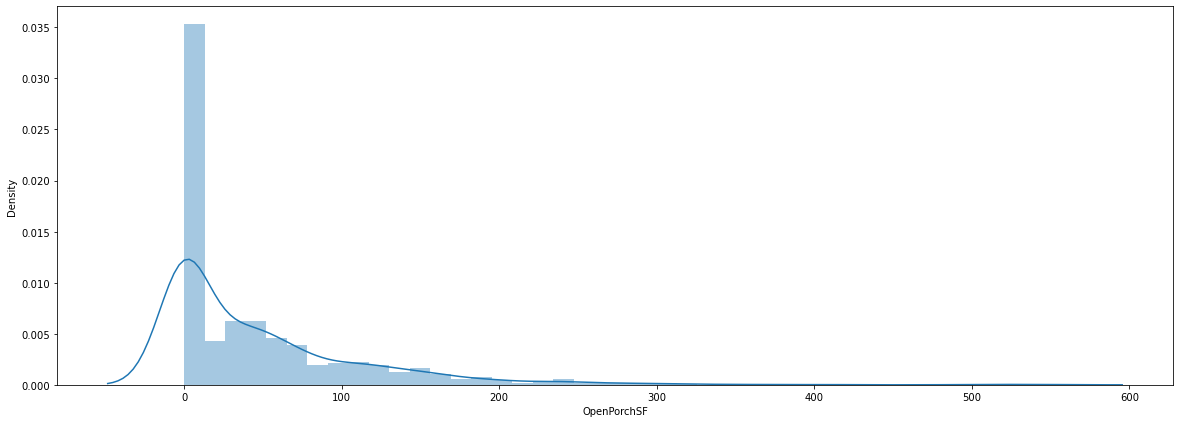

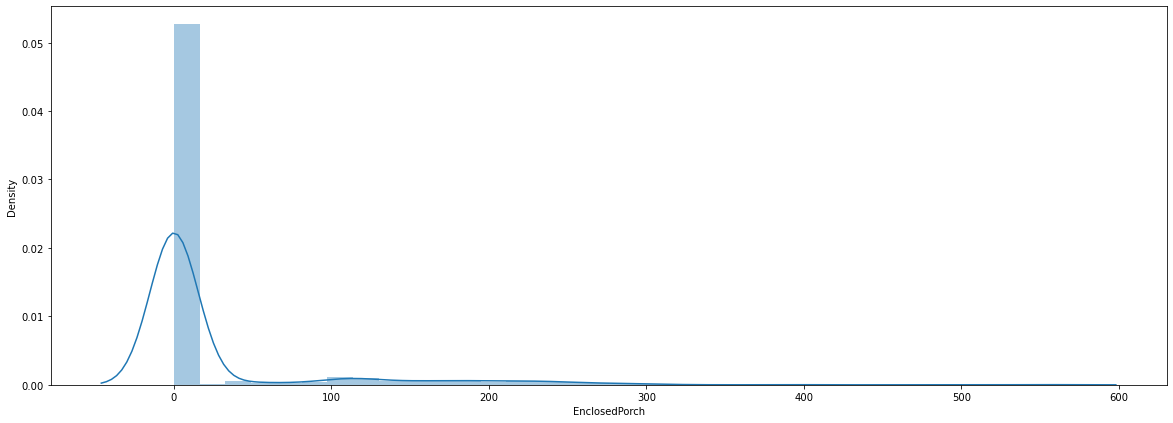

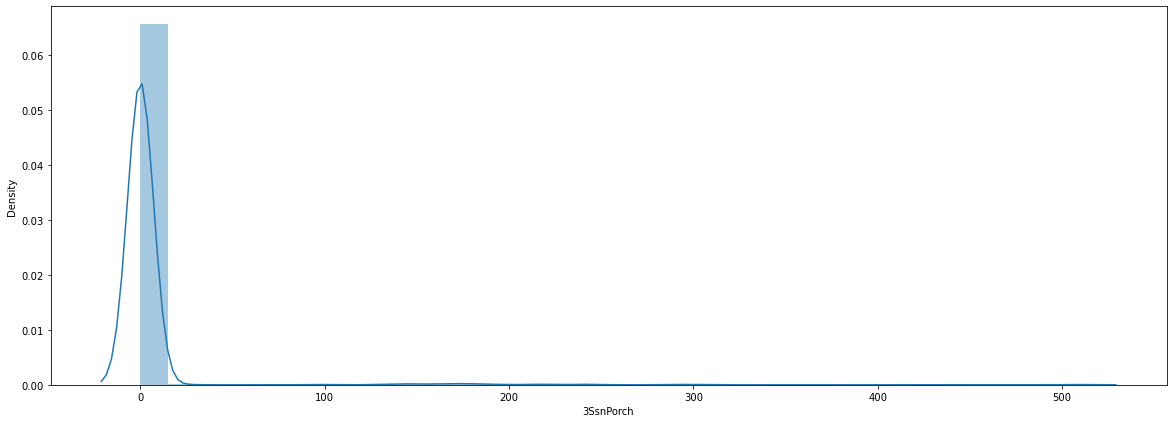

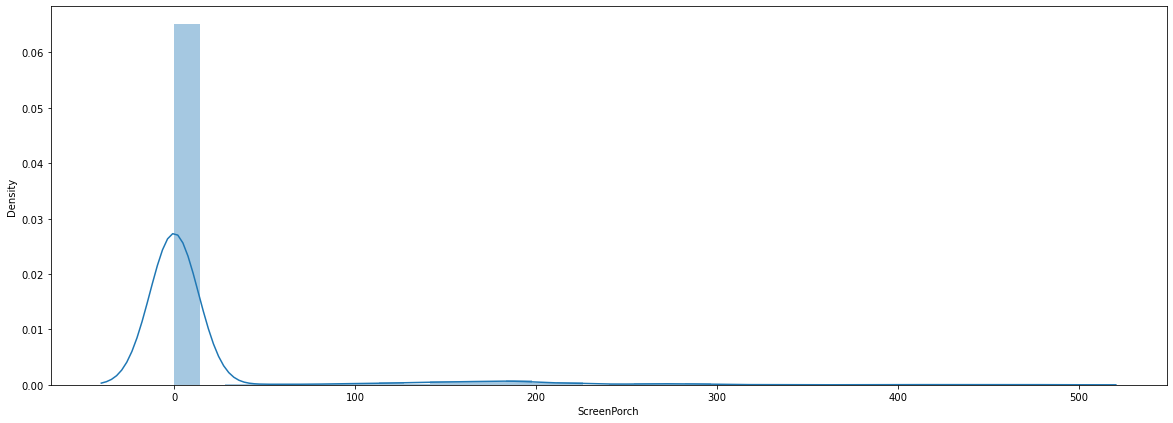

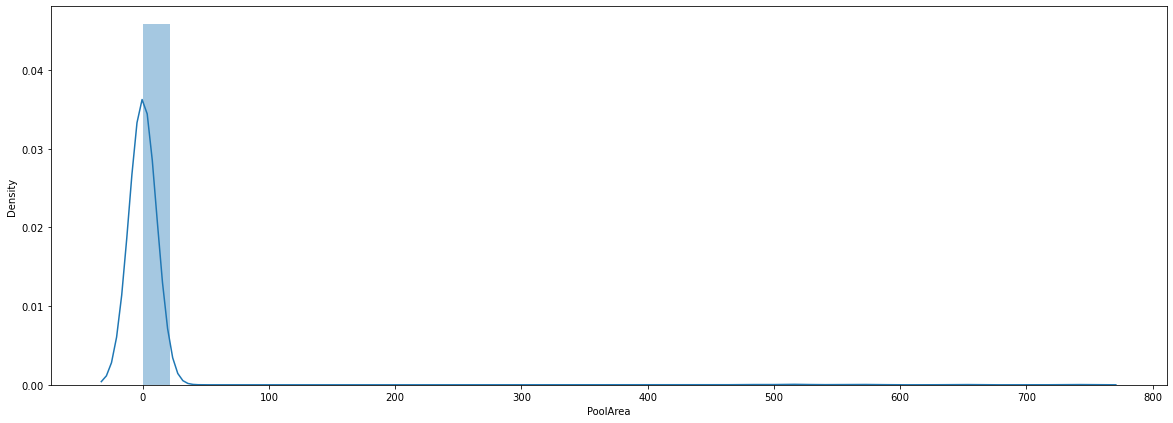

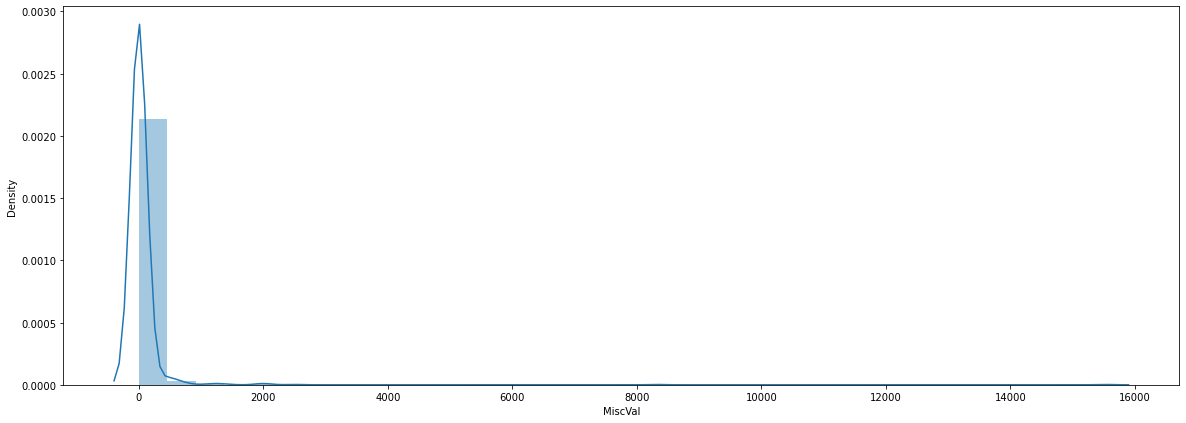

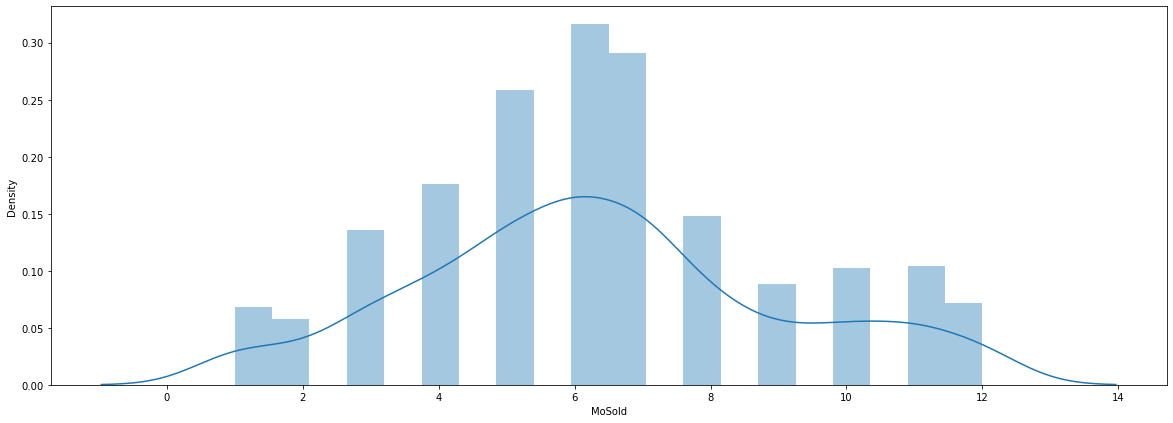

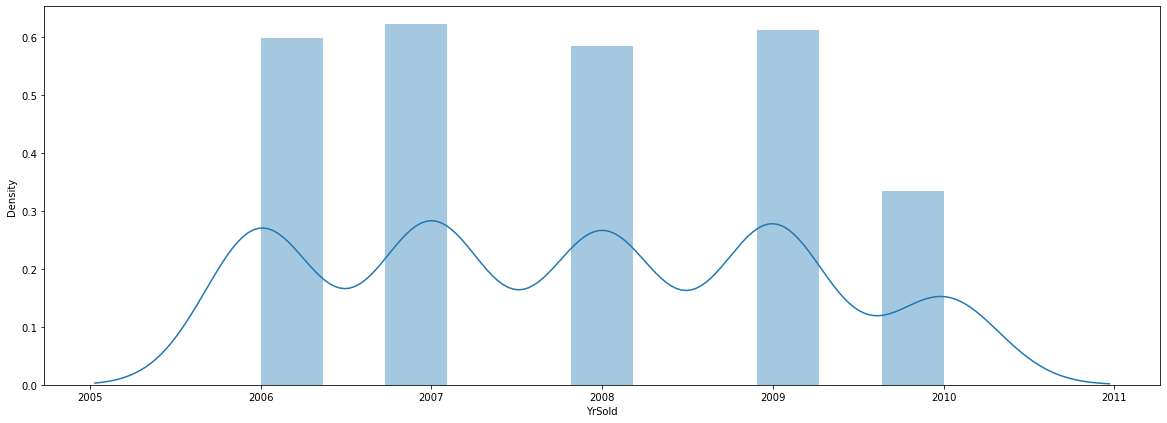

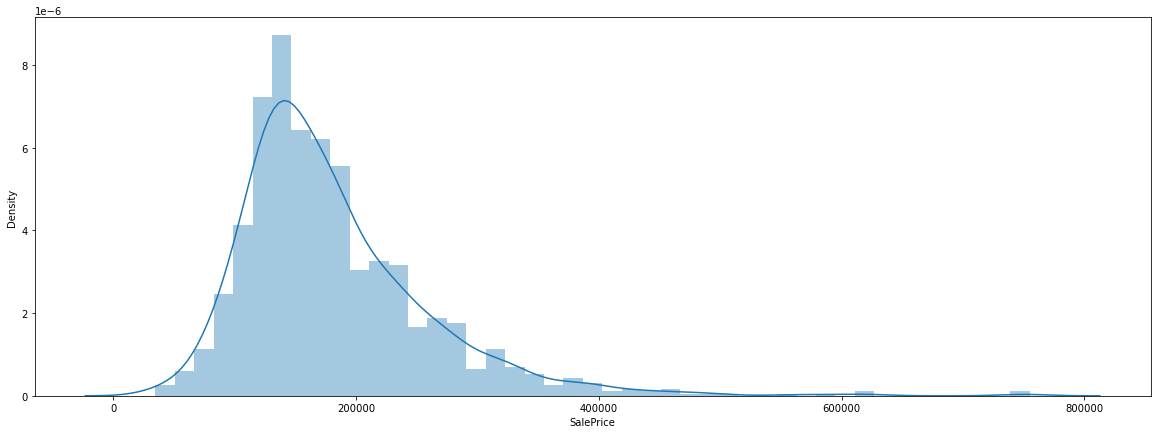

In [14]:

counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.distplot(df[continous_columns[i]])
        plt.show()

    MSSubClass -> not normally distributed
    LotFrontage -> normally distributed
    LotArea -> Normally distributed
    OverallQual-> Not normally distributed
    Overall cond-> Not normally distributed
    Year Built -> Not  normally distributed
    Year remod add->not normally distributed
    BsmtFinSF1 ->not normally distributed
    GaragerBlt ->not normally distributed
    Garage Area -> not normally distributed

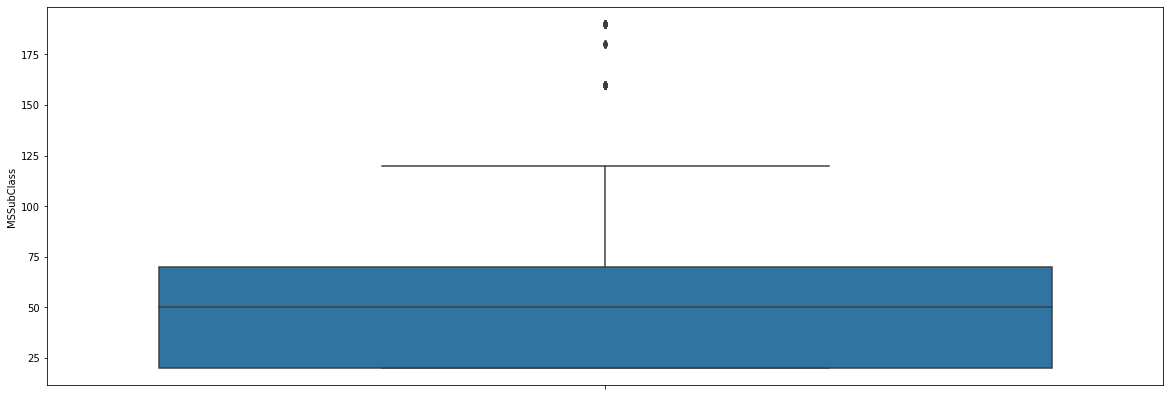

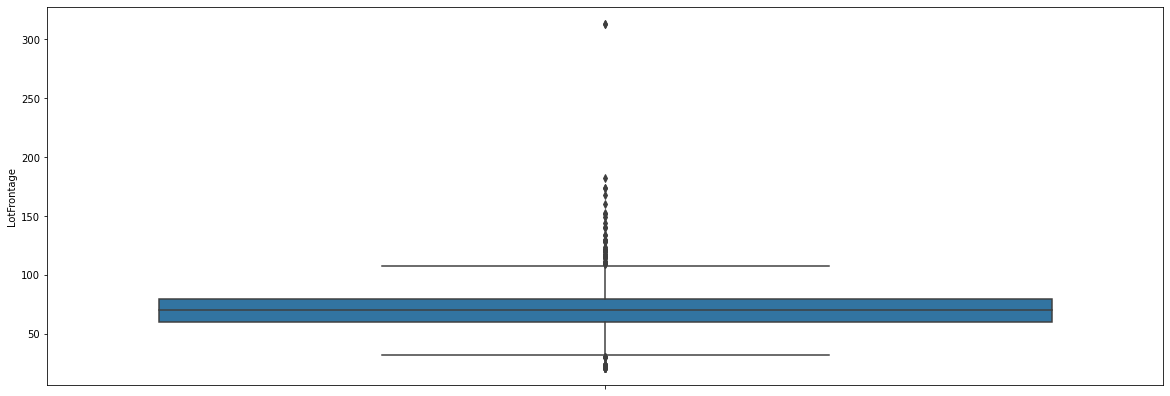

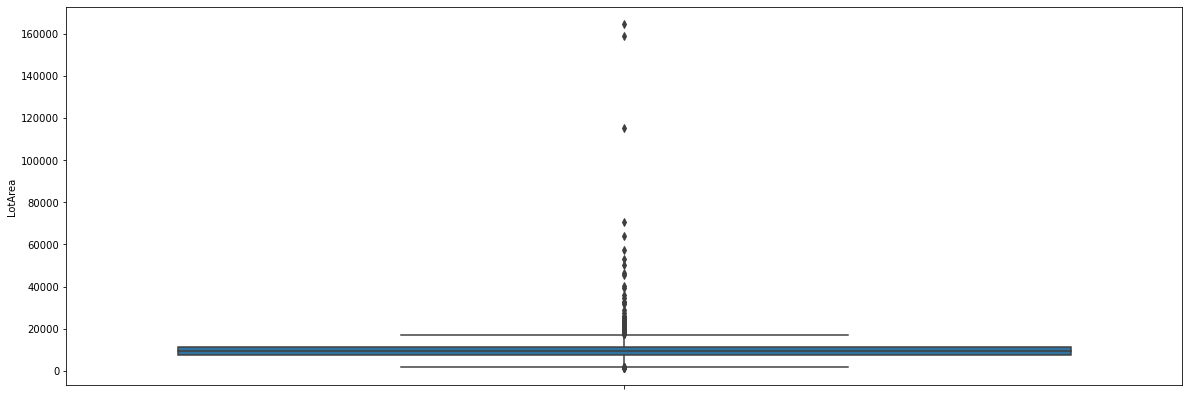

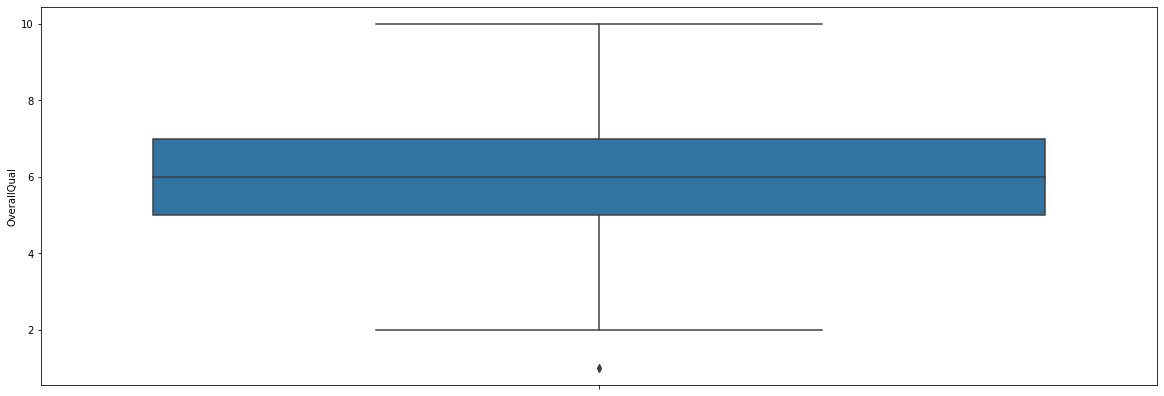

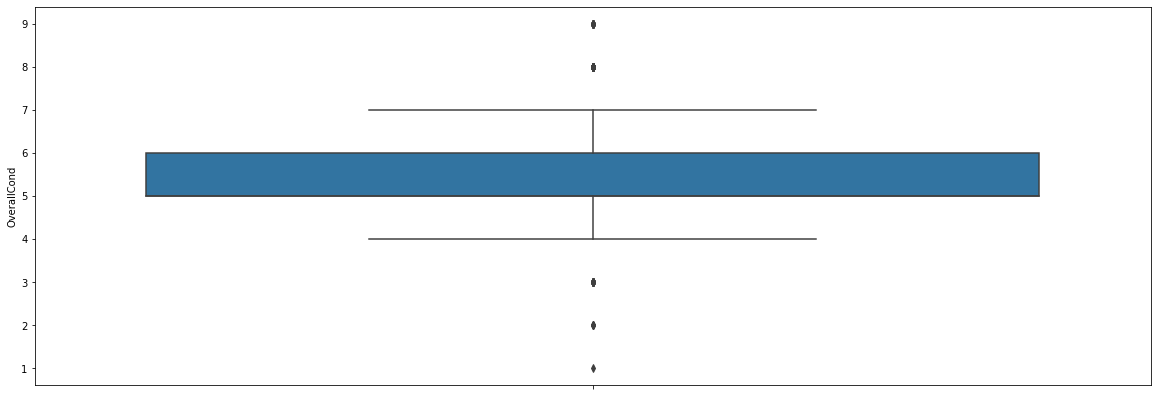

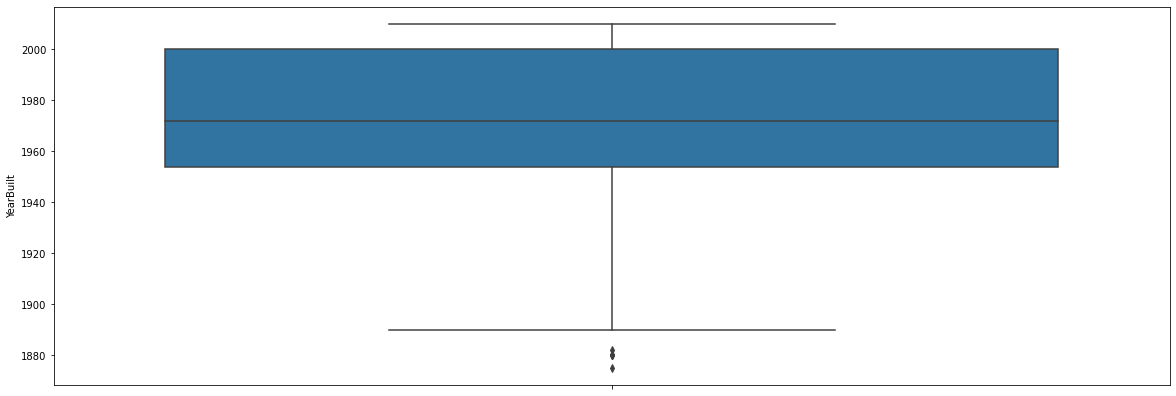

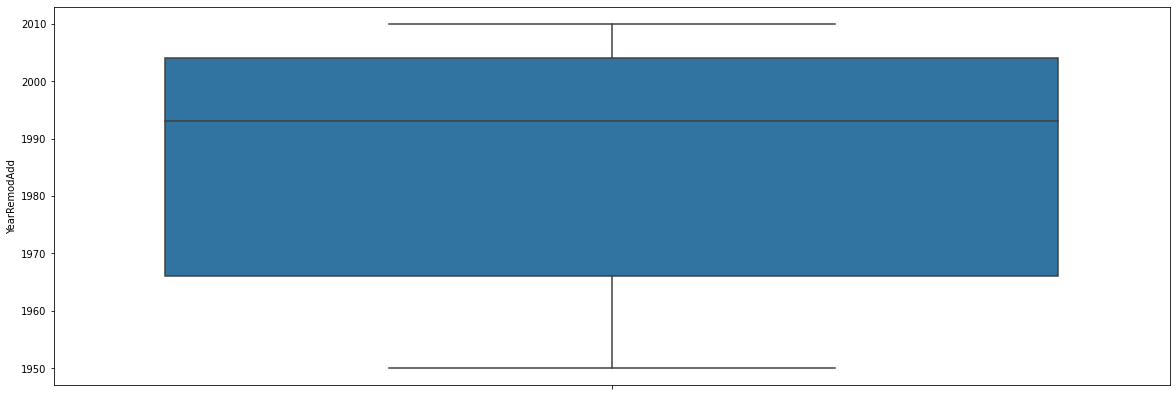

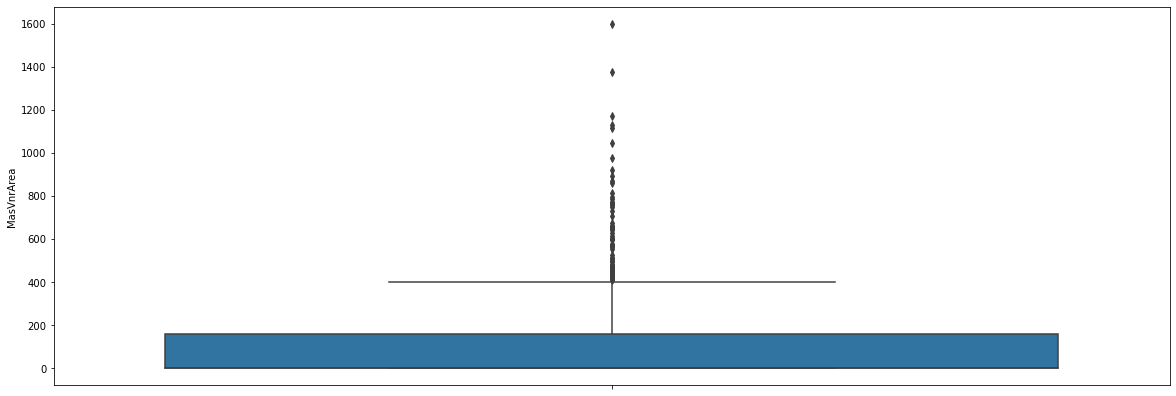

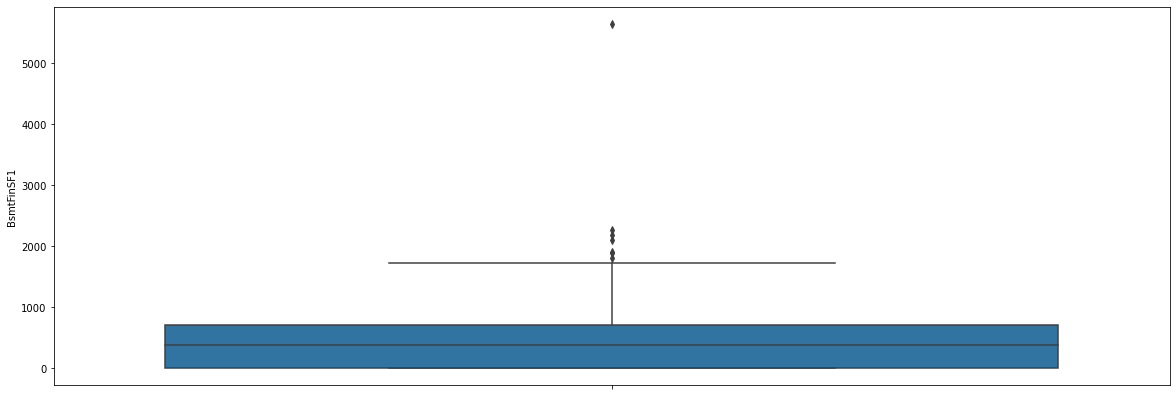

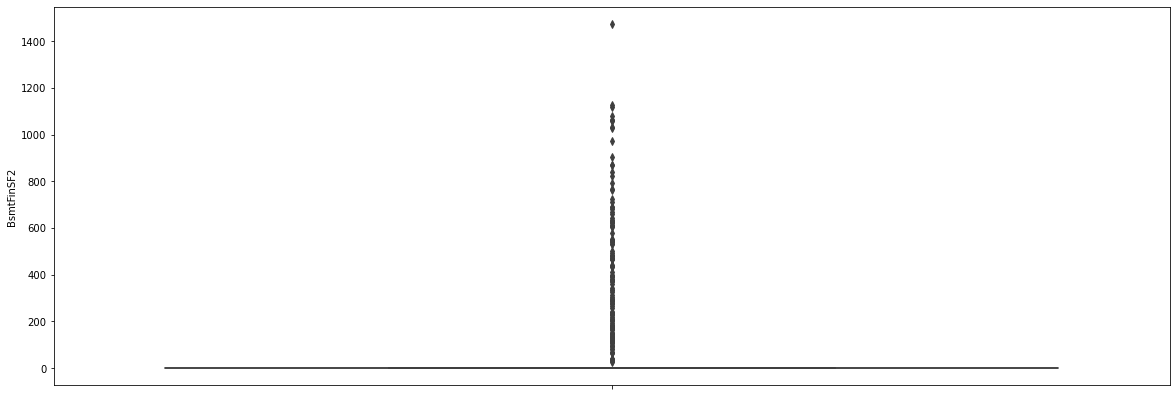

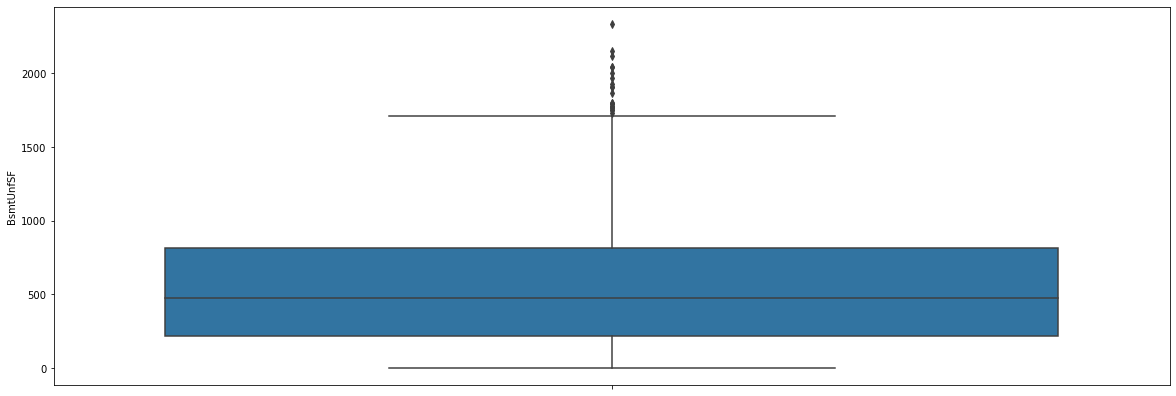

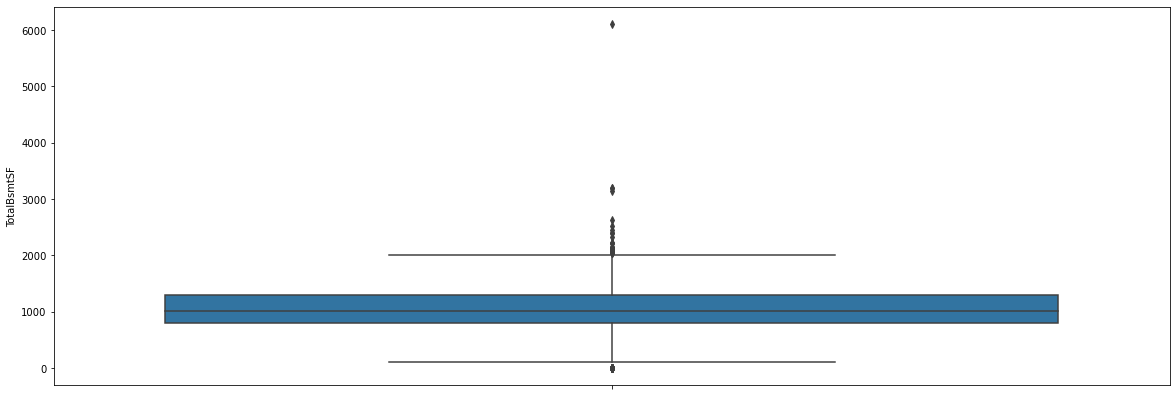

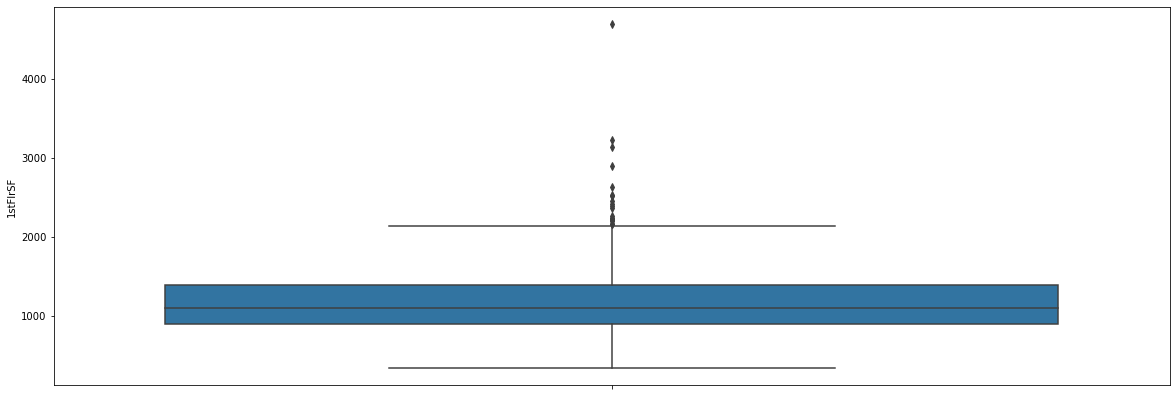

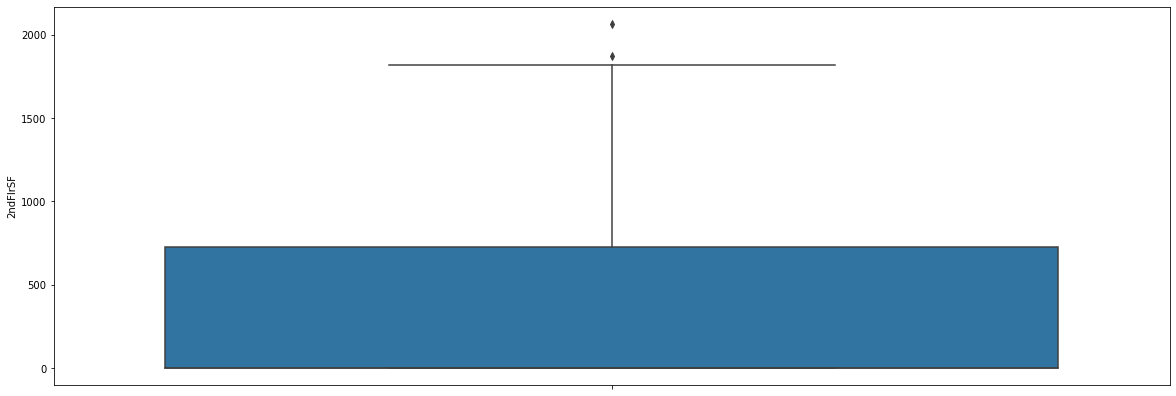

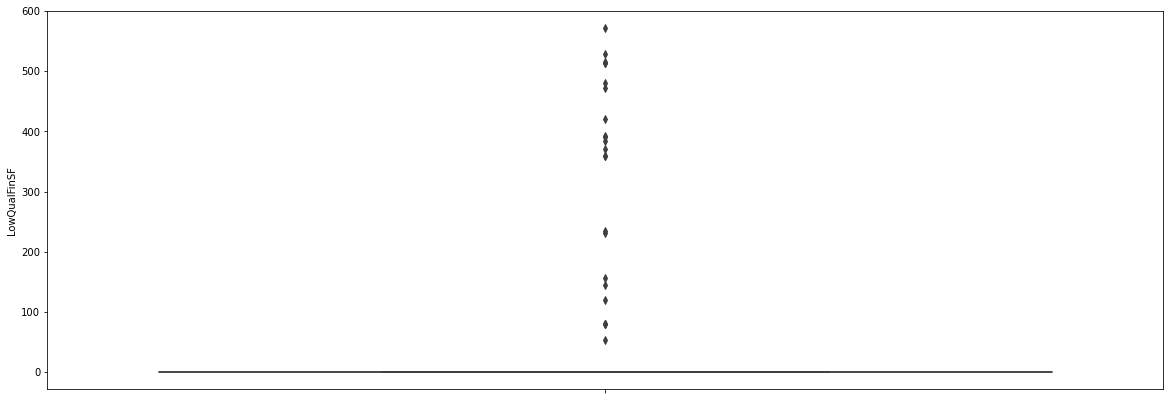

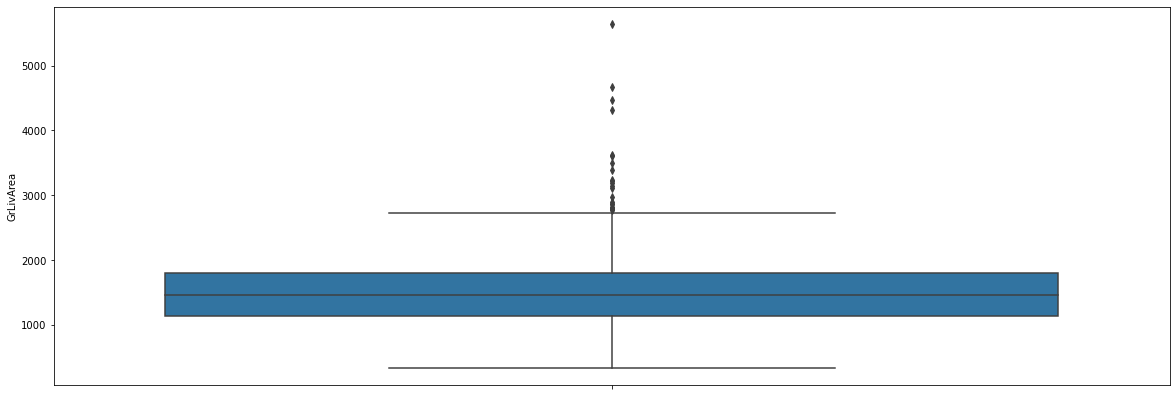

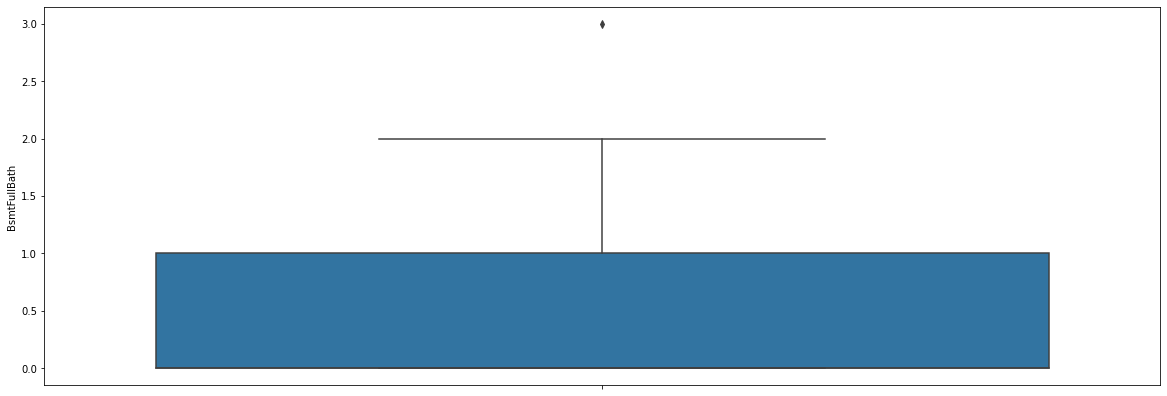

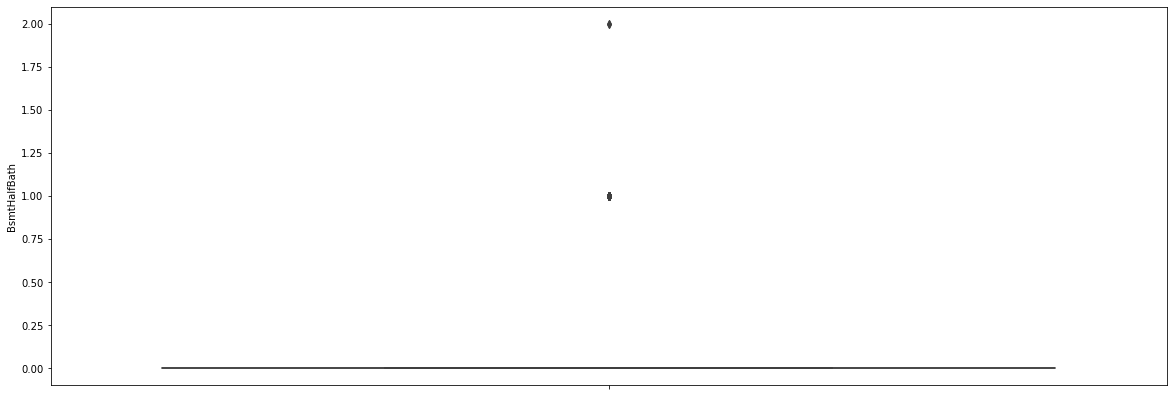

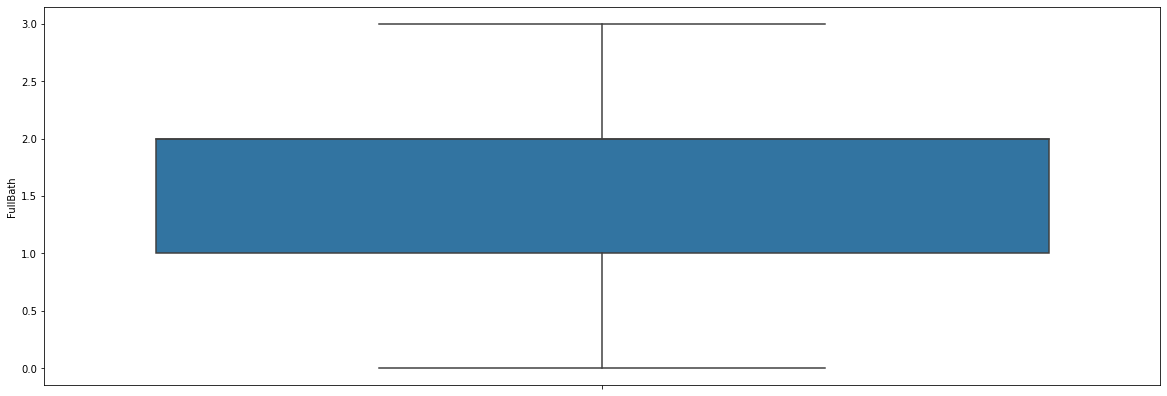

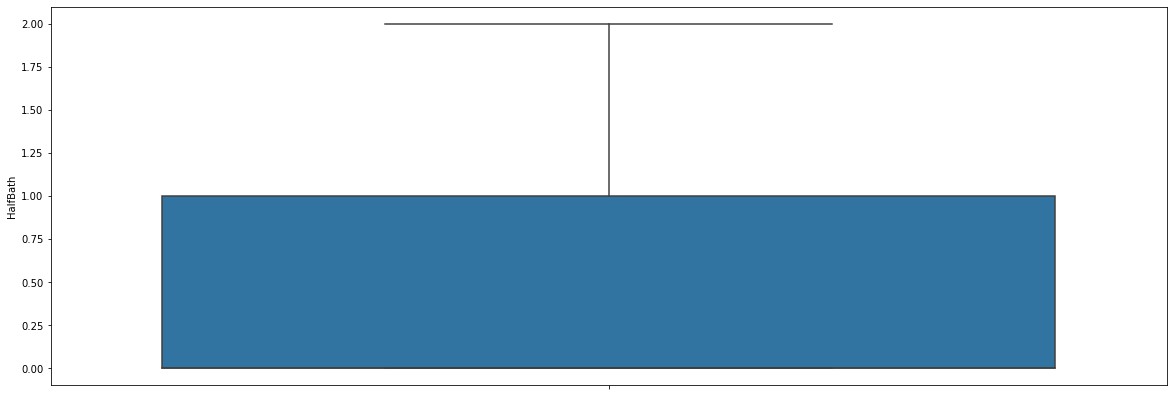

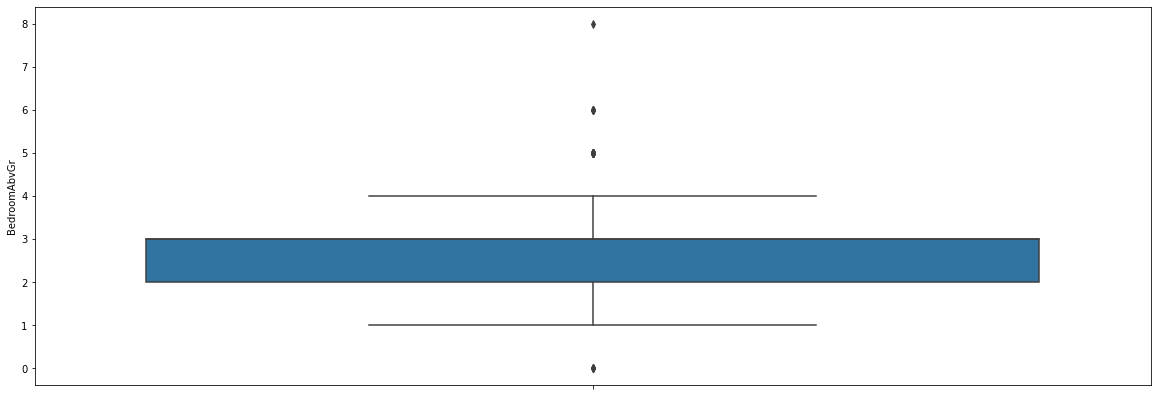

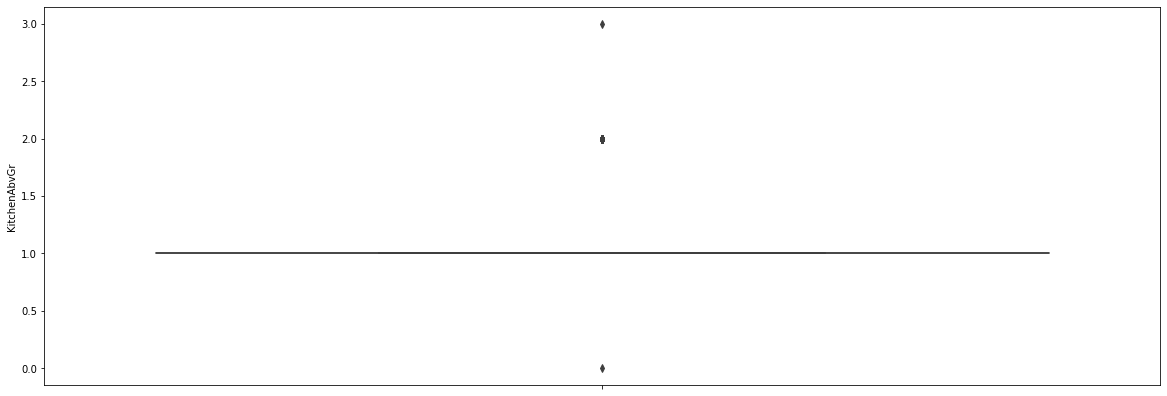

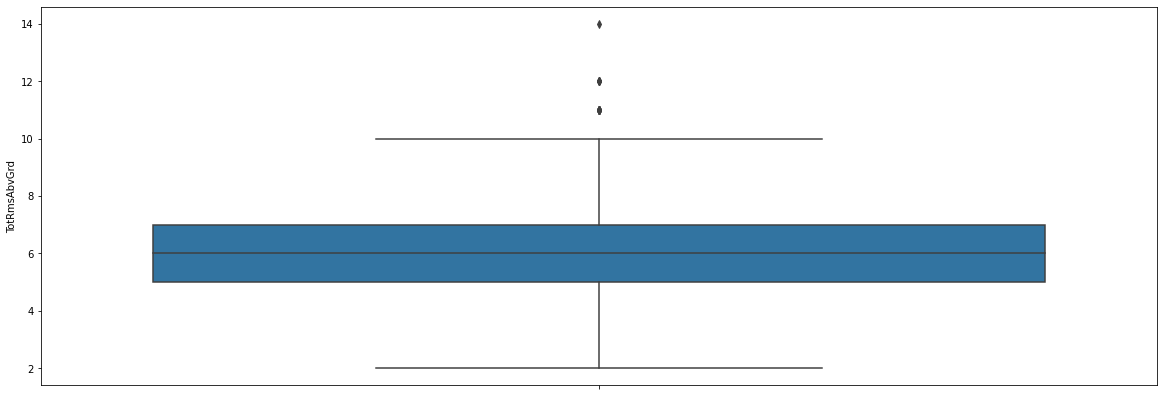

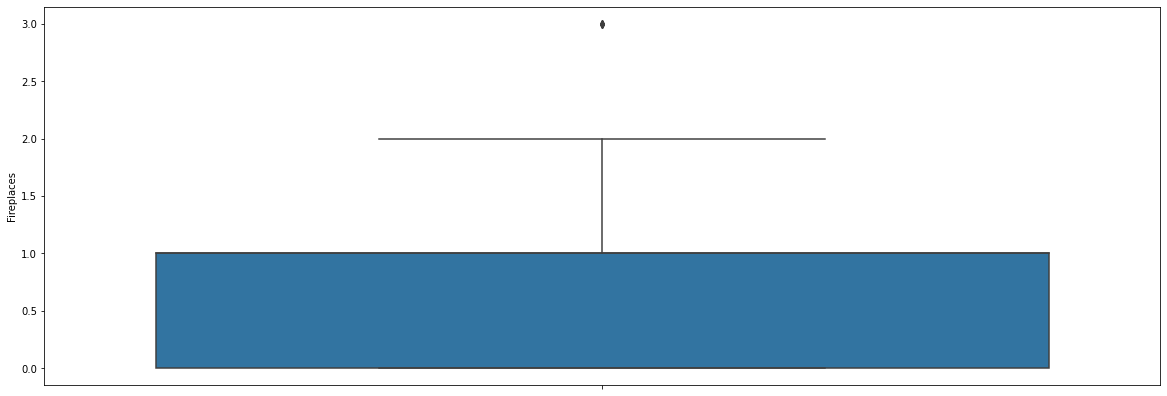

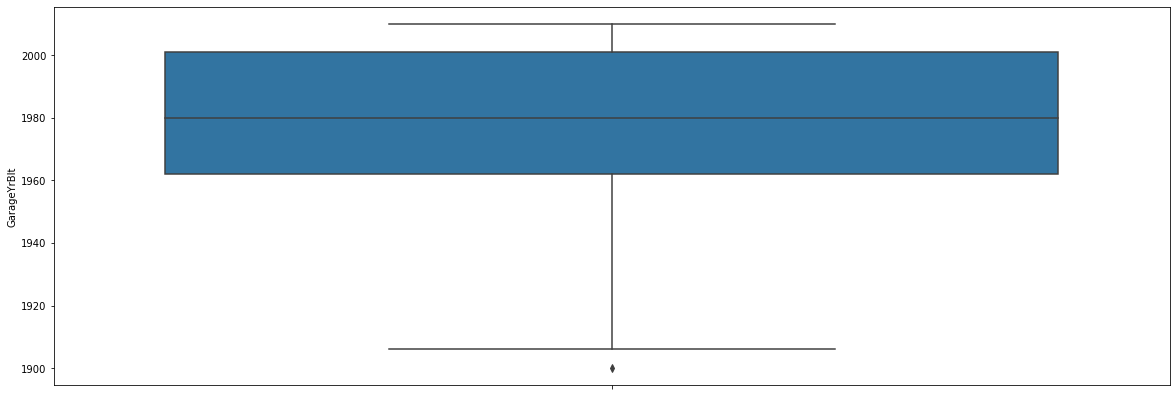

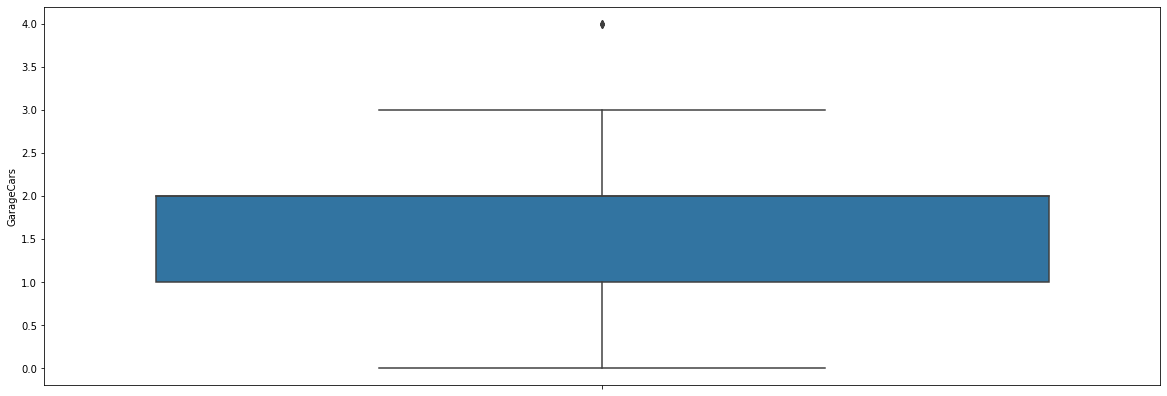

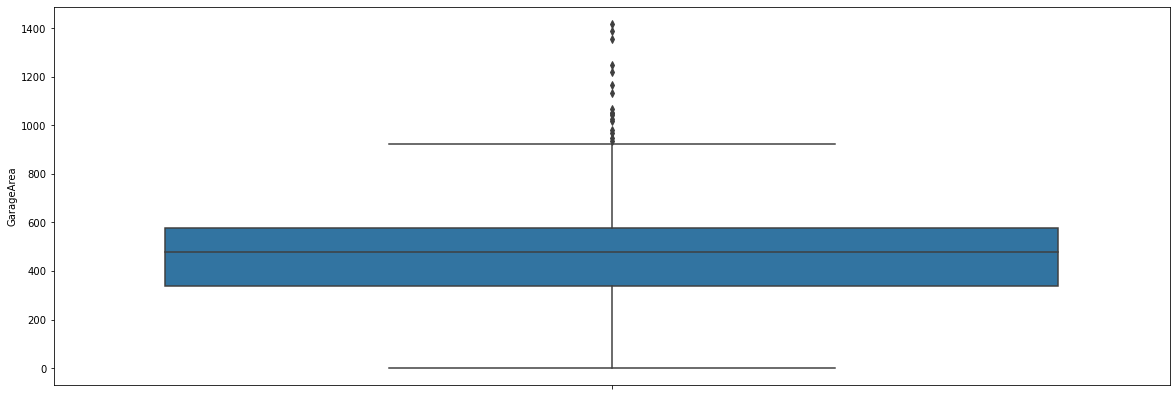

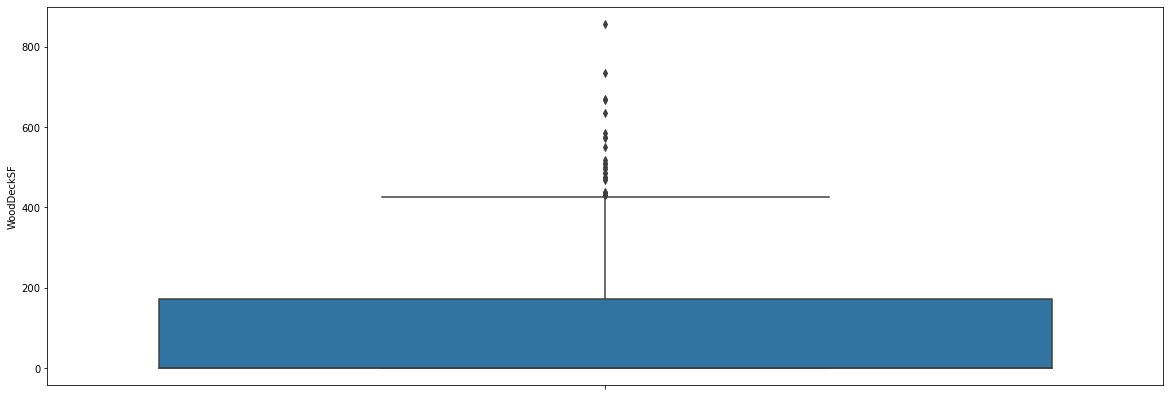

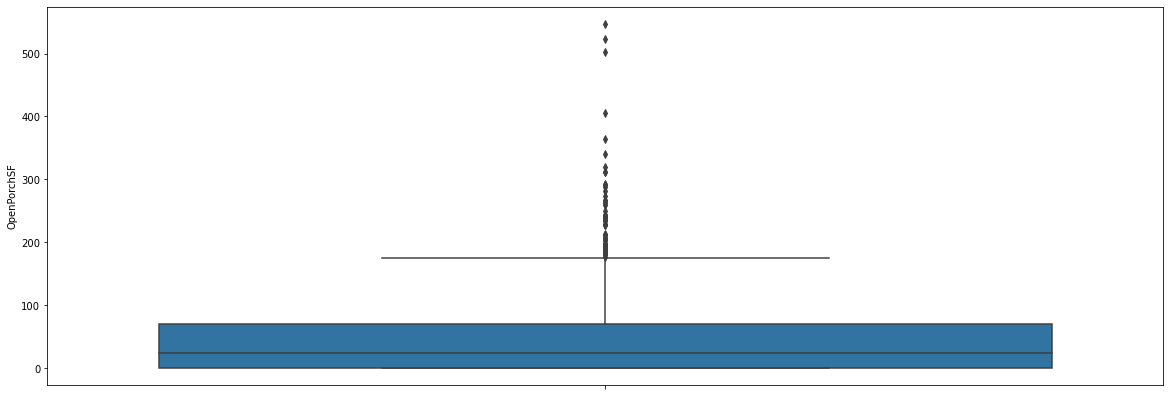

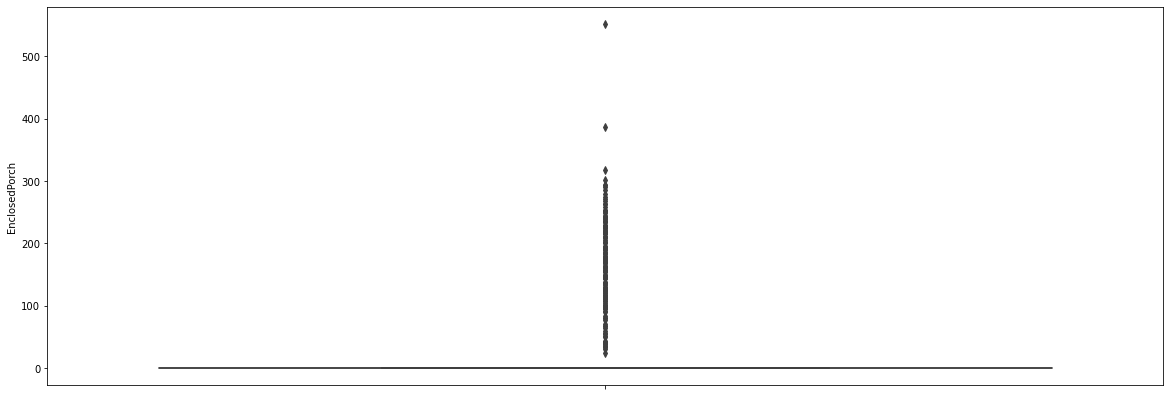

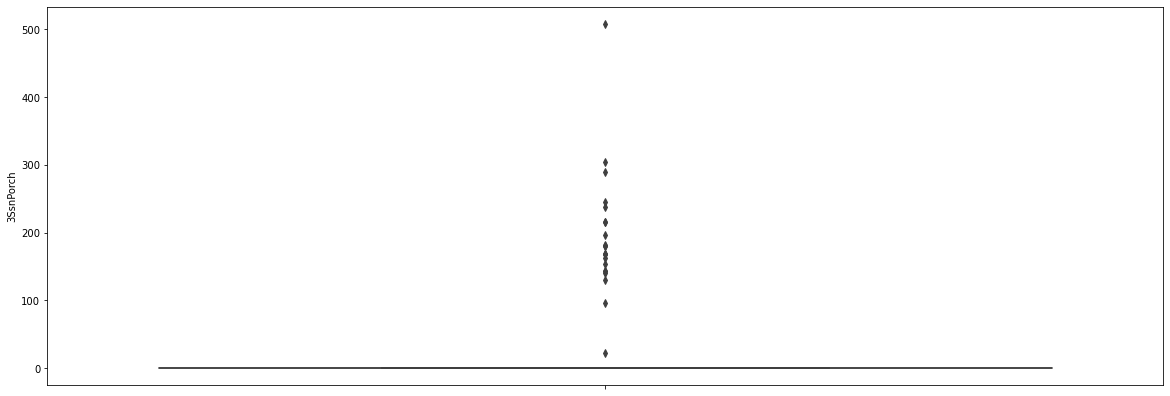

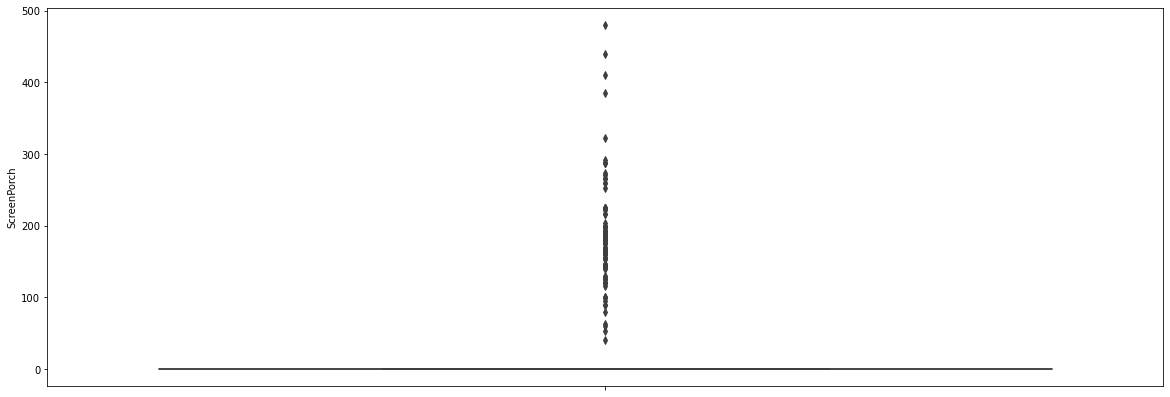

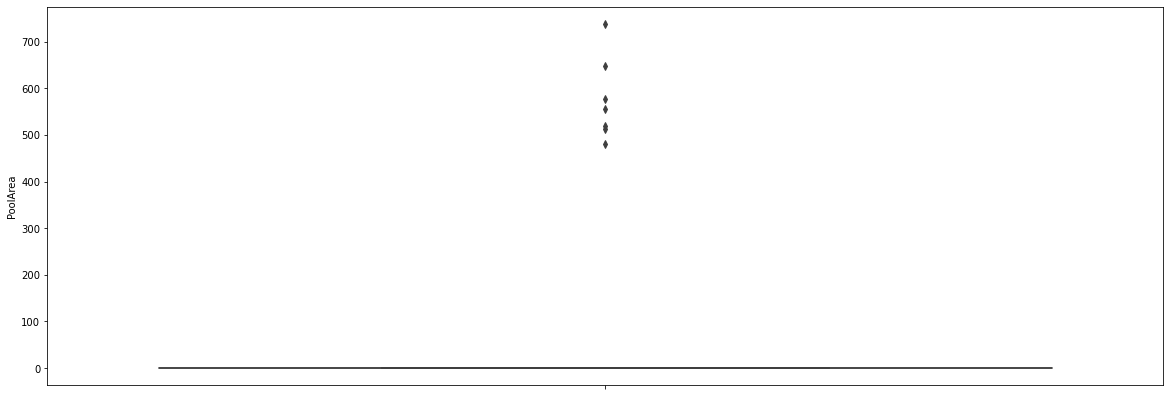

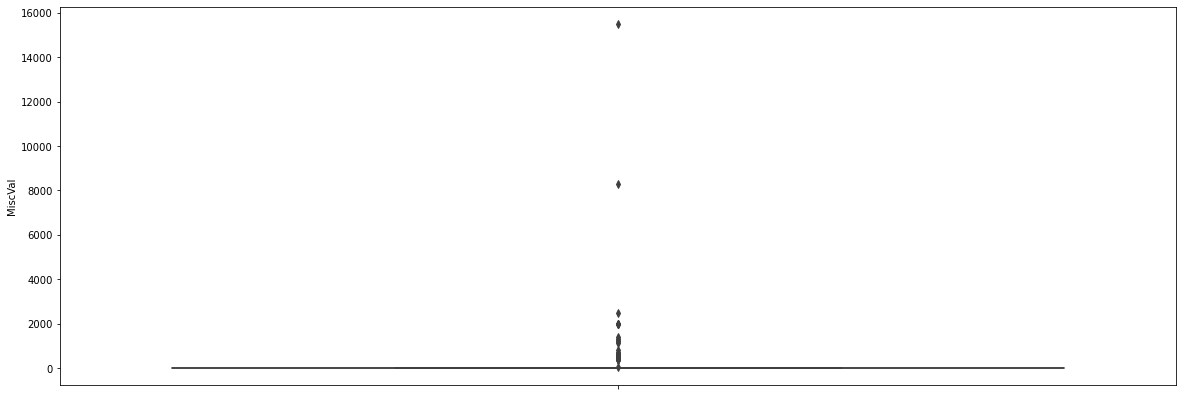

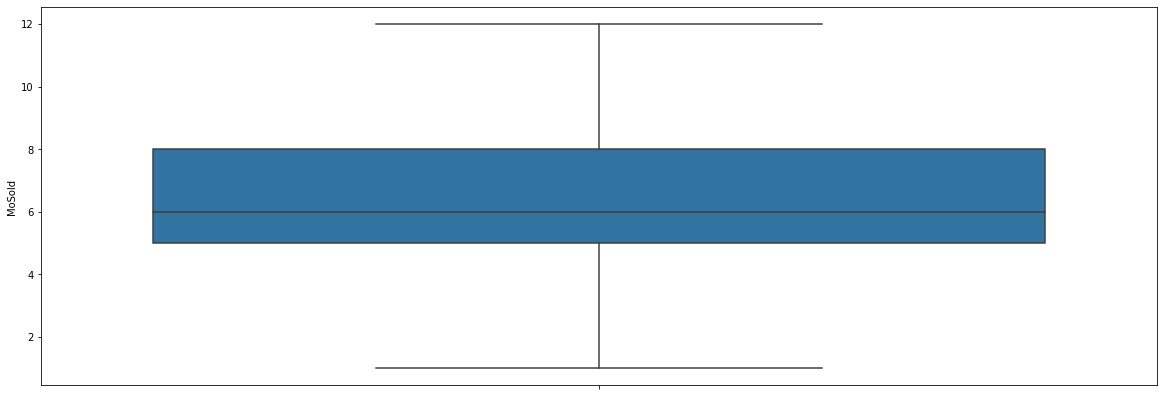

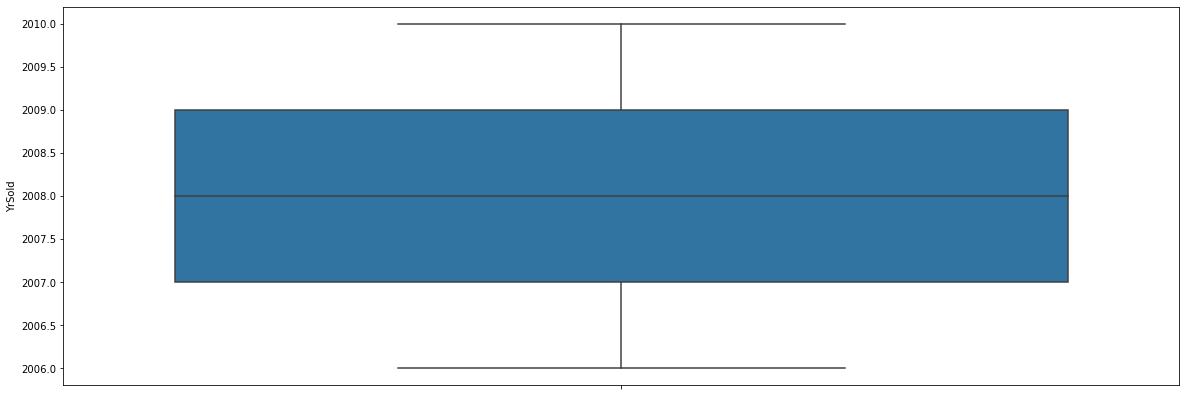

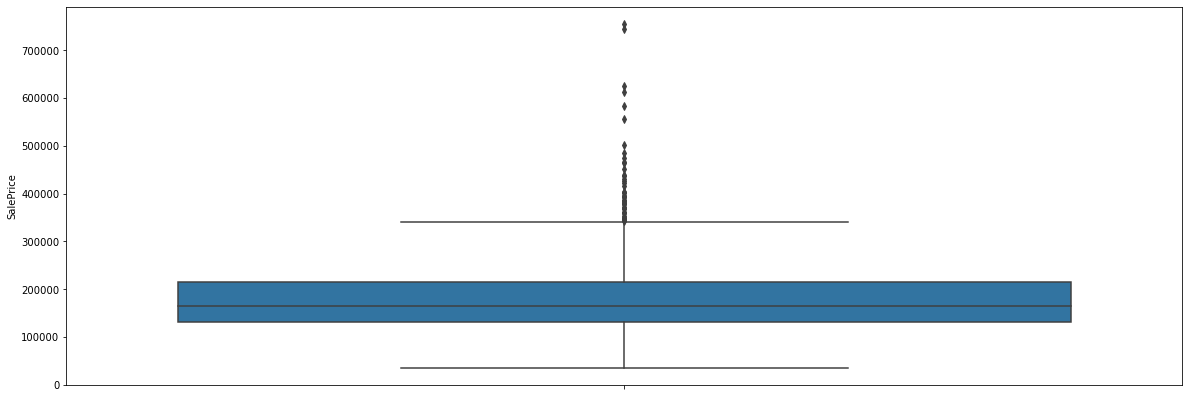

In [15]:

counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continous_columns[i],hue = continous_columns[i],data=df)
        #sns.boxplot(df[columns[i]])
        plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

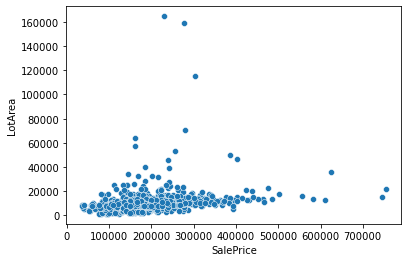

In [16]:
sns.scatterplot(x='SalePrice',y='LotArea',data=df)

columns { 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SalePrice' } in the dataset have outliers present in them.

In [17]:
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


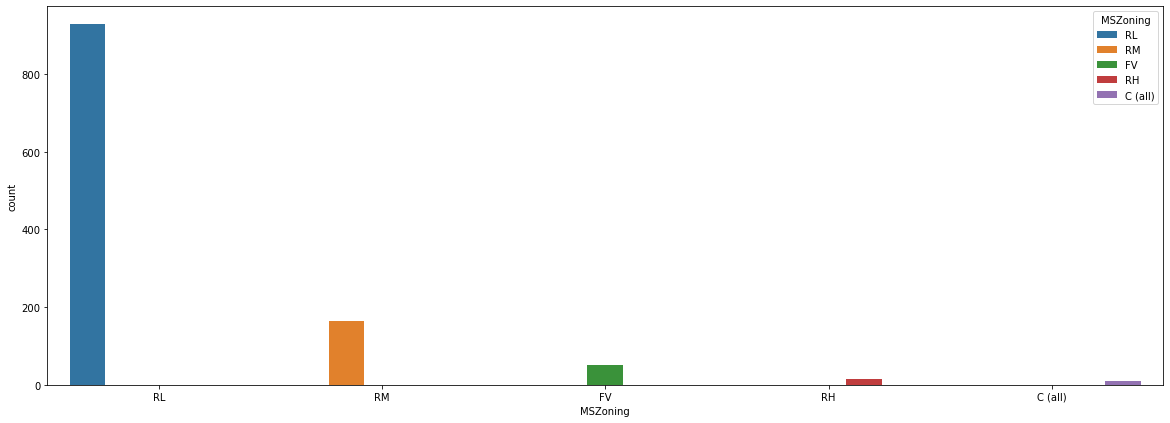

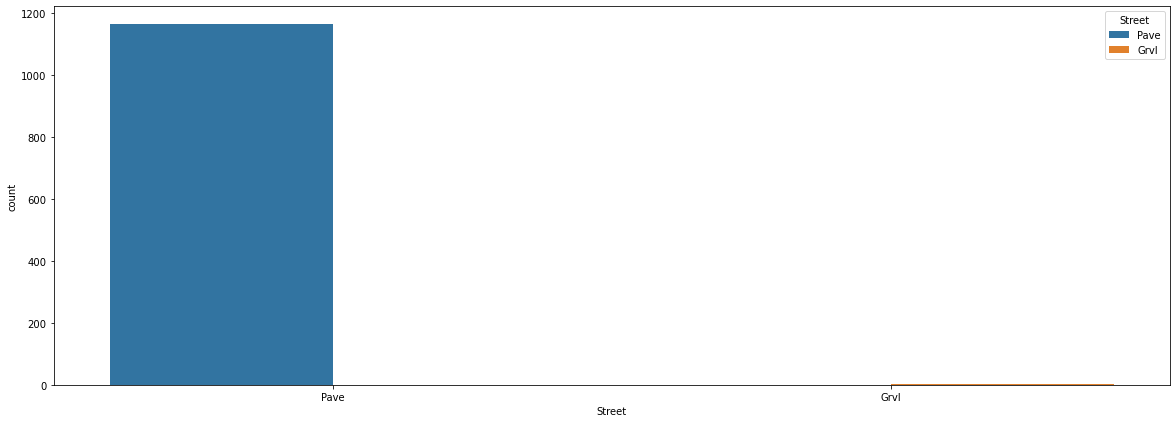

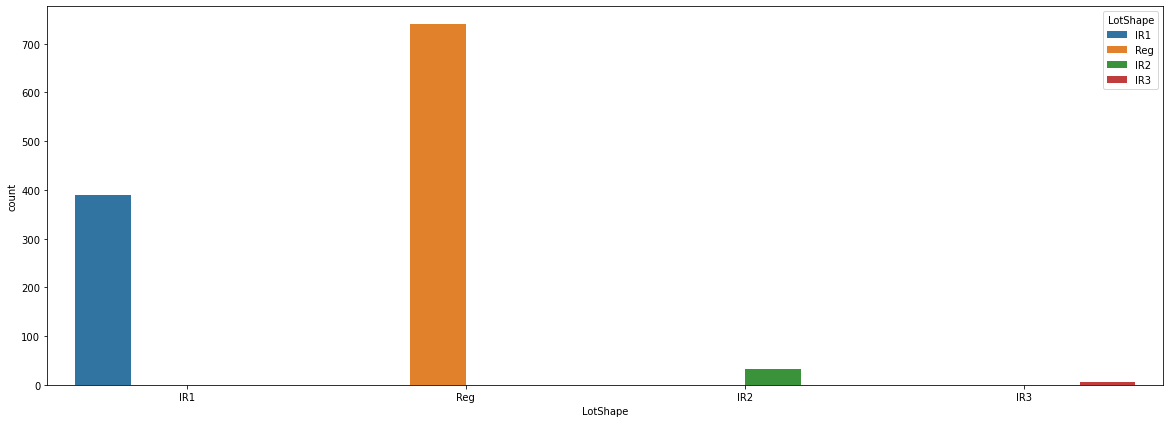

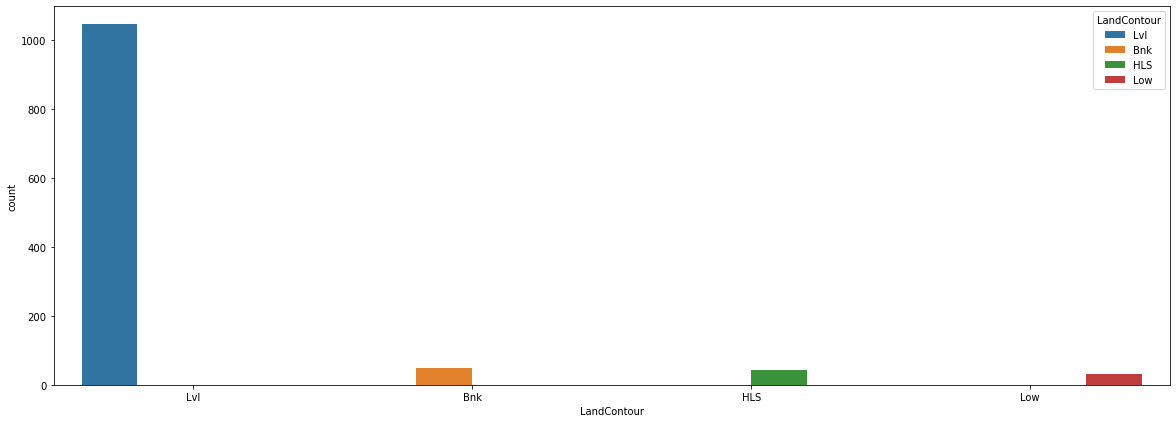

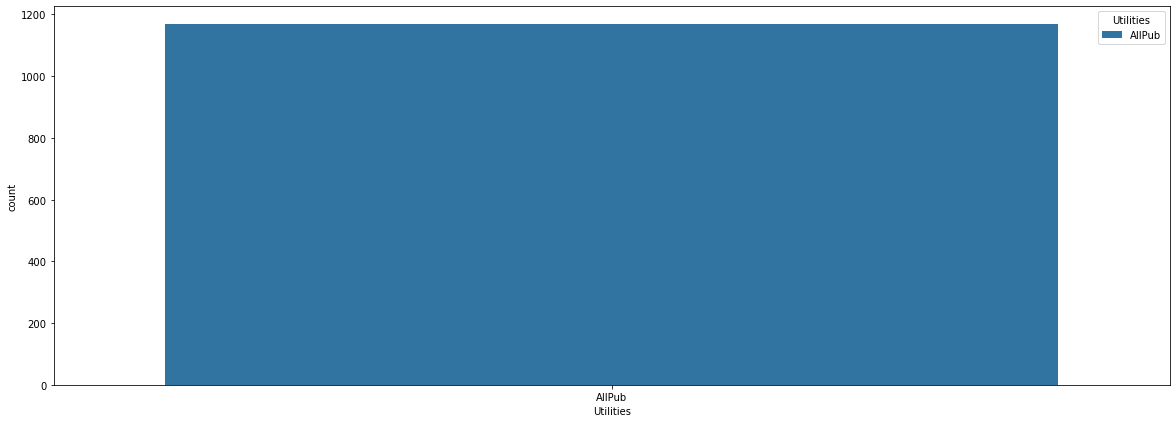

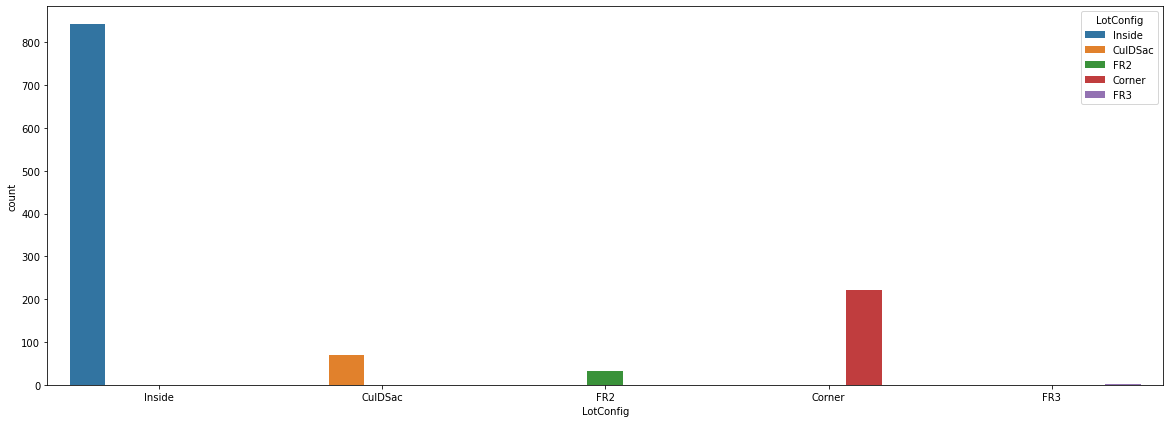

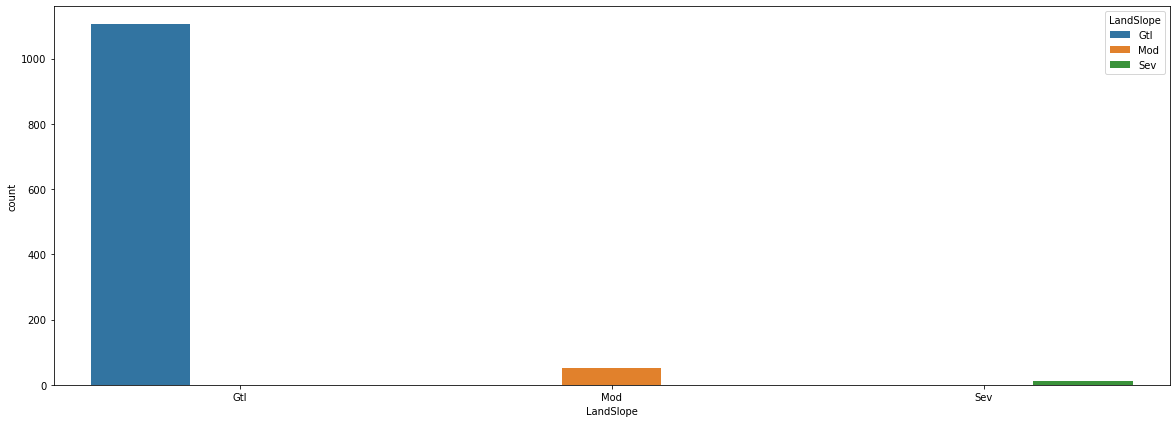

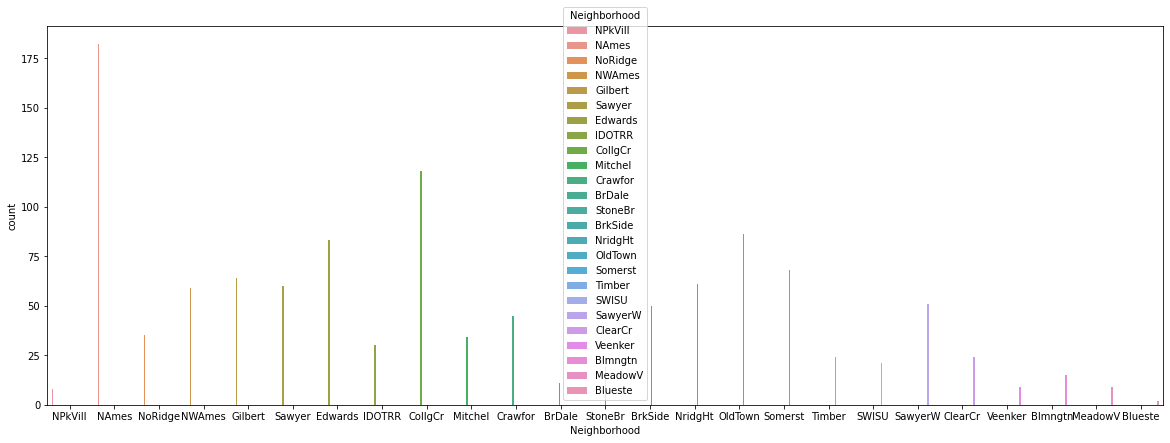

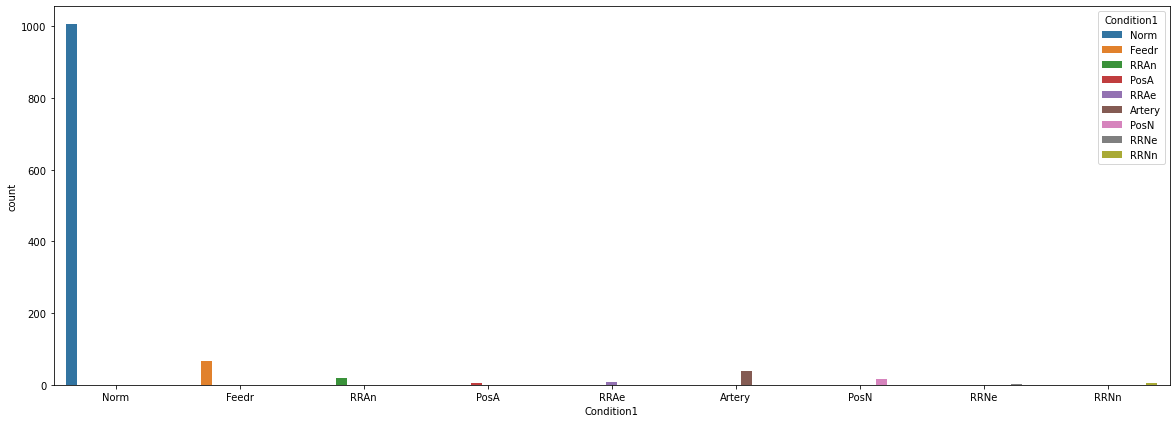

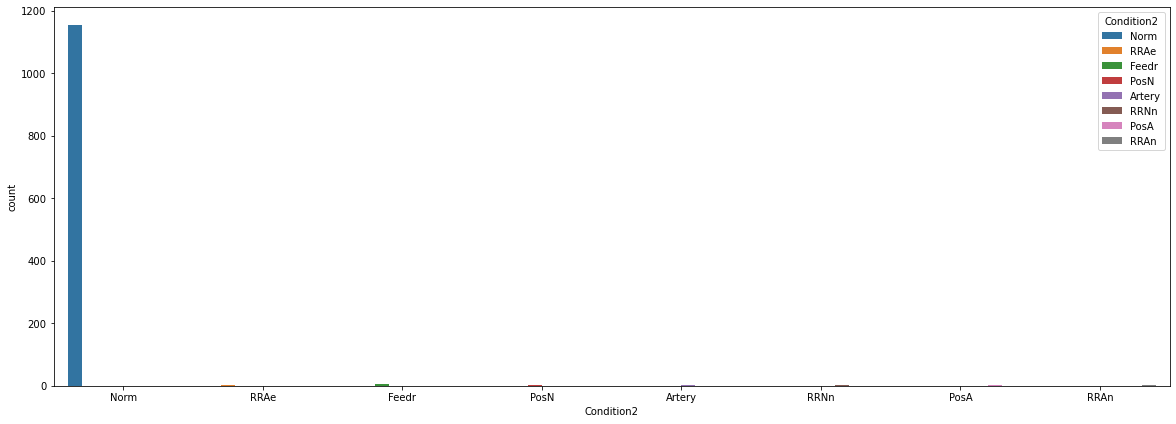

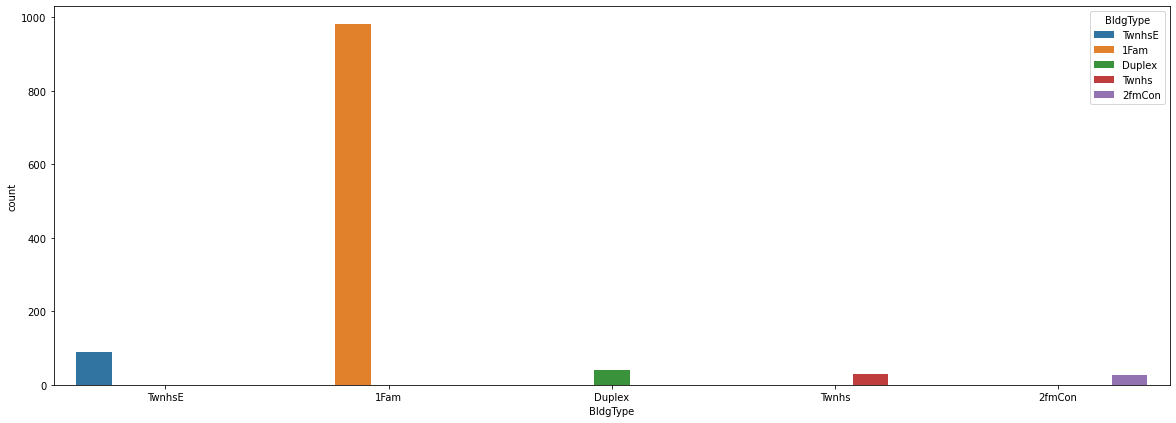

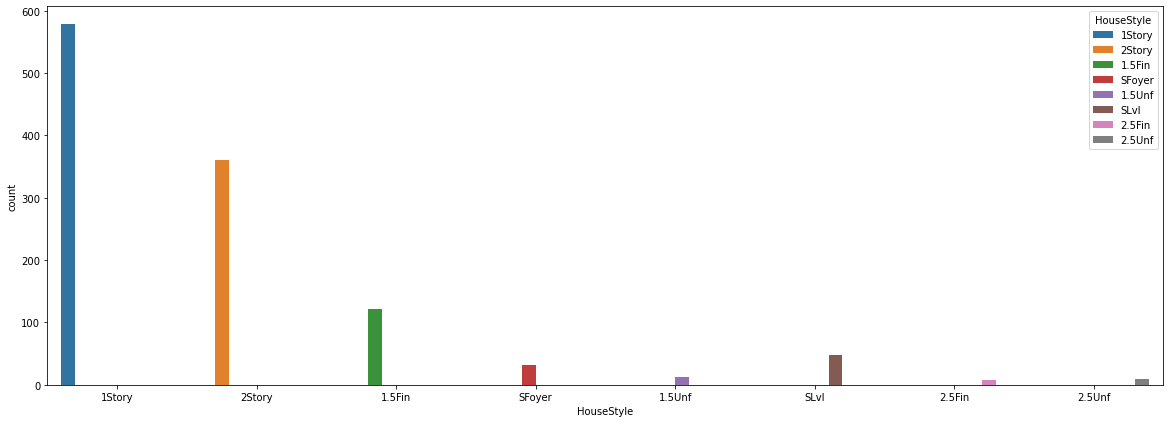

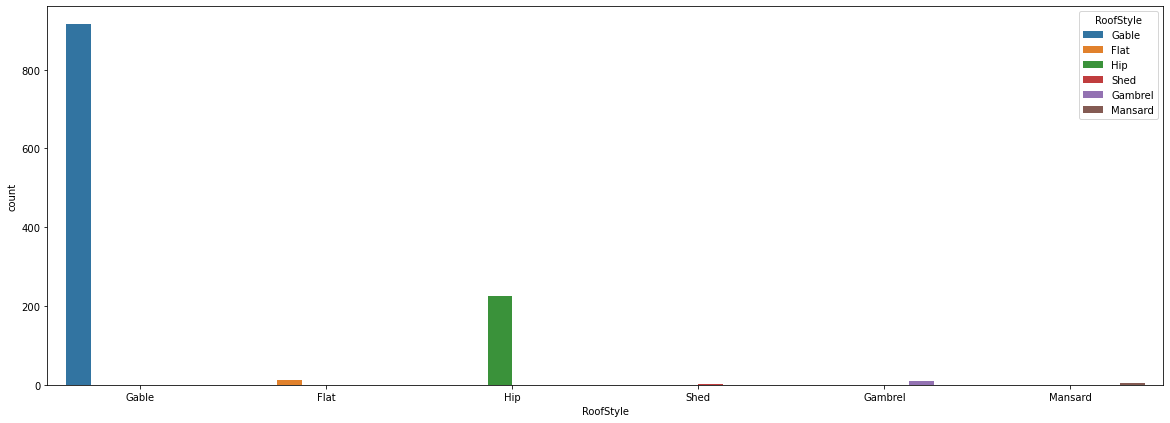

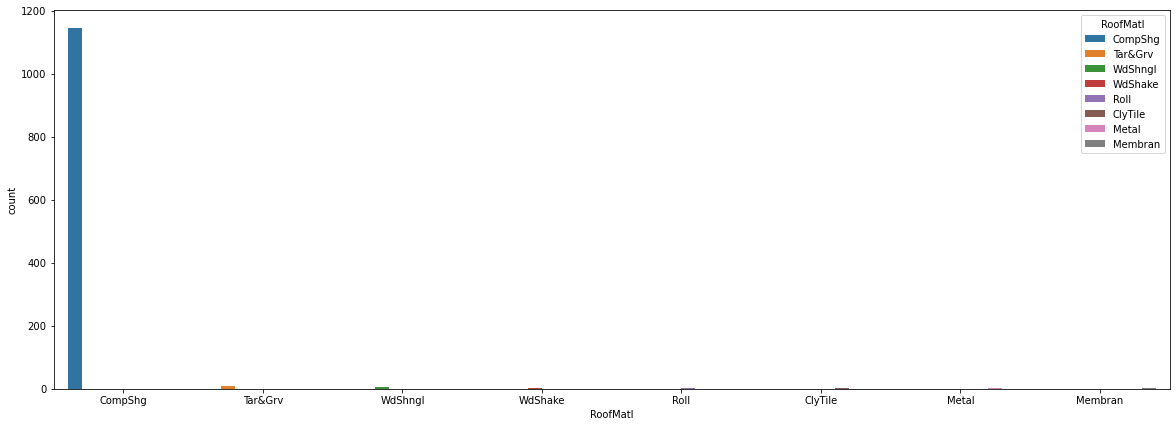

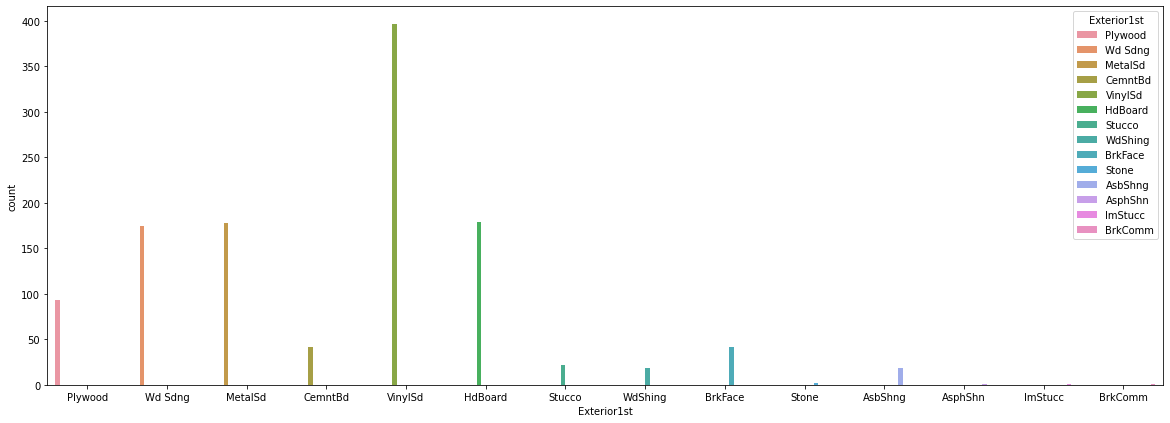

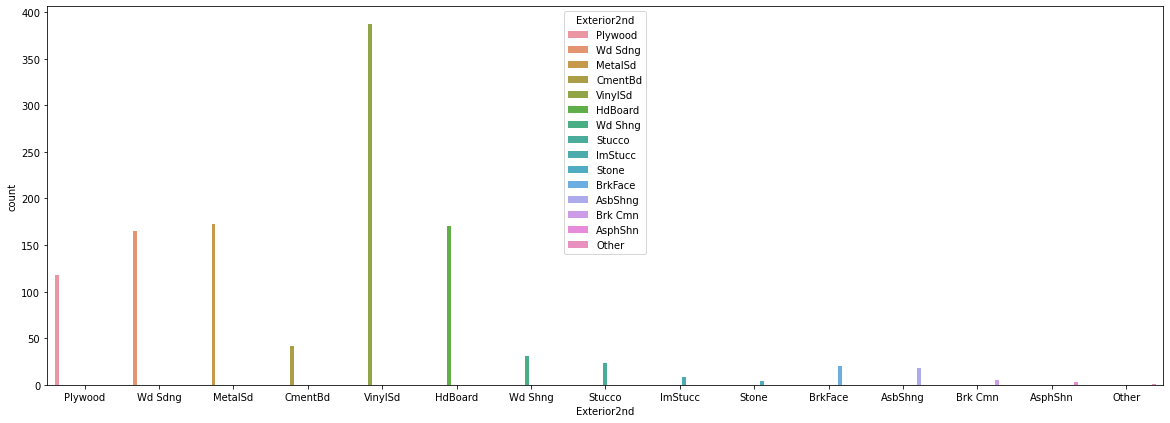

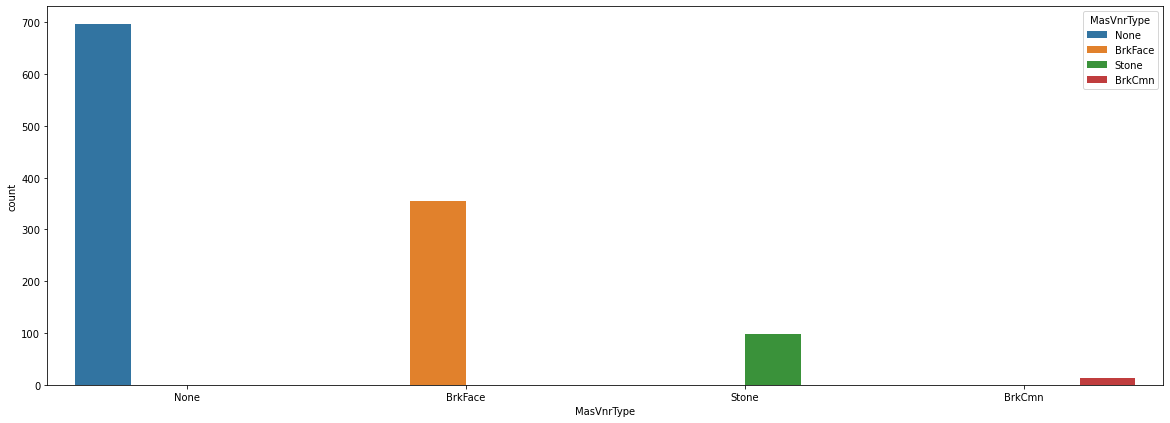

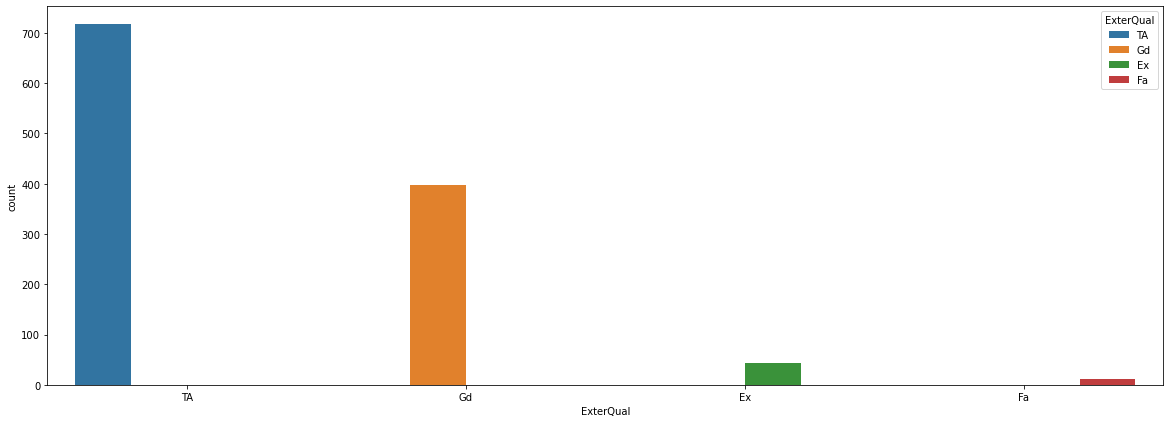

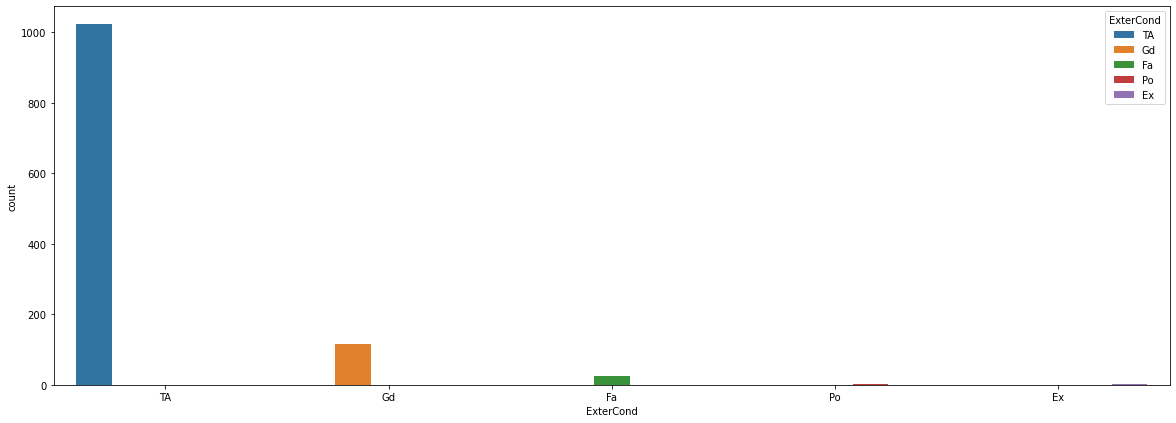

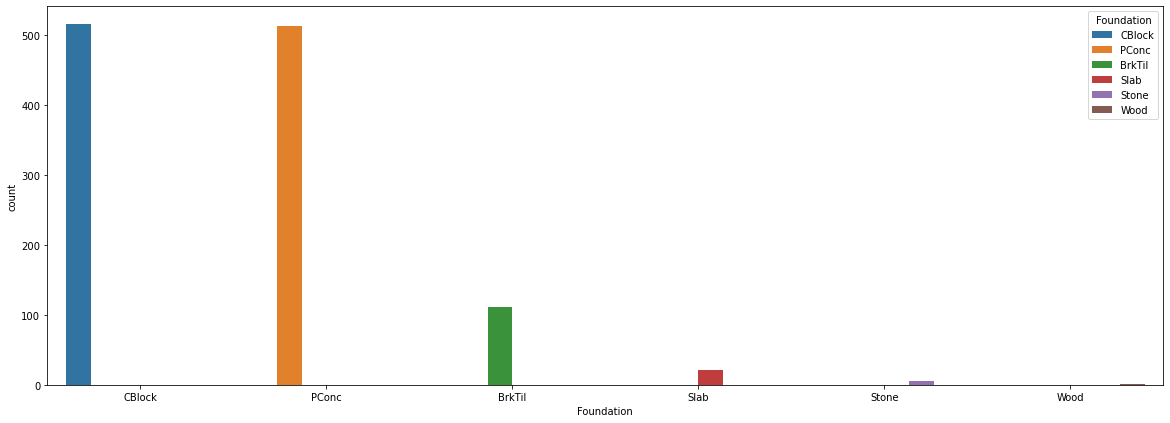

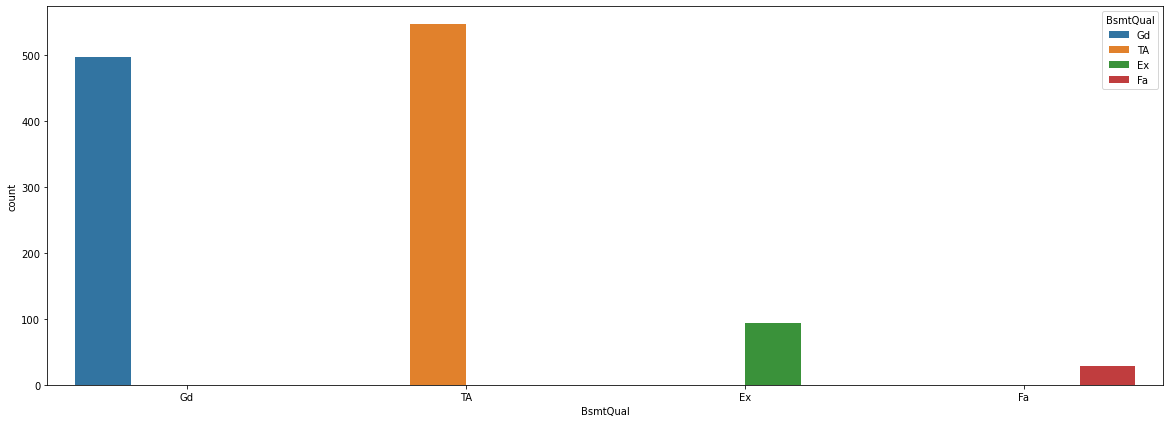

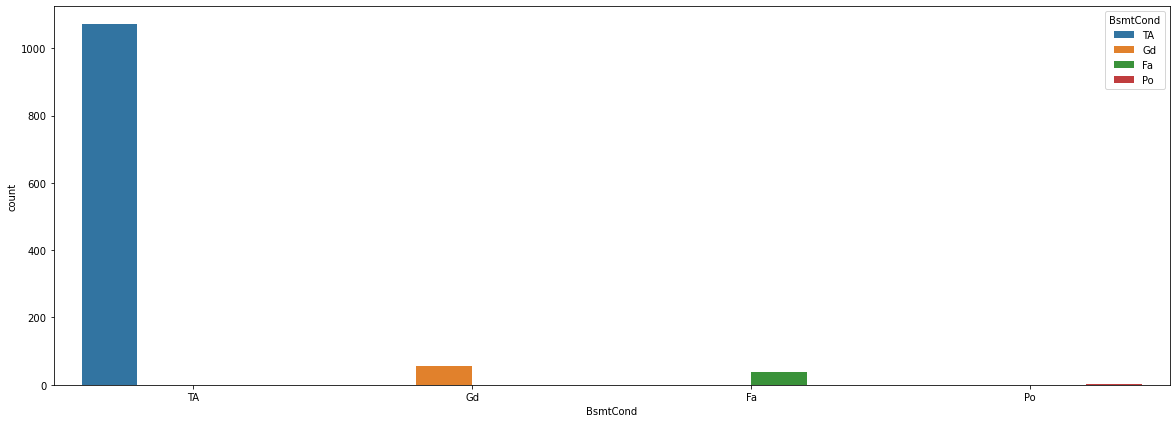

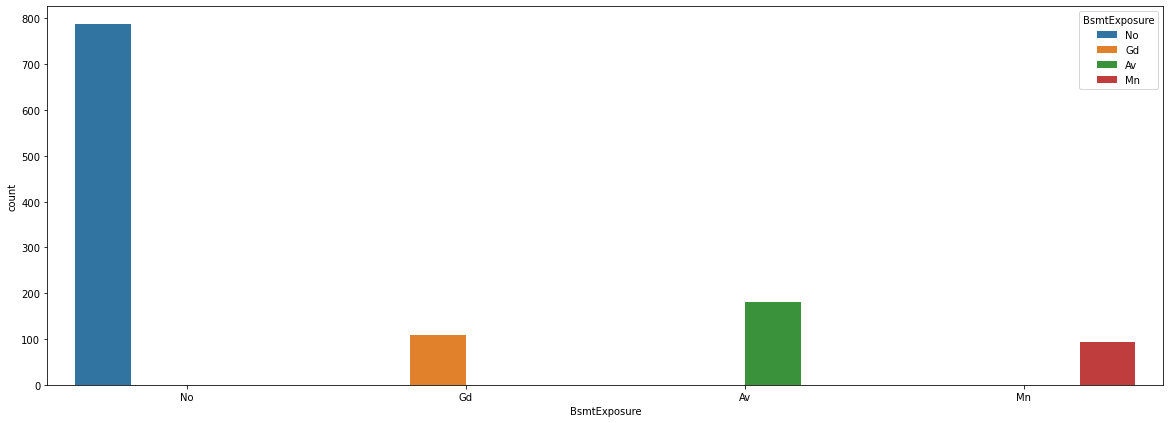

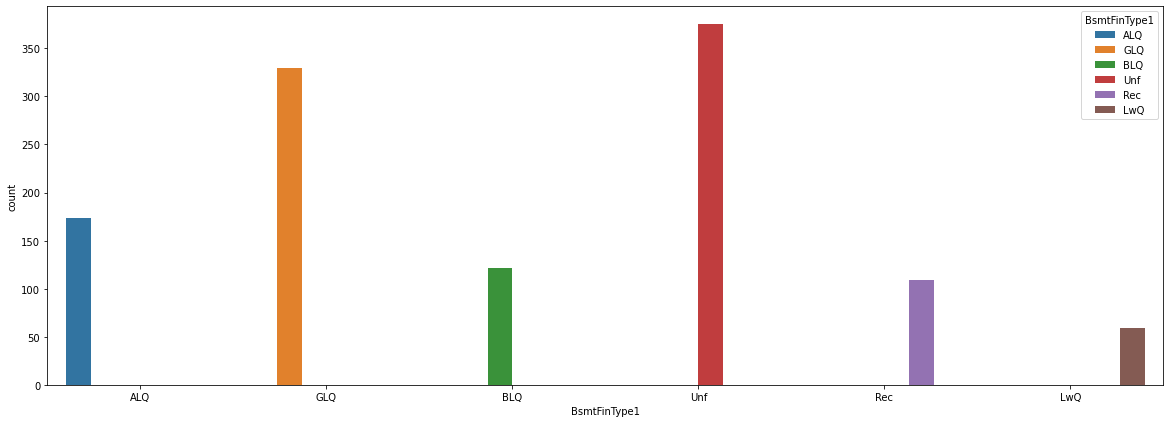

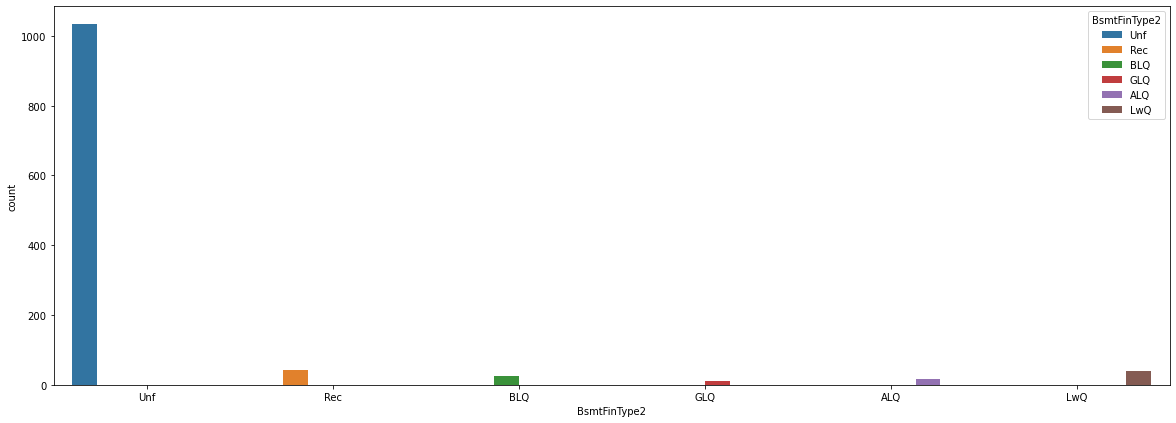

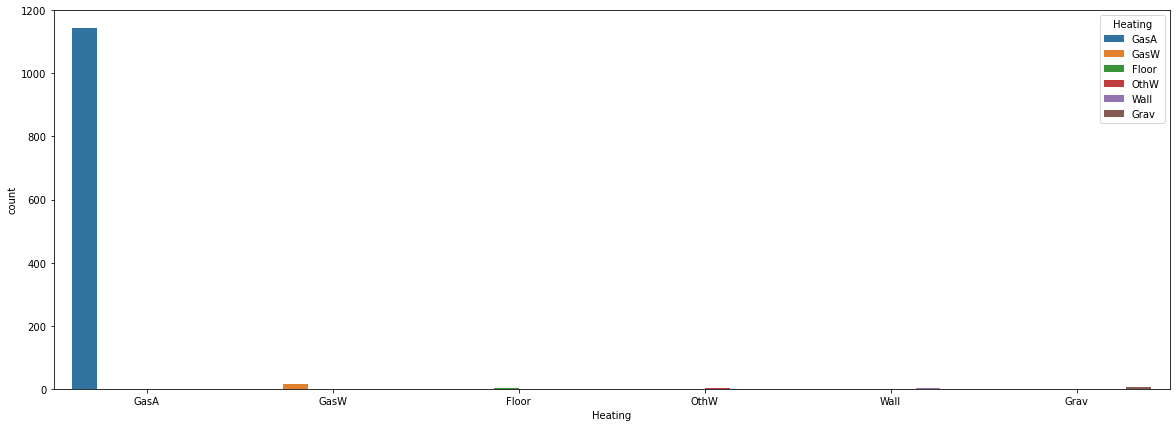

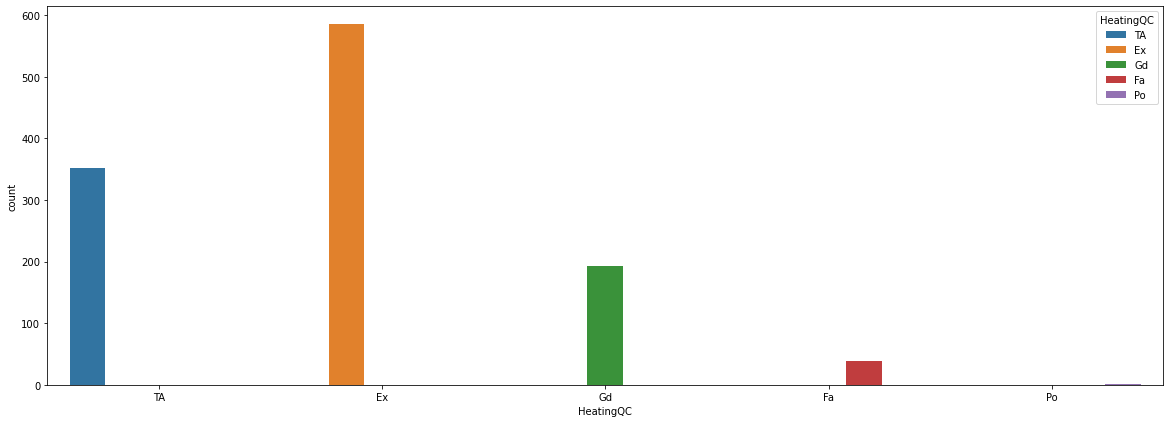

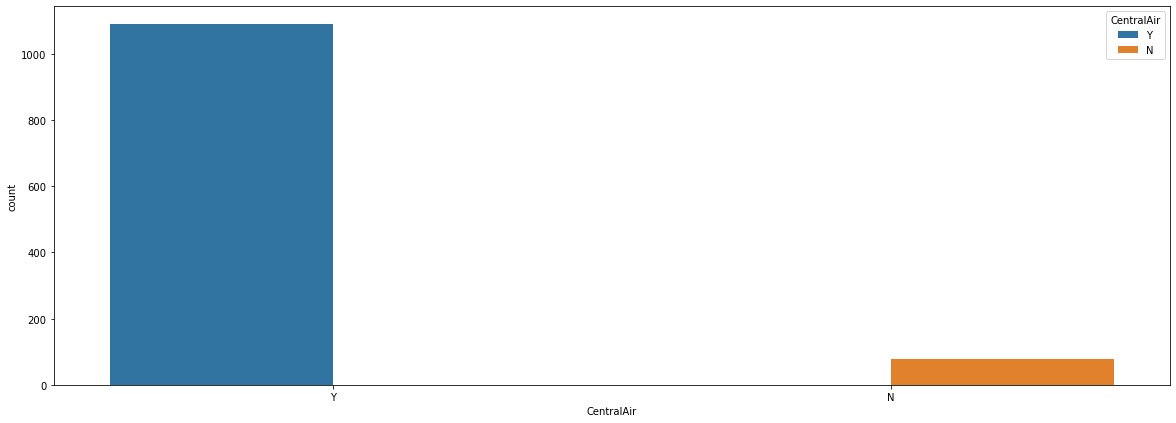

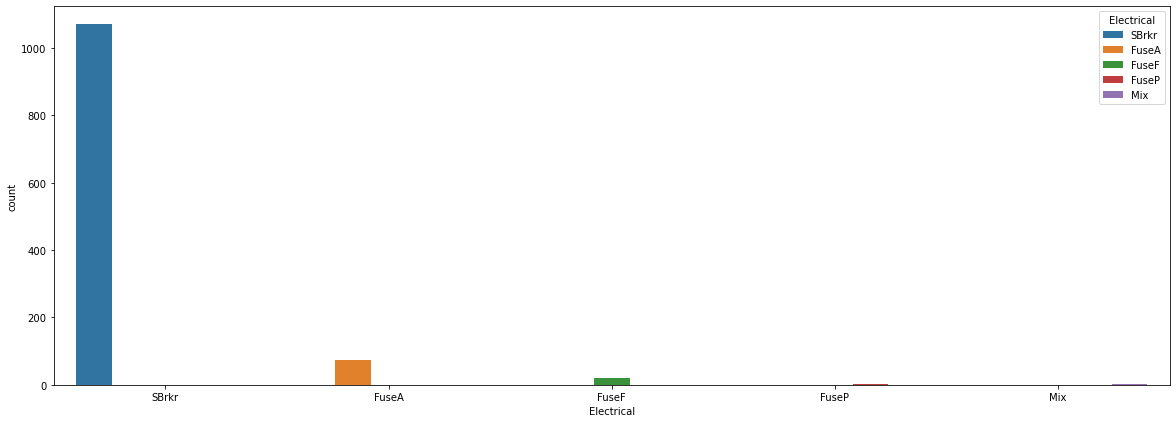

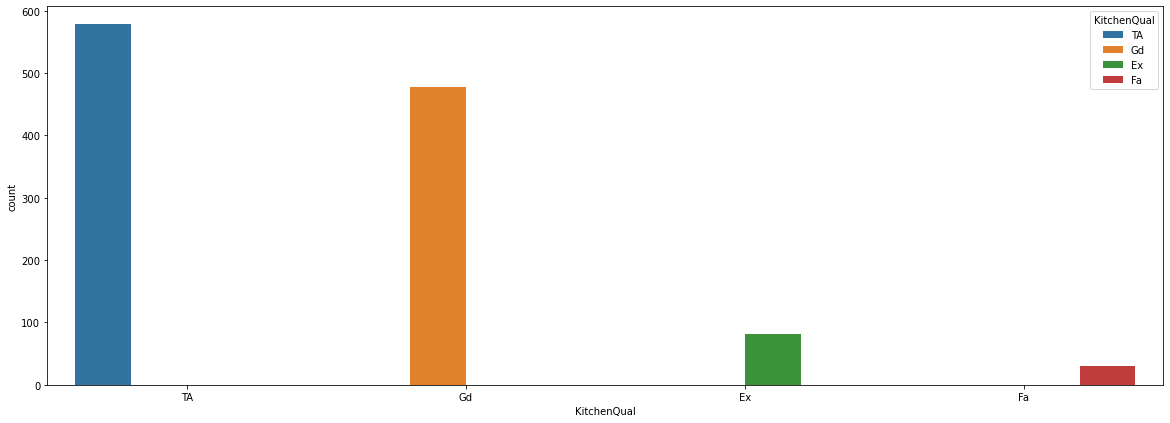

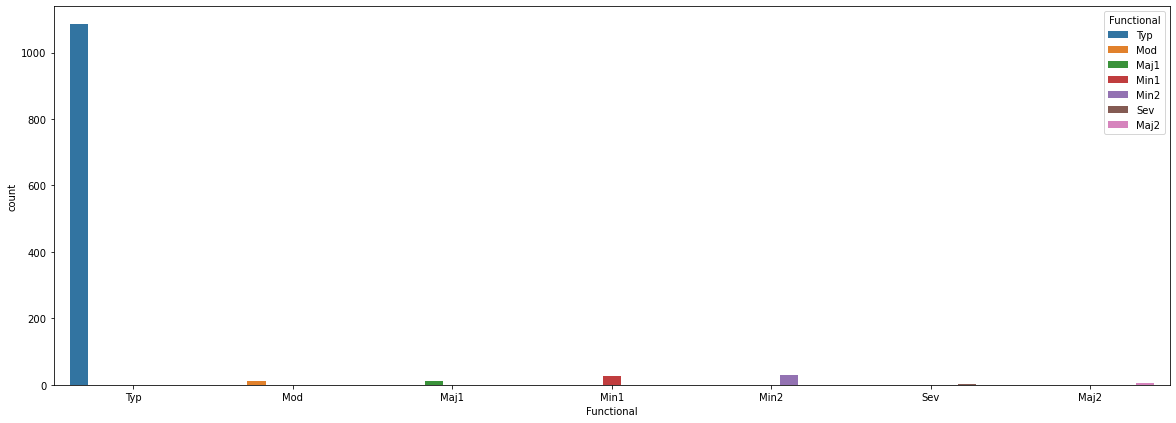

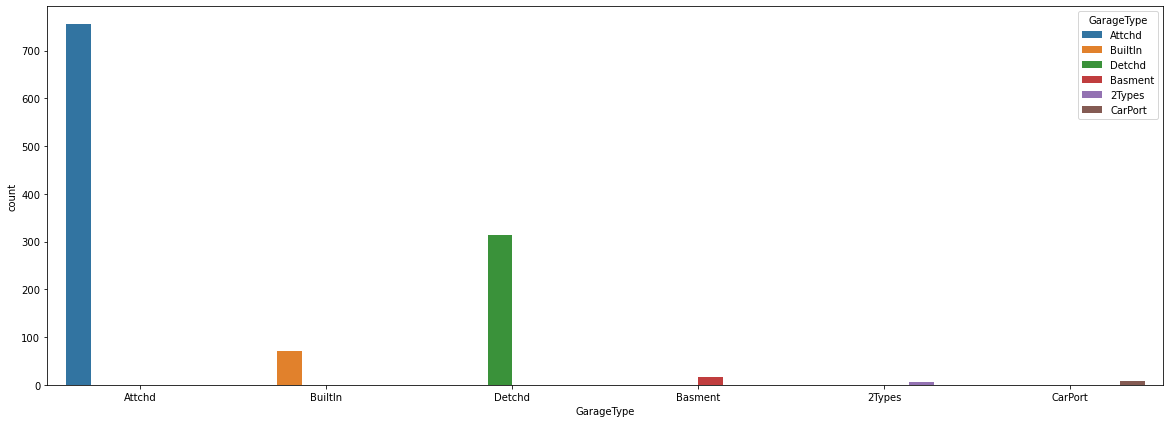

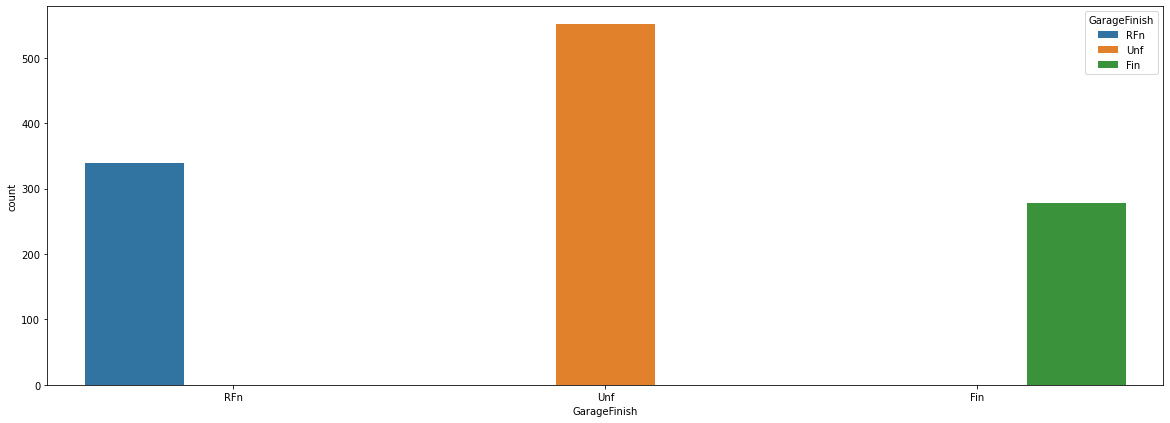

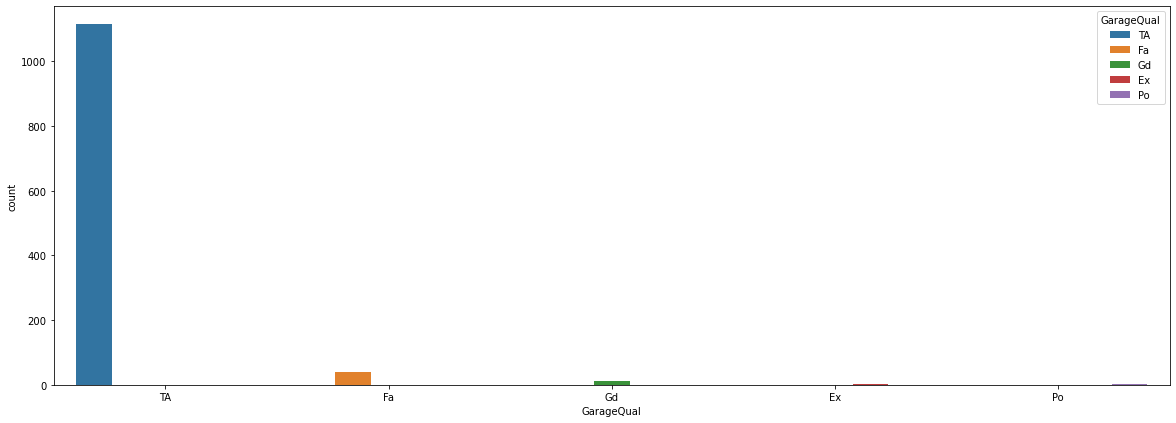

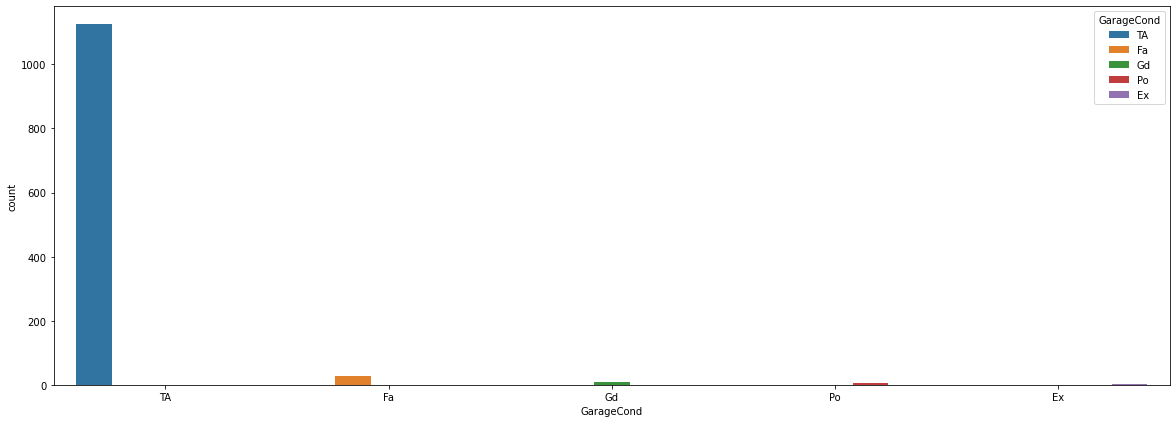

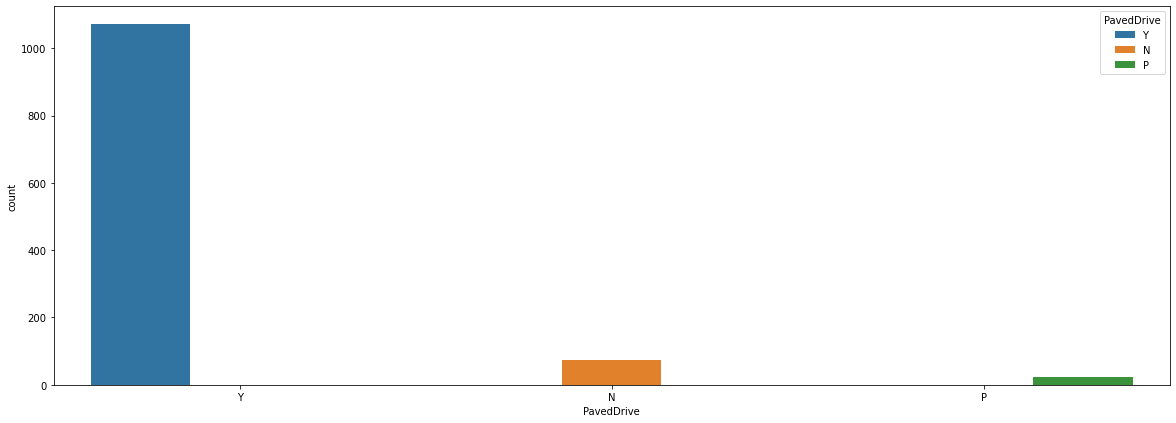

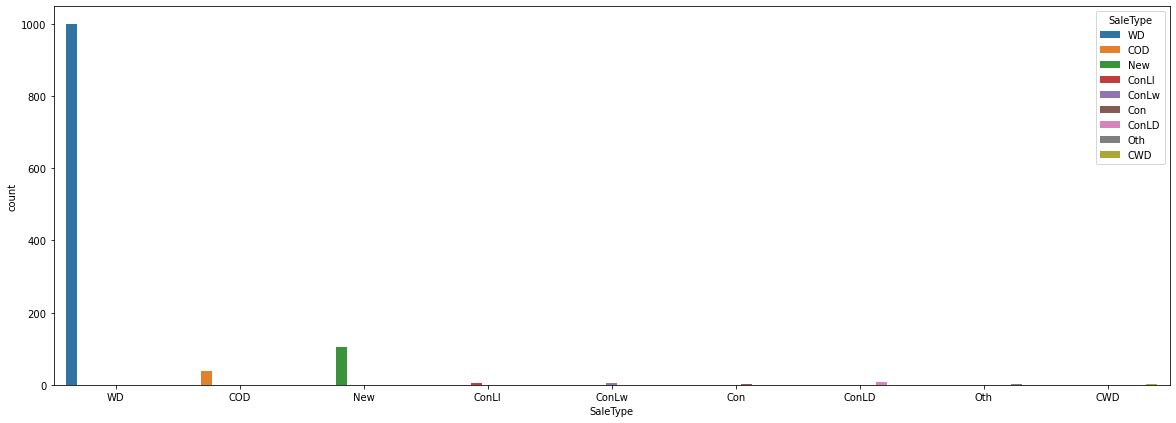

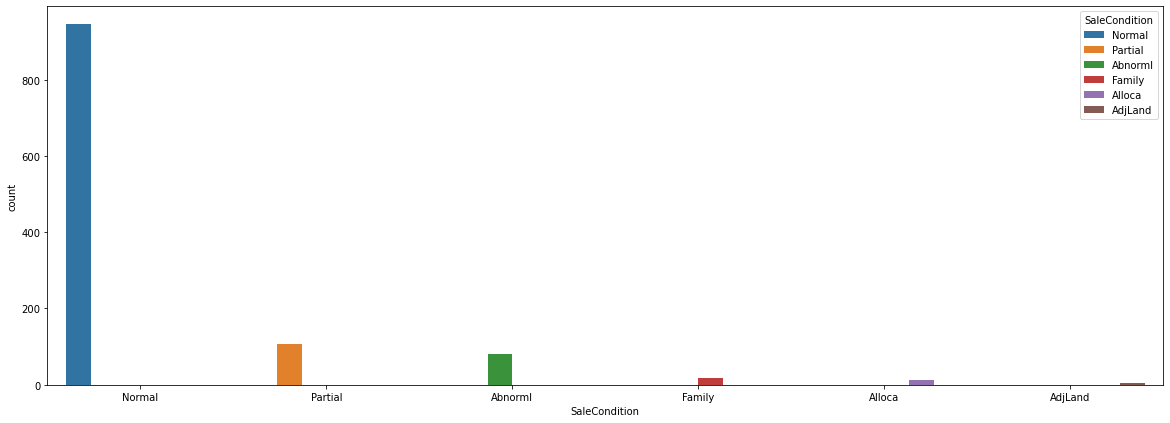

In [18]:
counter=1;


for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.countplot(x=column,hue=column,data=df)
        plt.show()

    MSZoning -> majority are RL 
    Street-> majority streets are Pave style
    LotShape-> majority are Reg shape
    LandContour -> LVL have the highest count in the dataset
    Utilities -> All values are AllPub
    LotConfig -> We have very few FR3 and majority are Inside
    LandSlope -> Landslope is Gentle for majority of houses
    Neighborhood -> their are many differnt neighborhood present 
    Condition1 ->Majority of the houses are norm
    Condition2 -> Majority of the houses are norm
    BldgType -> Maajority of the houses are 1Fam
    HouseStyle -> We have very few 2.5fin houses
    RoofStyle -> We have very few houses with shed
    RoofMatl -> Most of the houses have Compshg
    Exterior1st -> Most of the houses have VinylSd
    Exterior2nd -> Most of the houses have VinylSd
    MasVnrType -> Most of the houses dont have this
    Foundation -> Their are 0 houses with wood foundation
    BsmtQual -> Very few houses have Fa quality
    BsmtCond -> Most of the houses have TA 
    BsmtExposure -> Most of the houses dont have exposure
    BsmtFinType1 -> Very few houses have LwQ
    BsmtFinType2 -> Most of the houses have Unf
    Heating -> Almost all the houses have GasA type
    HeatingQC -> Most of the houses have Ex 
    CentralAir -> Very houses doesnot have central air facility
    Electrical -> Their are no houses with FuseP and Mix
    KitchenQual -> Most of the houses have TA quality
    GarageType -> Very few houses have Basement, 2types and CarPort
    GarageFinish -> Majority of the houses have GarageFinish
    PavedDrive -> Most of the houses have Paved drive
    SaleType -> Almost all the houses have WD salestype
    SaleCondition -> Most of the houses have normal sales condition


In [19]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [20]:
df['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [21]:
df['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
PosA         1
RRAe         1
RRAn         1
RRNn         1
Name: Condition2, dtype: int64

In [22]:
df['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64

In [23]:
df['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

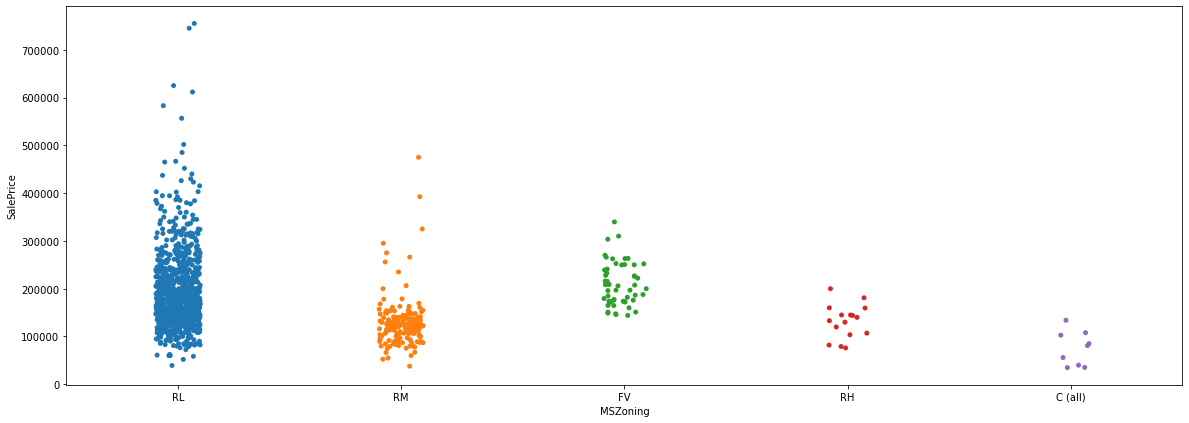

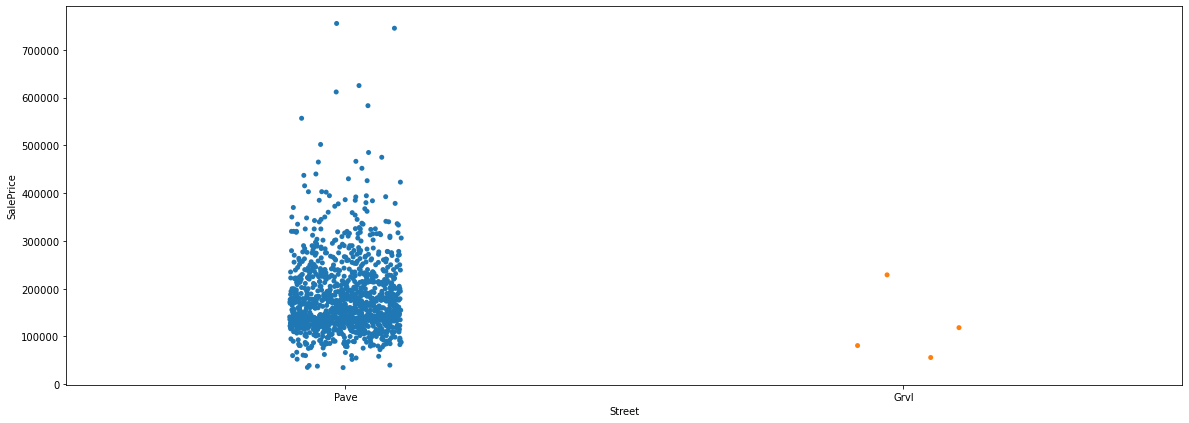

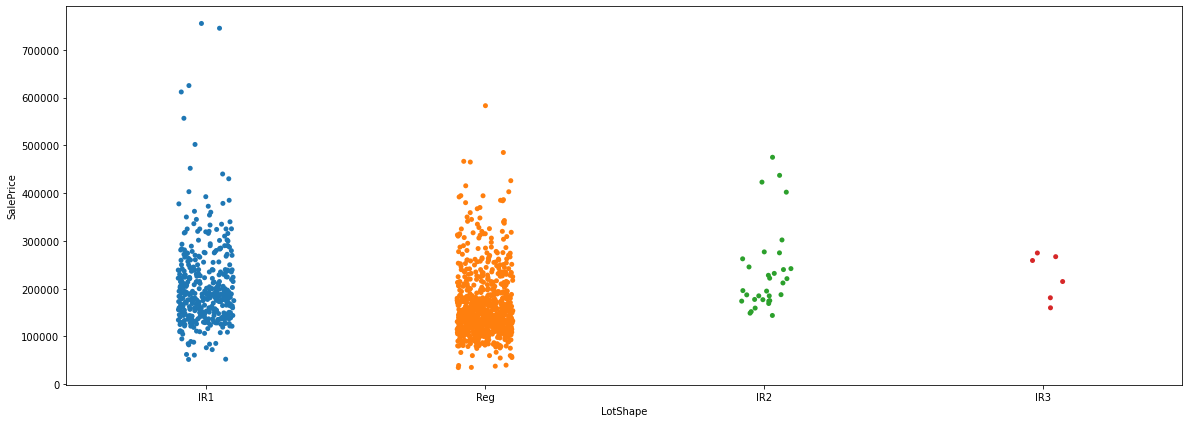

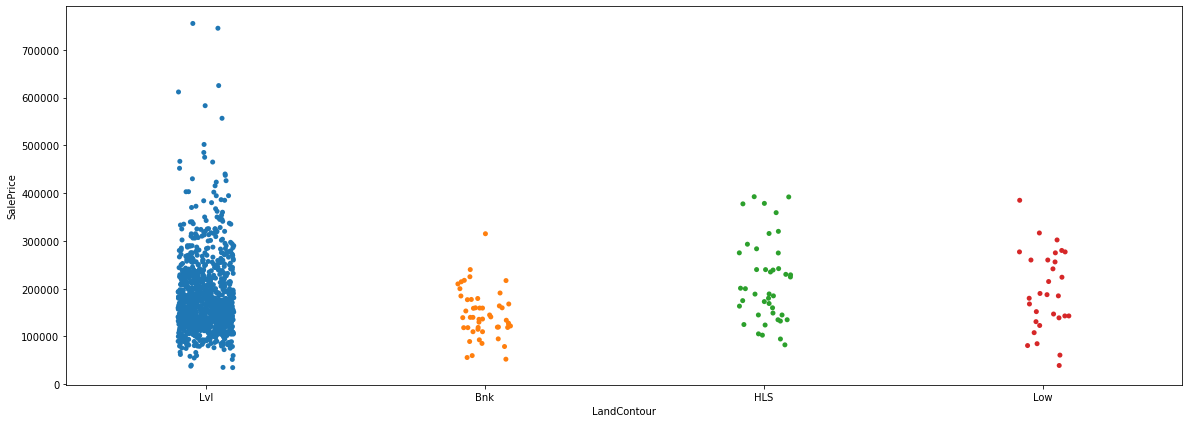

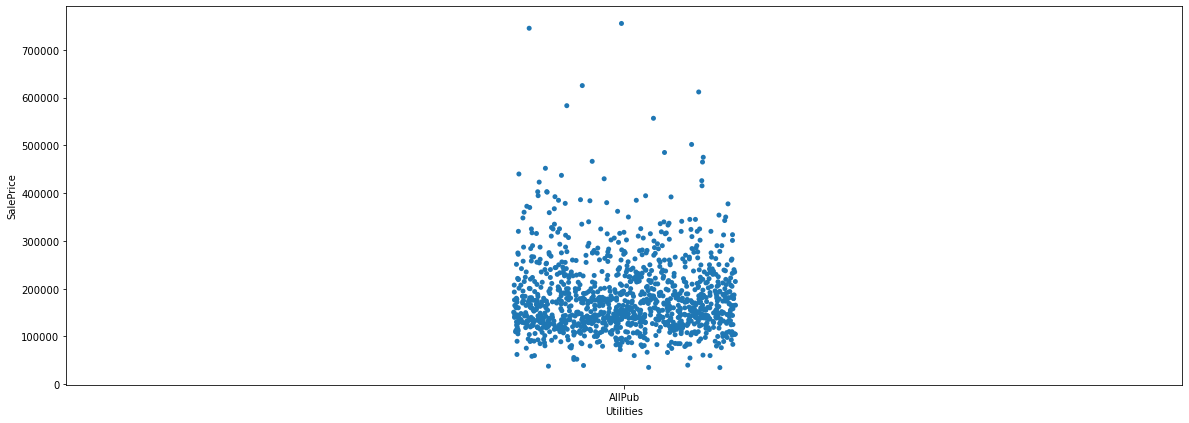

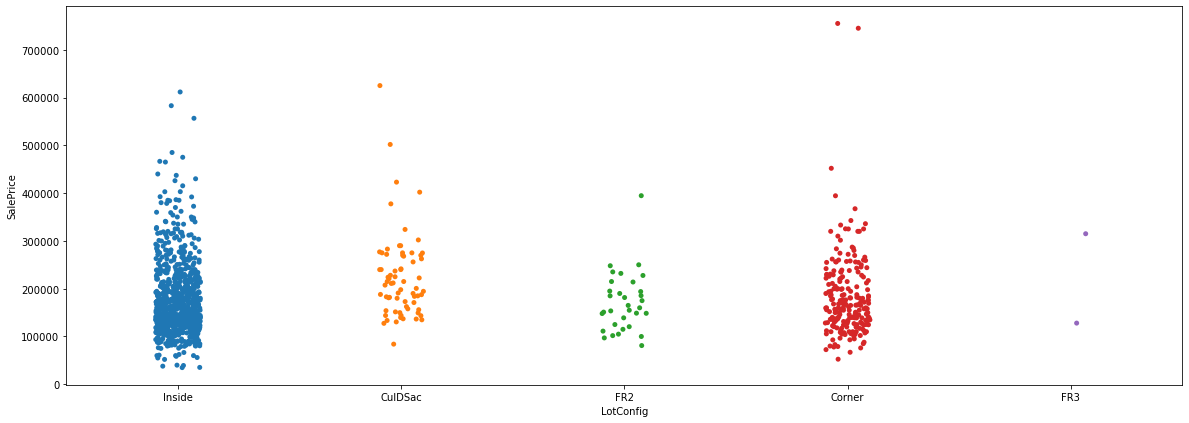

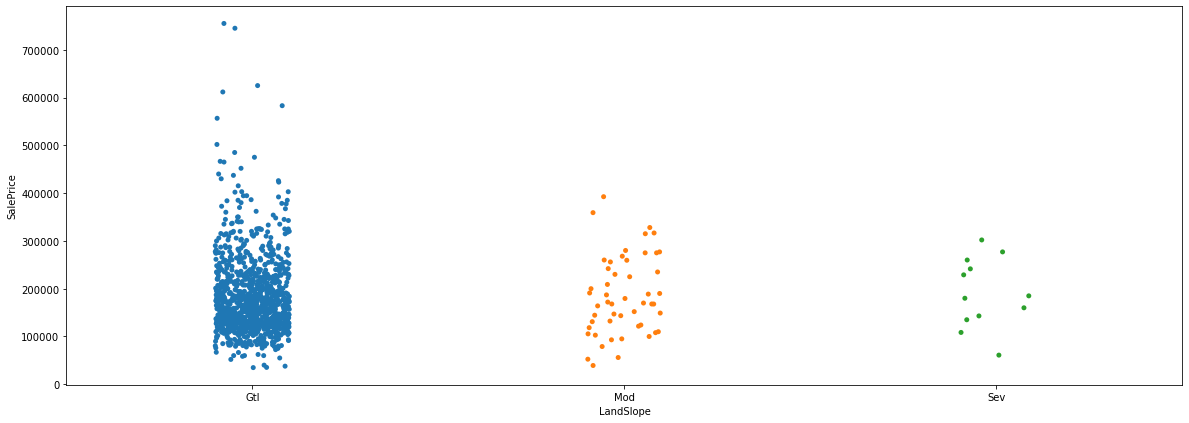

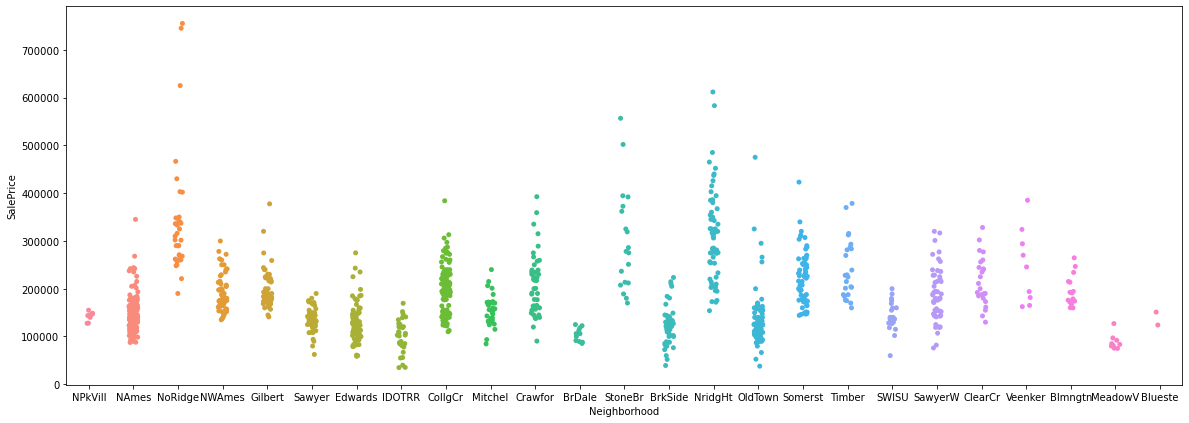

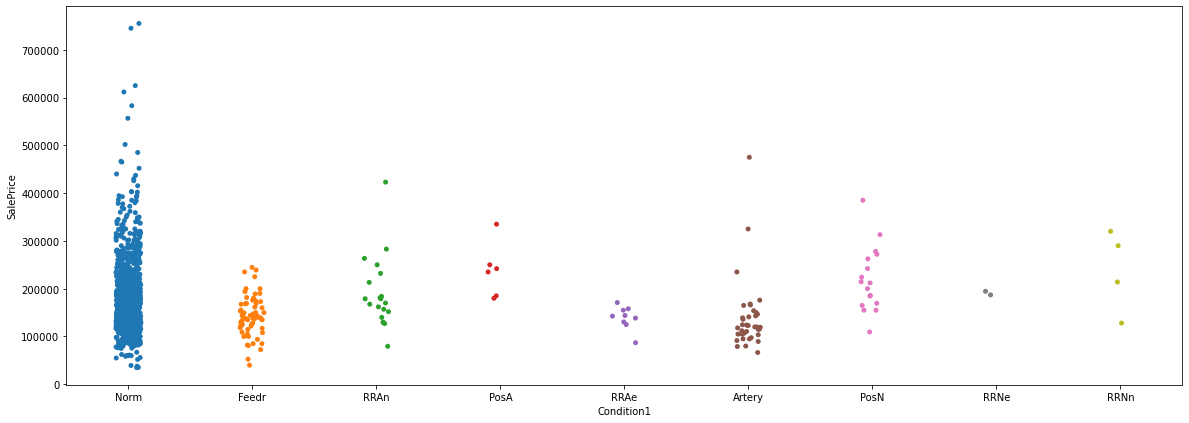

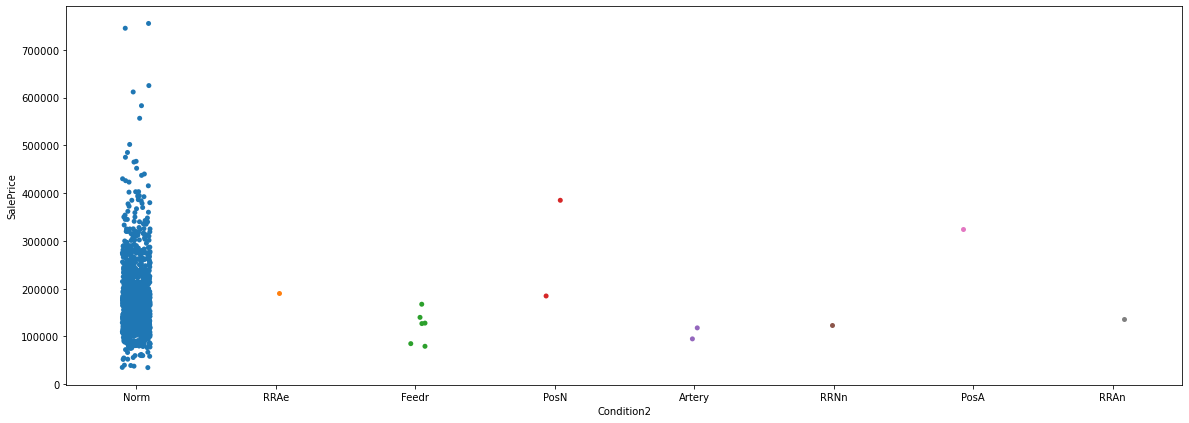

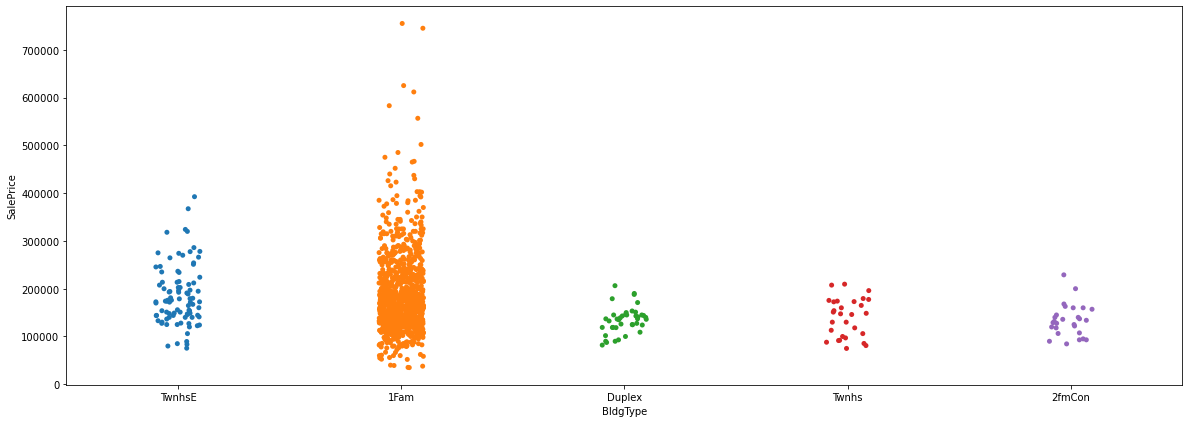

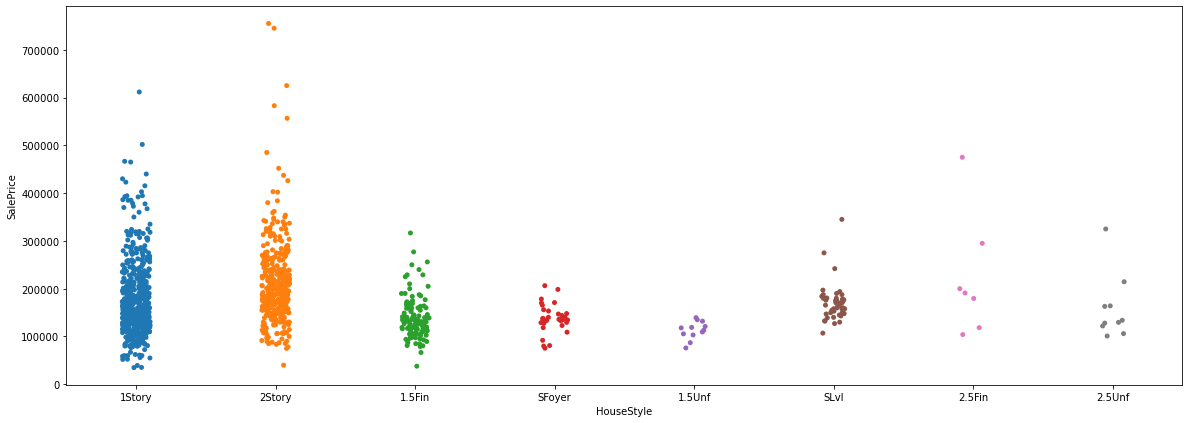

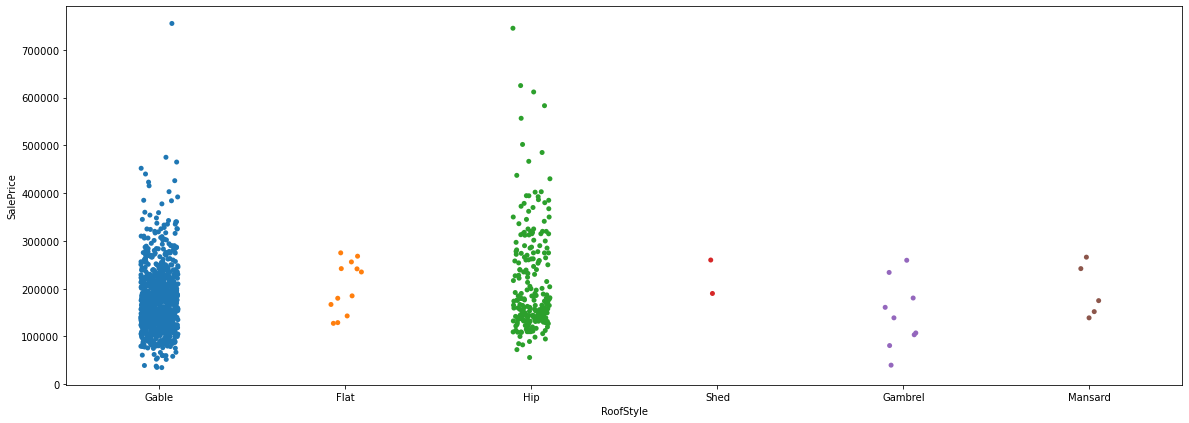

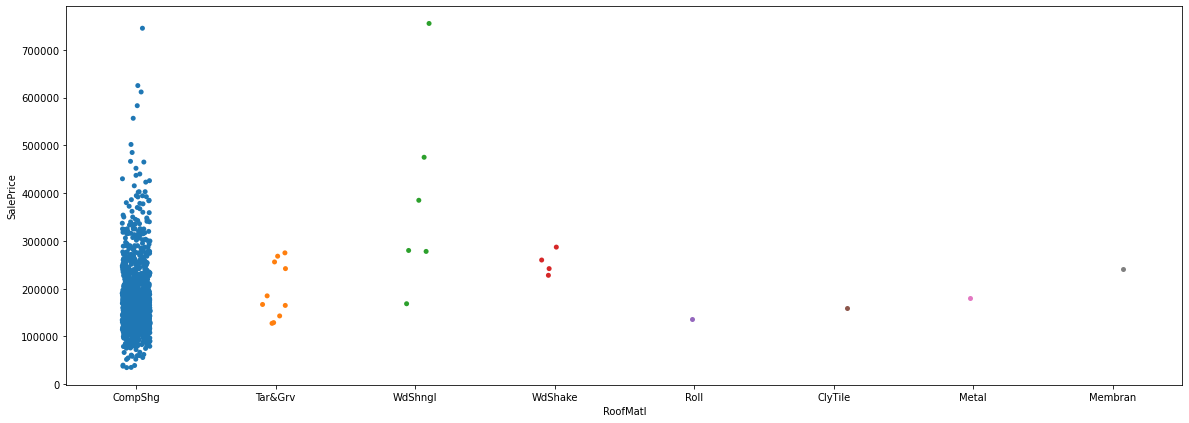

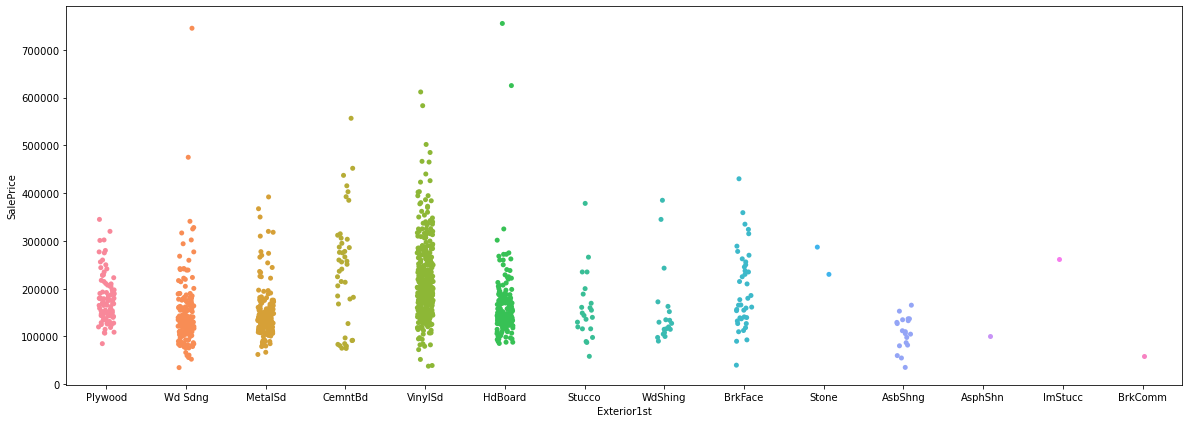

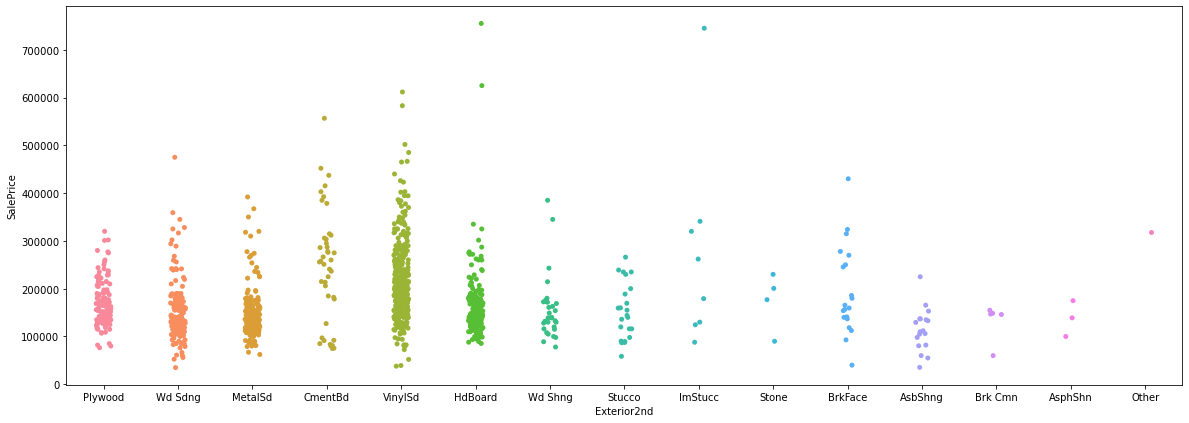

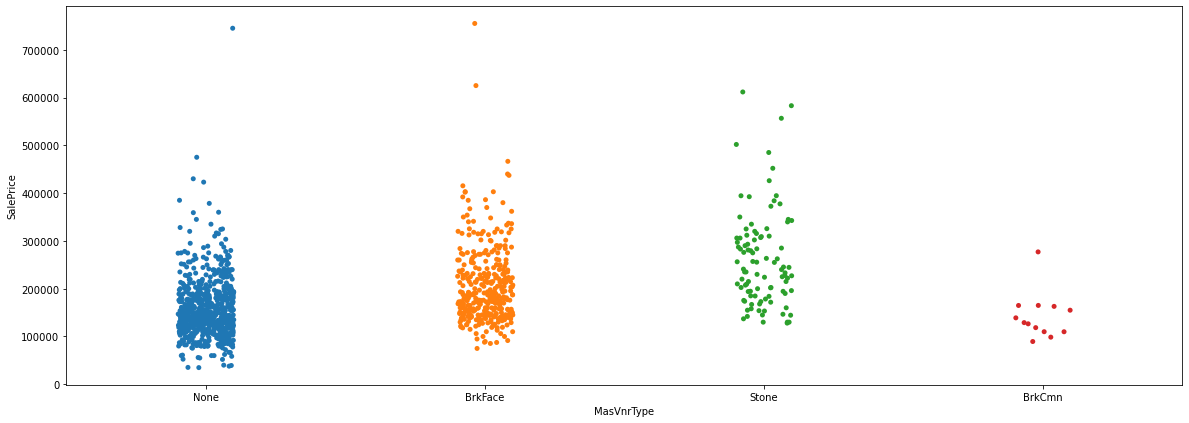

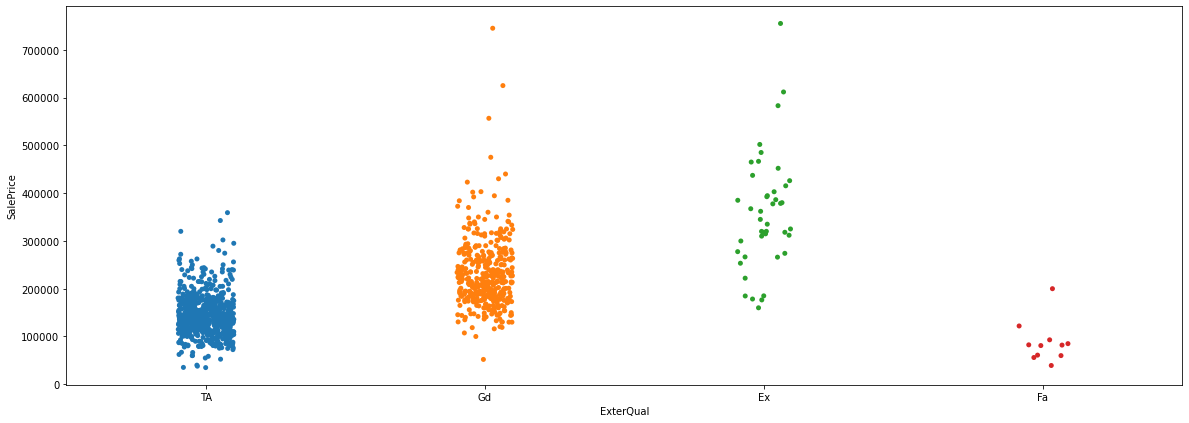

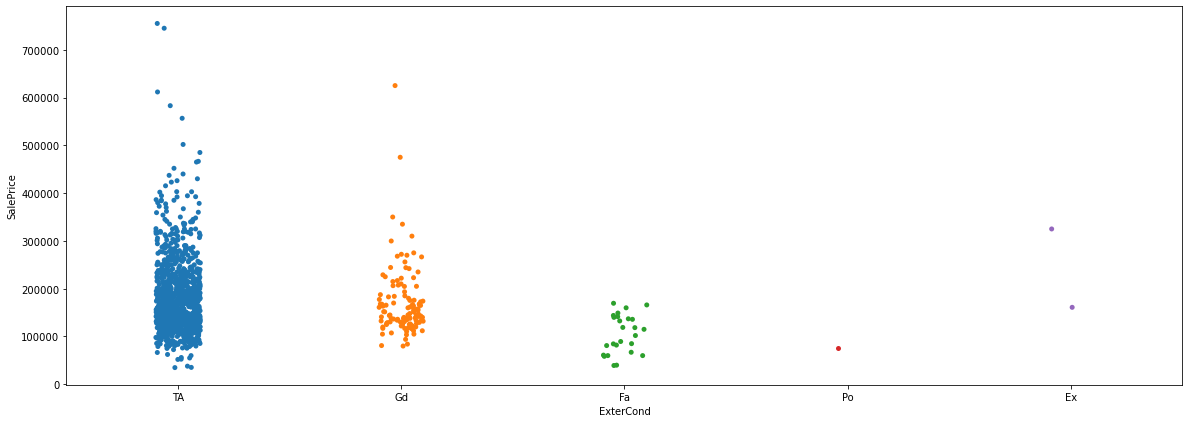

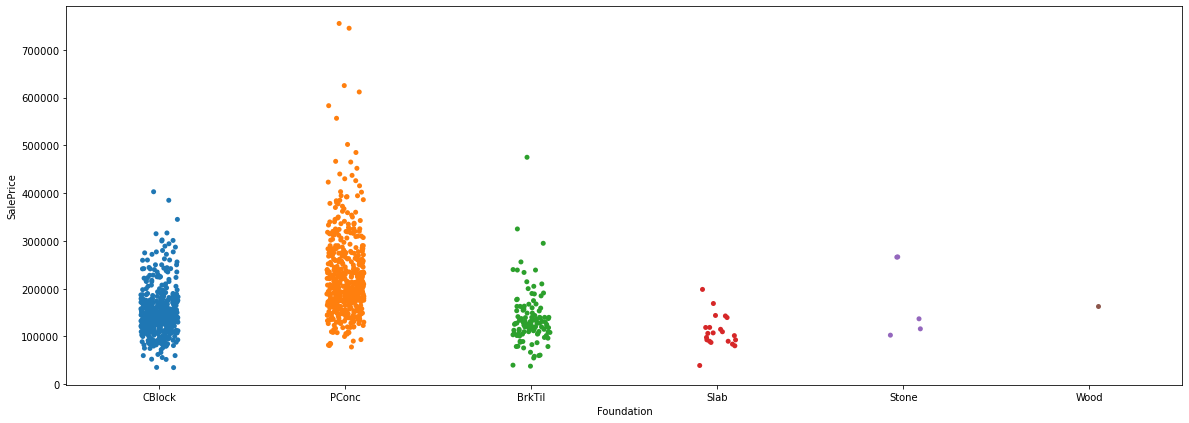

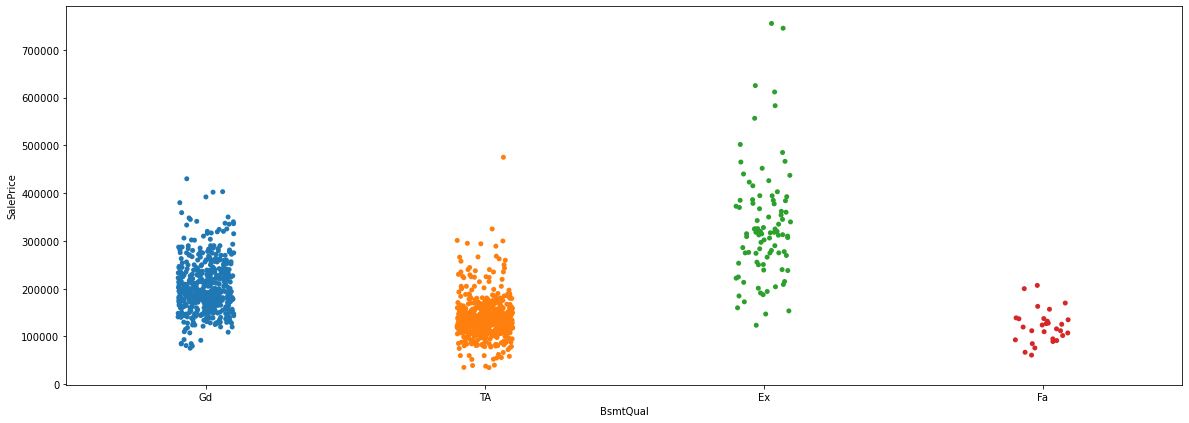

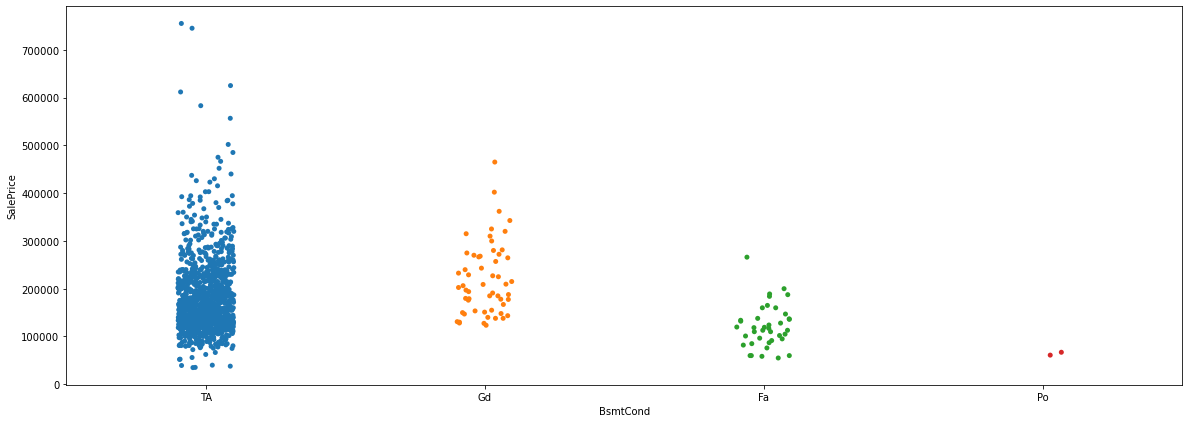

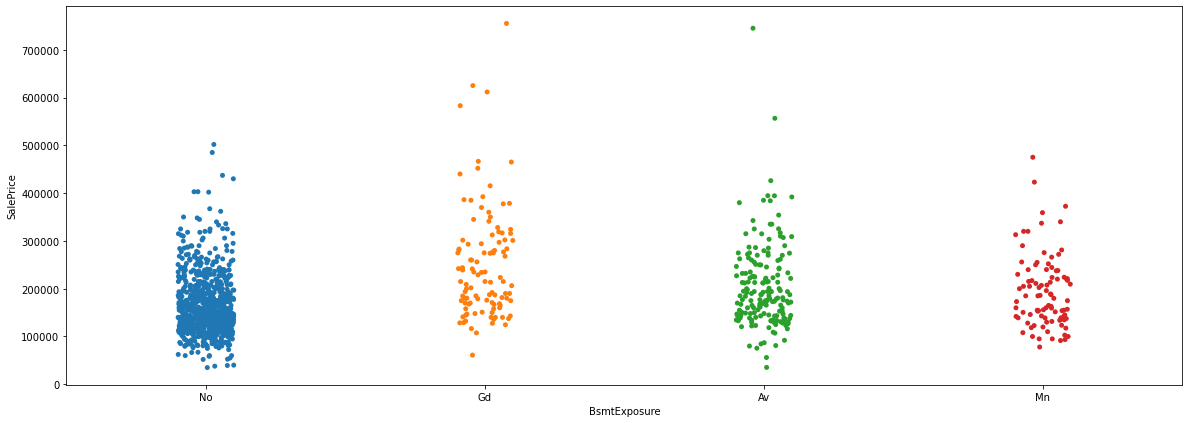

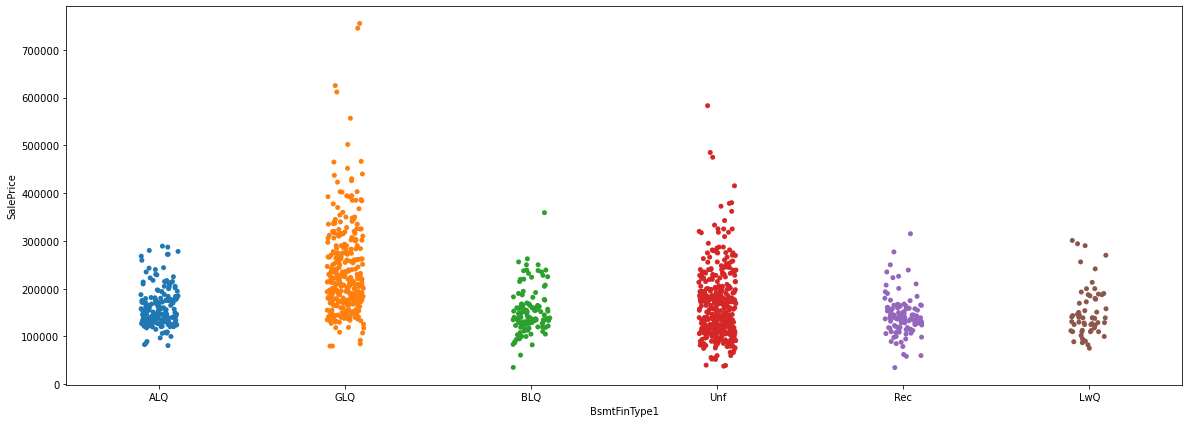

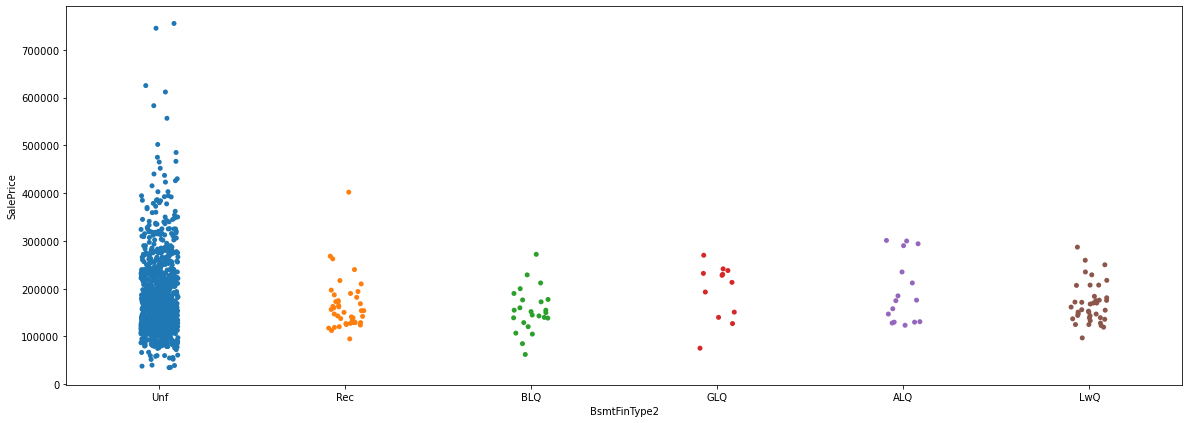

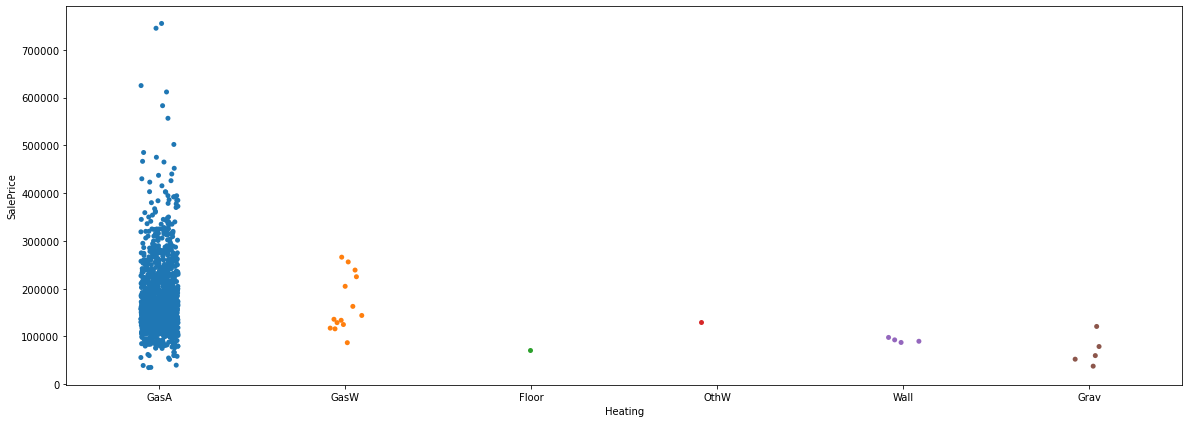

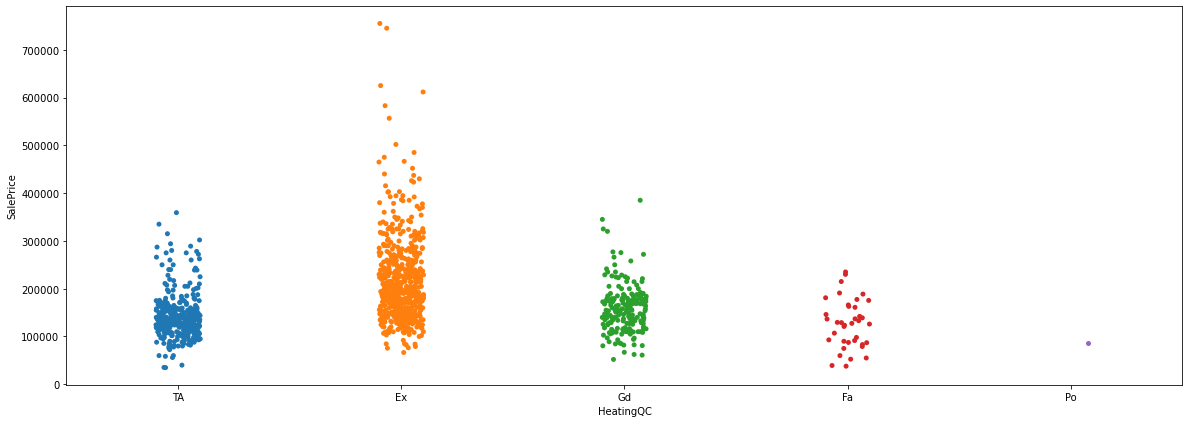

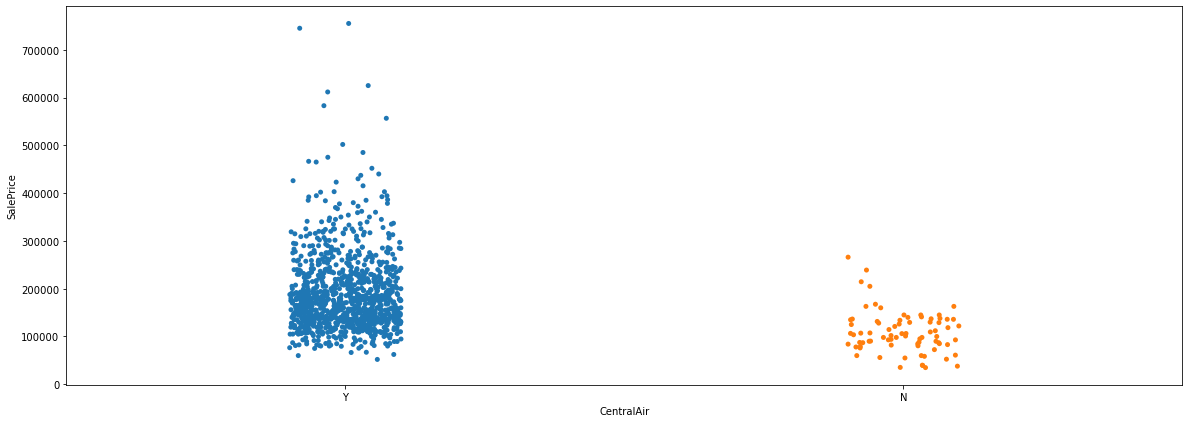

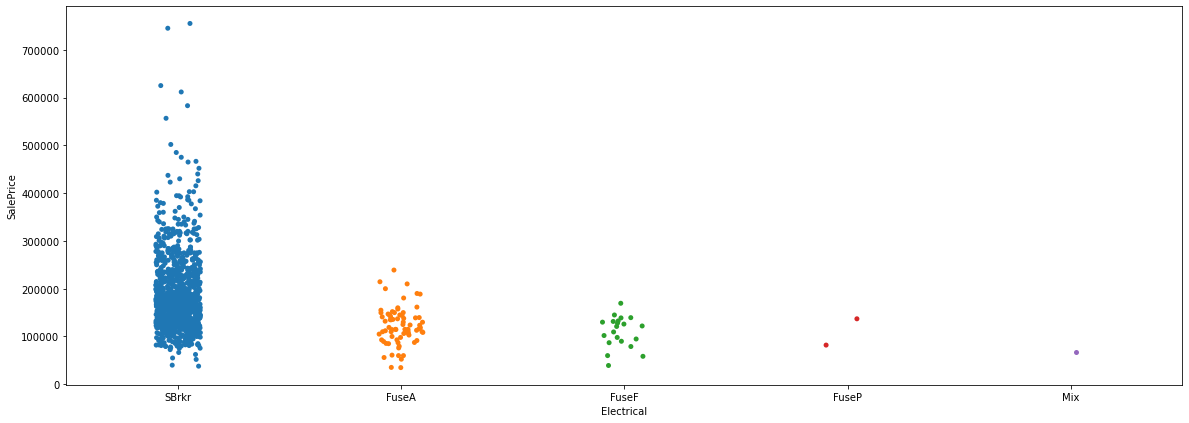

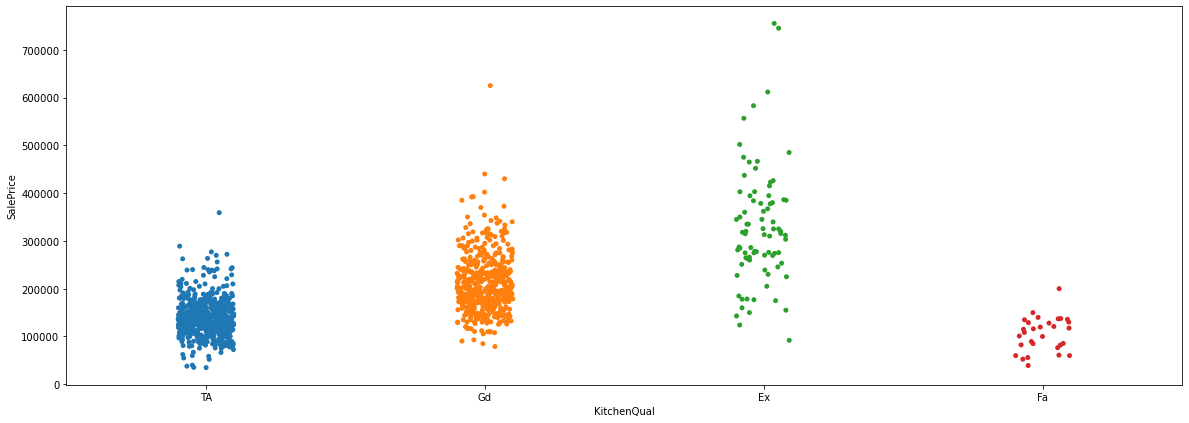

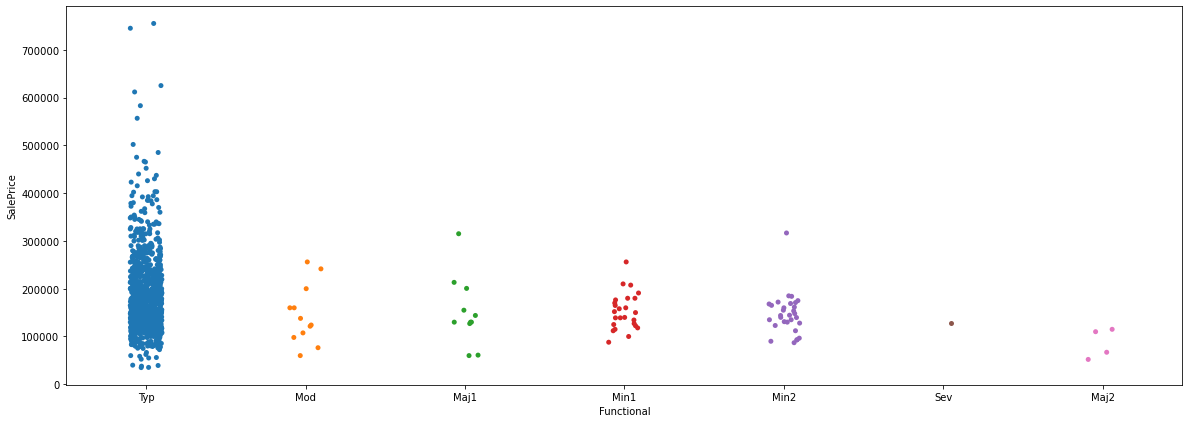

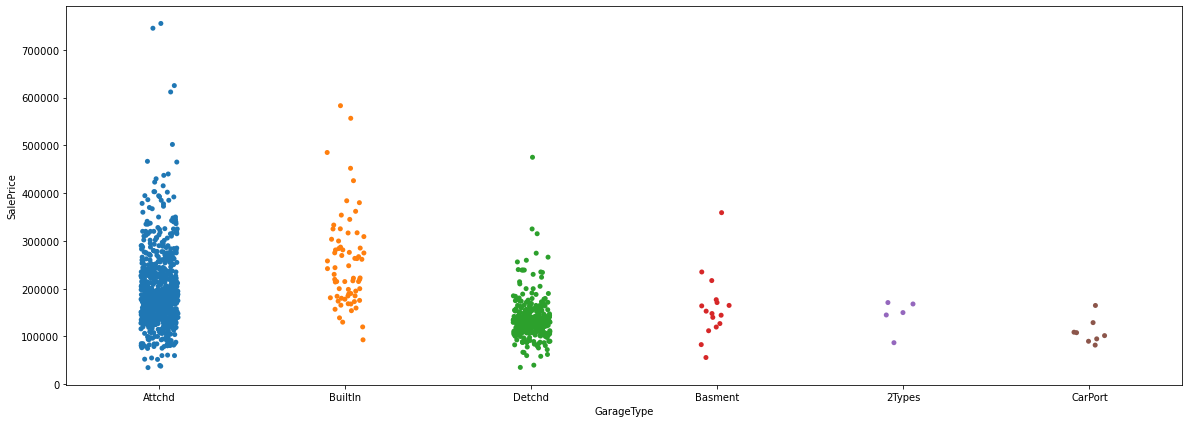

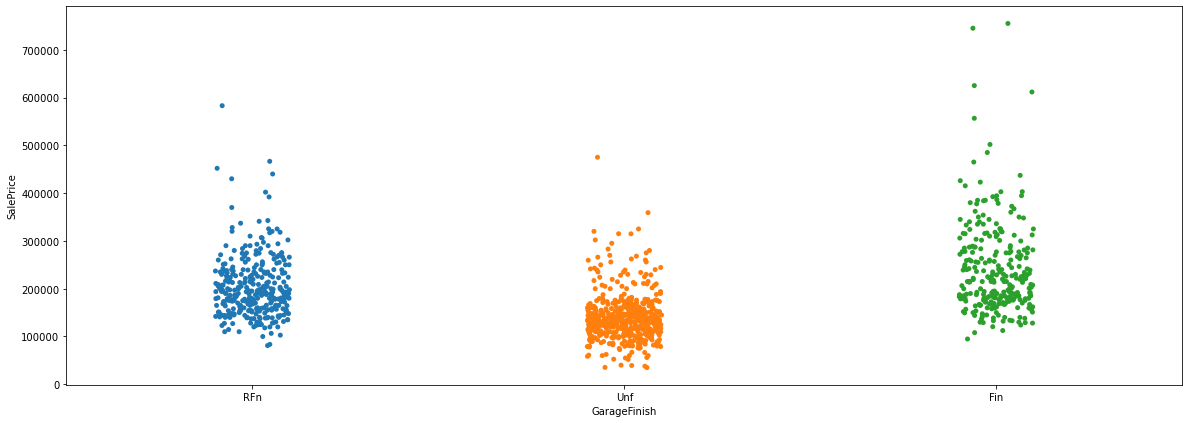

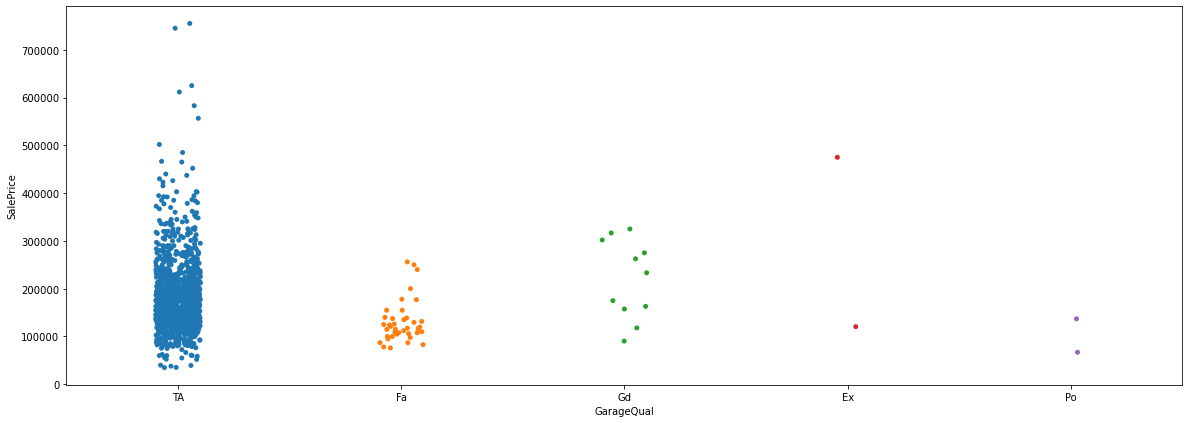

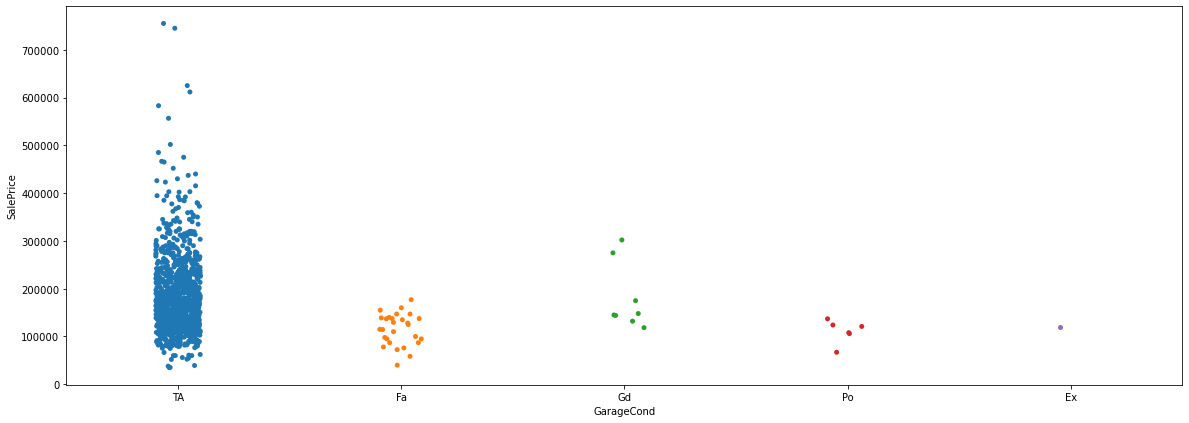

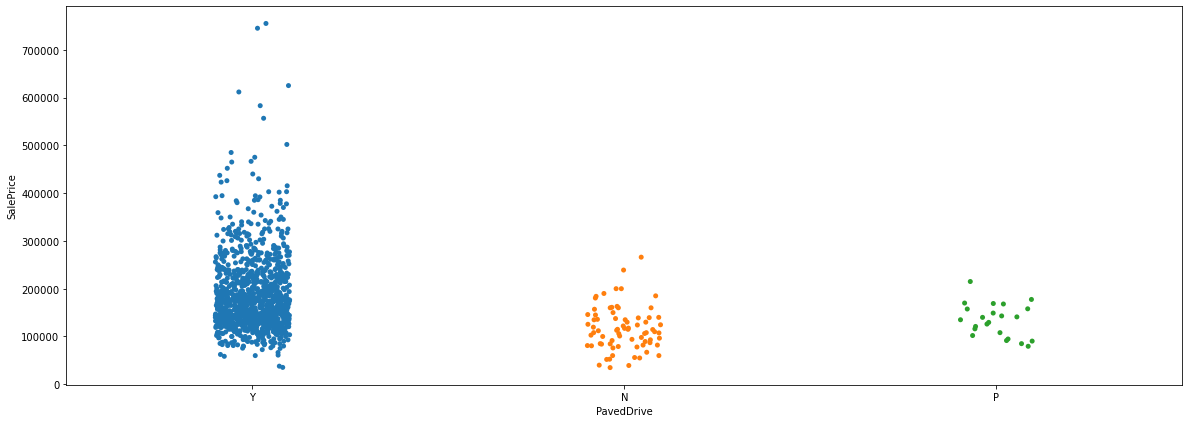

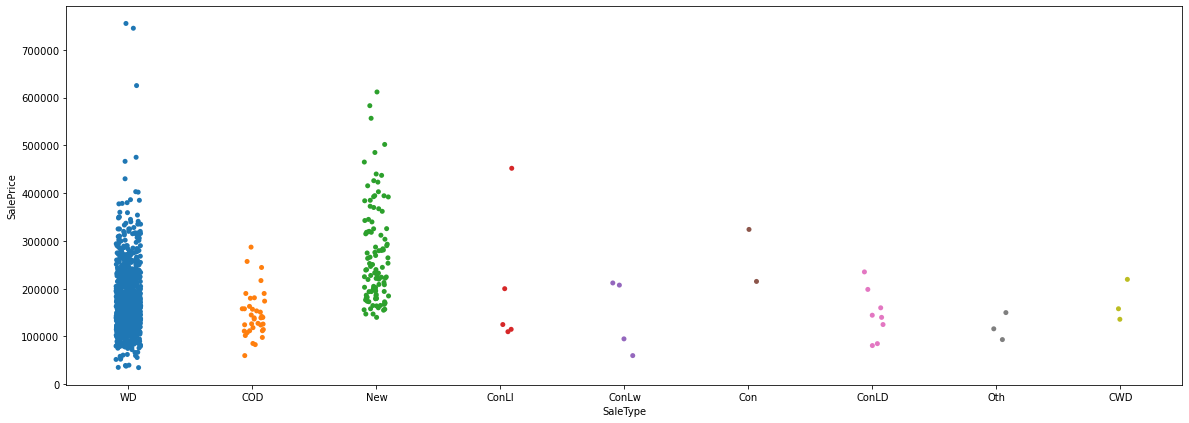

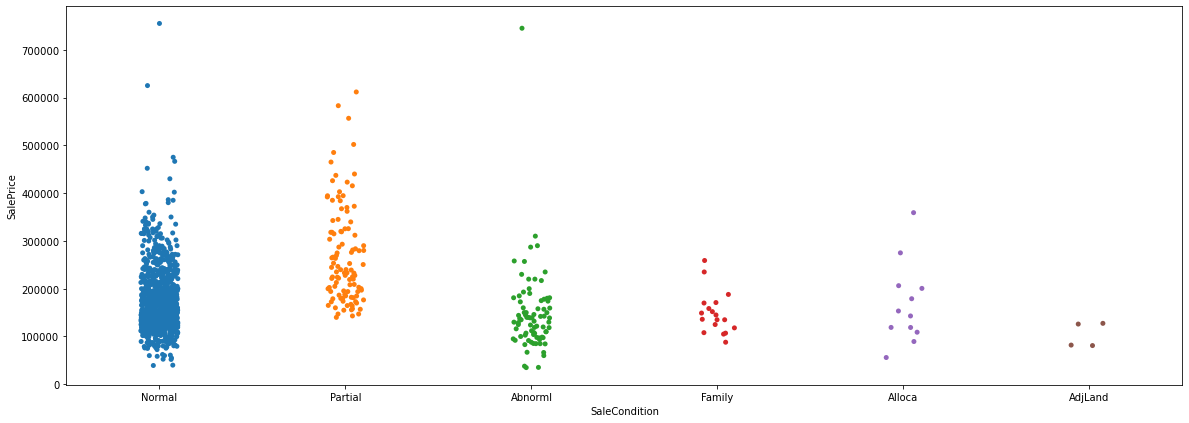

In [24]:
counter=1;


for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.stripplot(x=column, y="SalePrice", data=df)
        plt.show()

    MSZoning -> With RL zoning the property have higher value 
    Street-> with Pave stype property have higher value
    LotShape-> IR1 shape property have higher value
    LandContour -> LVL property have higher value
    LotConfig -> Corner property have higher value
    LandSlope -> Gentle slope property have higher value
    Neighborhood -> NoRidge property have higher value
    Condition1 ->norm property have higher value
    Condition2 ->norm property have higher value
    BldgType -> 1Fam property have higher value
    HouseStyle -> 2 story property have higher value
    RoofStyle -> Gable and Hip stype property have higher value
    RoofMatl -> Compshg and WdShngle type property have higher value
    Exterior1st -> Brkcomm, Aspshnn style decreases the property value
    Exterior2nd -> Hd board type property have higher value
    MasVnrType -> BrkCmn type decreases the property value
    ExterQual -> Gd and Ex quality have higher property value
    Foundation -> Pconc foundation property have higher value
    BsmtQual -> Ex quality property have higher value
    BsmtCond -> Po quality property have low price 
    BsmtFinType1 -> GLQ type have higher property prices
    BsmtFinType2 -> Unf type have higher price
    Heating -> GasA heating system have higher property price
    HeatingQC -> Houses with Fa HeatingQc price is low 
    CentralAir -> Houses with central air have higher cost
    Electrical -> houses with FuseP and Mix have lower property value
    KitchenQual -> Excelent kitchen quality can increase the Property value
    GarageType -> Attached garage have higher property value
    GarageQual -> Poor garage quality decreases the price of property
    PavedDrive -> Paved drive hiuses have higher price
    SaleType -> WD and New sale type can get higher price
    SaleCondition -> having AdjLand have lower price

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df[col] =  LE.fit_transform(df[col])

In [26]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120         3         70.0     4928       1         0   
1             20         3         95.0    15865       1         0   
2             60         3         92.0     9920       1         0   
3             20         3        105.0    11751       1         0   
4             20         3         70.0    16635       1         0   
...          ...       ...          ...      ...     ...       ...   
1163          20         3         70.0     9819       1         0   
1164          20         3         67.0     8777       1         3   
1165         160         3         24.0     2280       1         3   
1166          70         0         50.0     8500       1         3   
1167          60         3         70.0     7861       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0               3          0          4          0  ...              0   
1               3          0          4          1  ...              0   
2               3          0          1          0  ...              0   
3               3          0          4          0  ...              0   
4               3          0          2          0  ...              0   
...           ...        ...        ...        ...  ...            ...   
1163            3          0          4          0  ...              0   
1164            3          0          4          0  ...              0   
1165            3          0          2          0  ...              0   
1166            3          0          4          0  ...            172   
1167            3          0          4          0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       2    2007         8   
1             0          224         0        0      10    2007         8   
2             0            0         0        0       6    2007         8   
3             0            0         0        0       1    2010         0   
4             0            0         0        0       6    2009         8   
...         ...          ...       ...      ...     ...     ...       ...   
1163          0            0         0        0       2    2010         8   
1164          0            0         0        0       5    2009         8   
1165          0            0         0        0       7    2009         8   
1166          0            0         0        0       7    2008         8   
1167          0            0         0        0       6    2006         8   

      SaleCondition  SalePrice  
0                 4     128000  
1                 4     268000  
2                 4     269790  
3                 4     190000  
4                 4     215000  
...             ...        ...  
1163              4     122000  
1164              4     108000  
1165              4     148500  
1166              4      40000  
1167              4     183200  

[1168 rows x 75 columns]

In [27]:
for i in continous_columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

Outliers removal

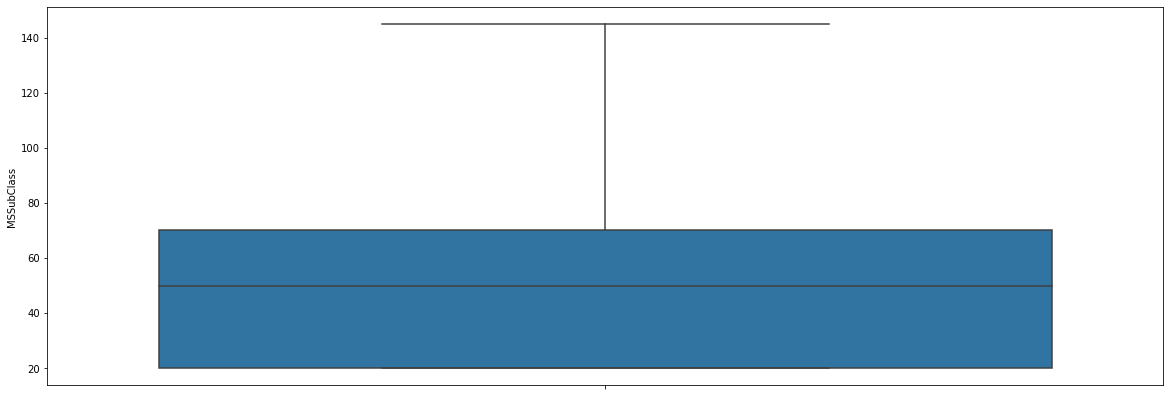

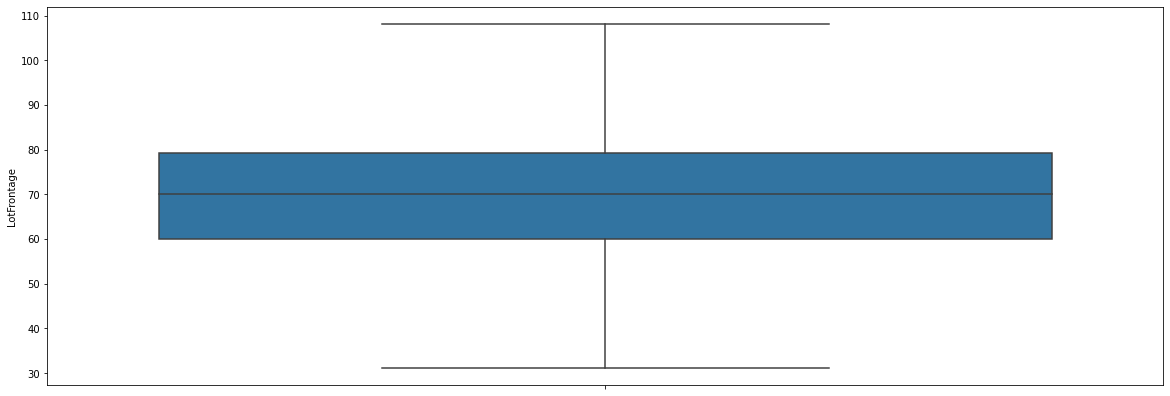

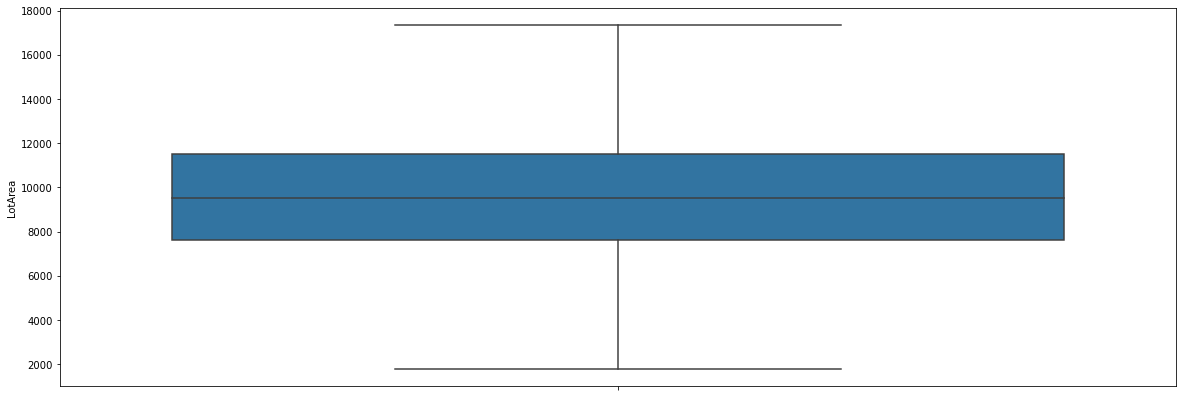

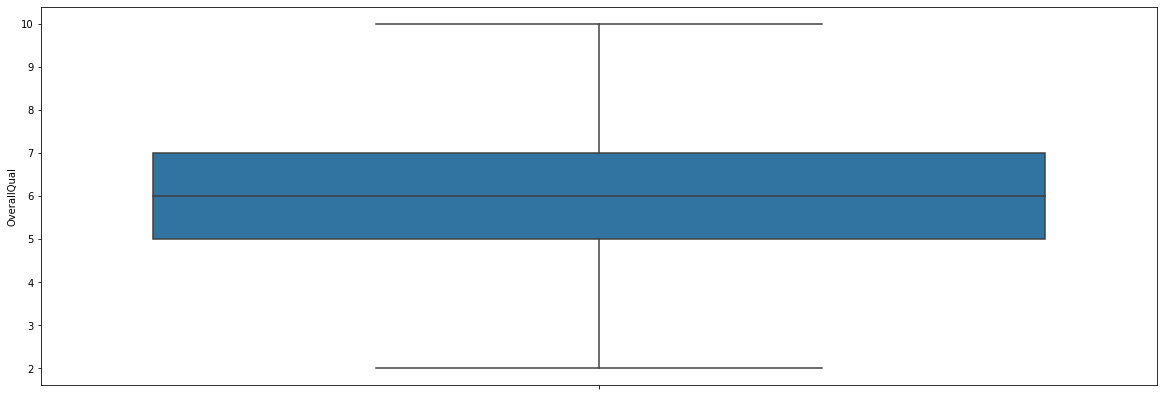

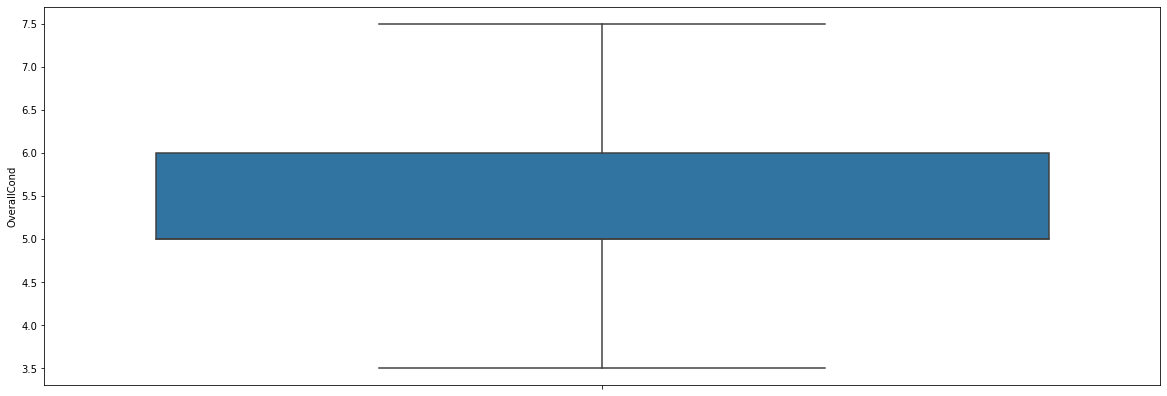

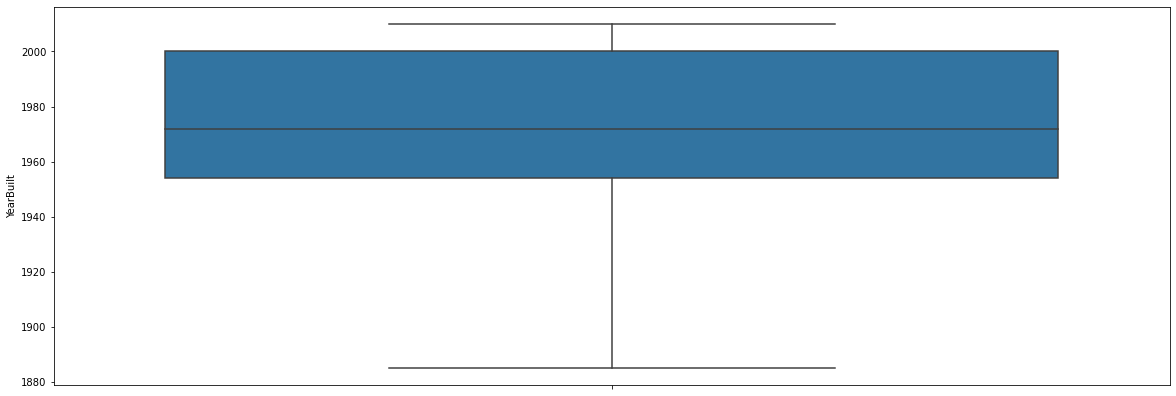

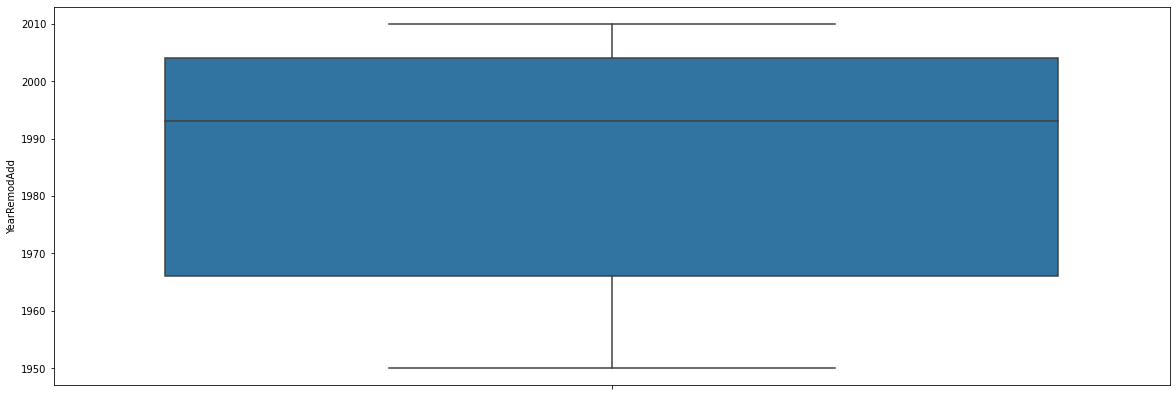

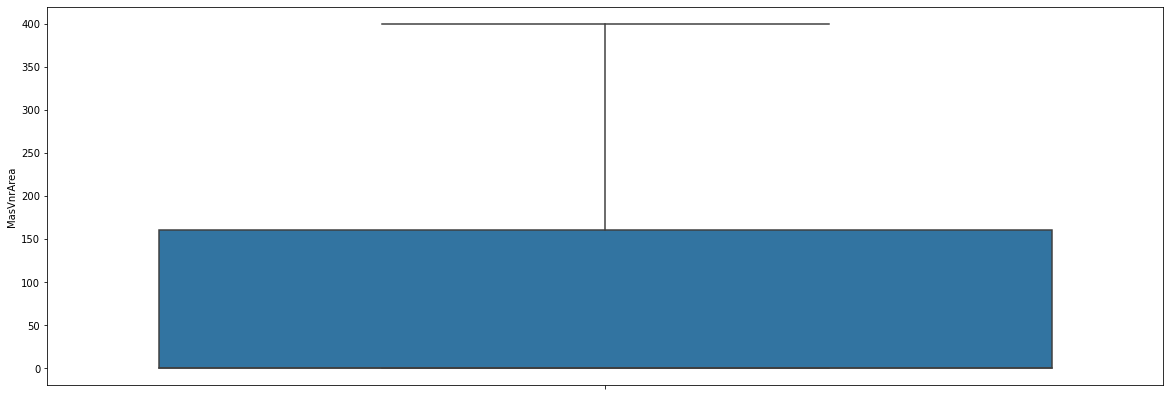

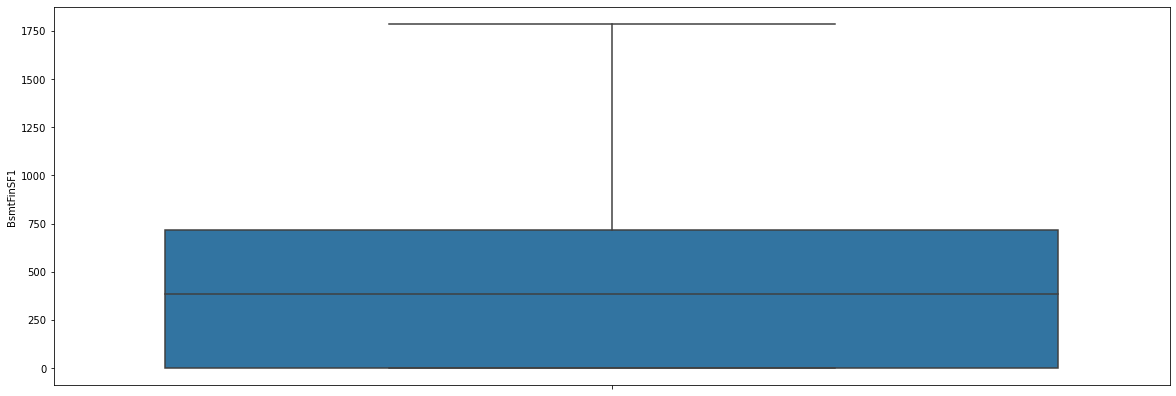

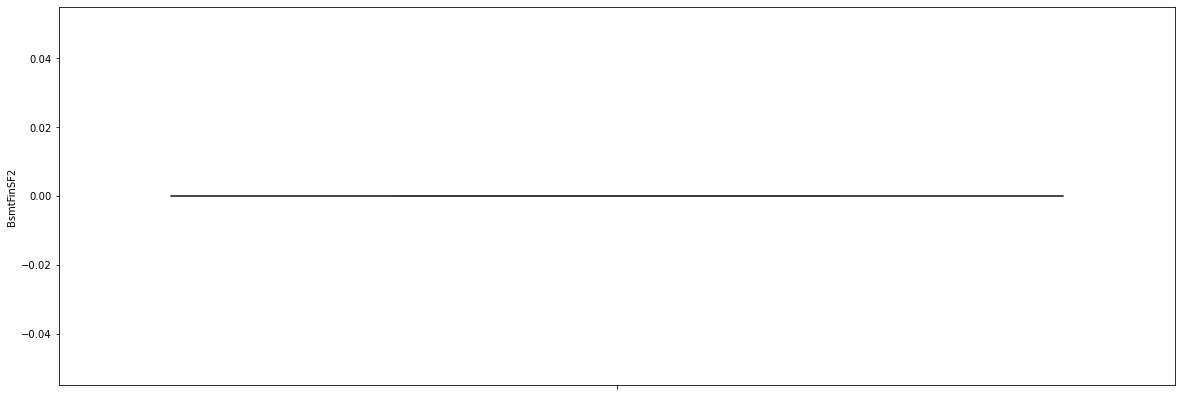

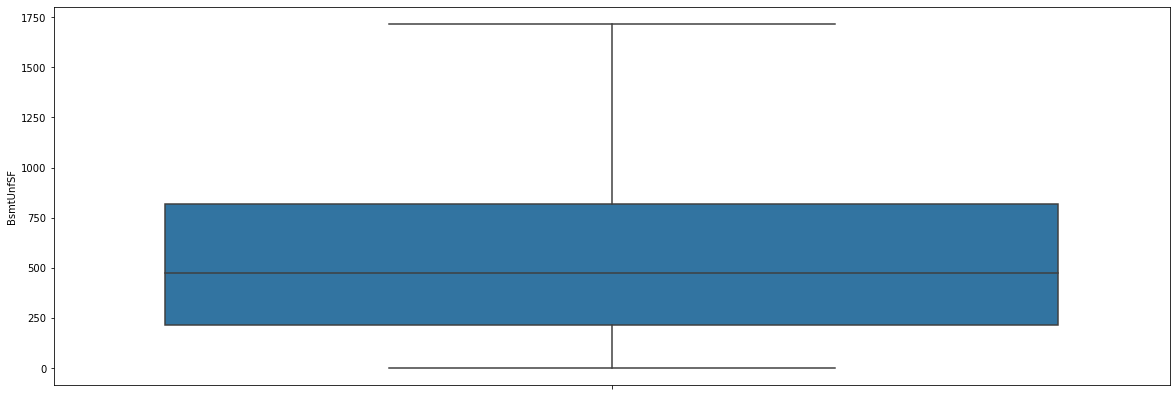

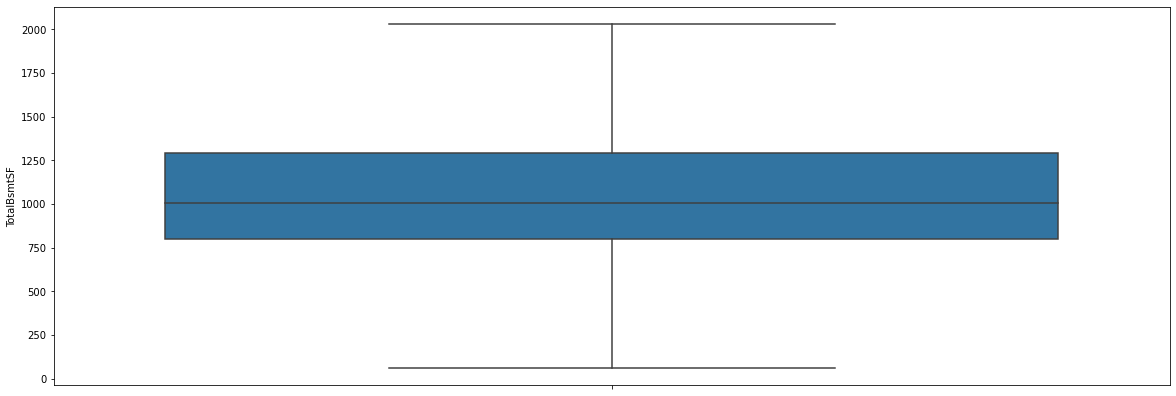

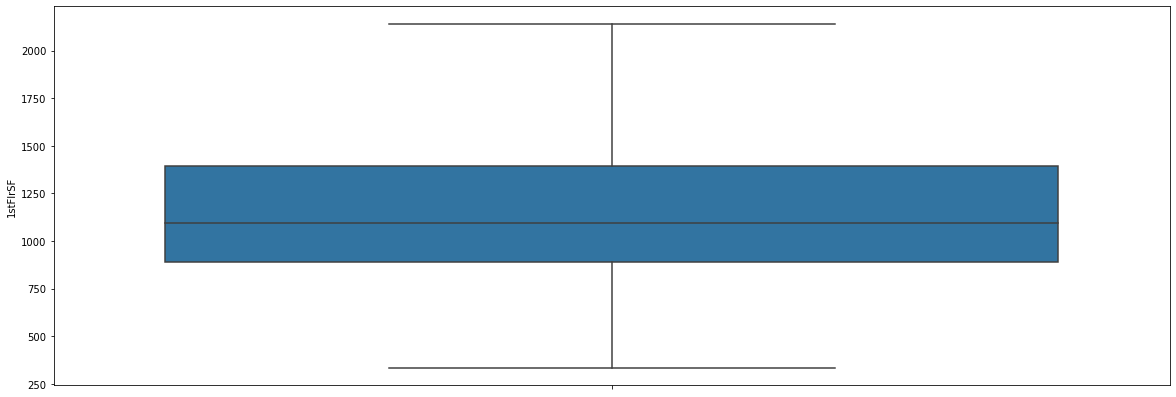

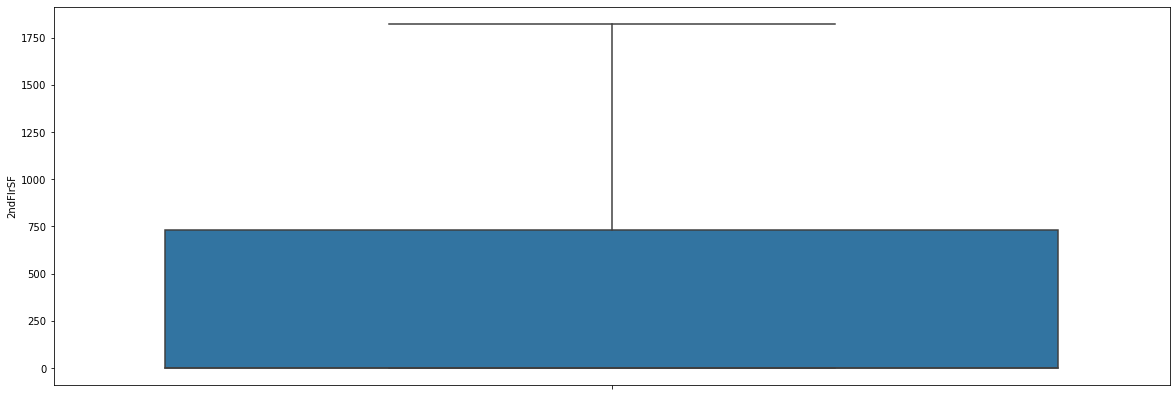

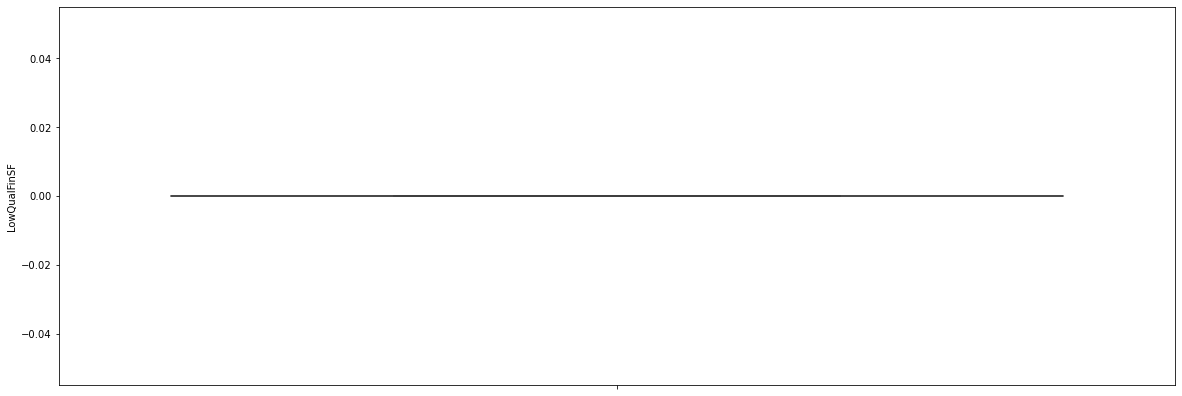

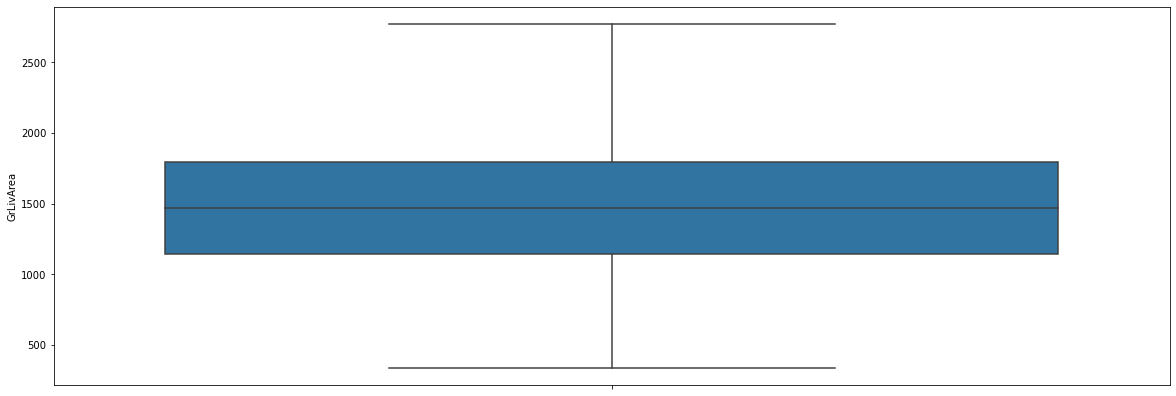

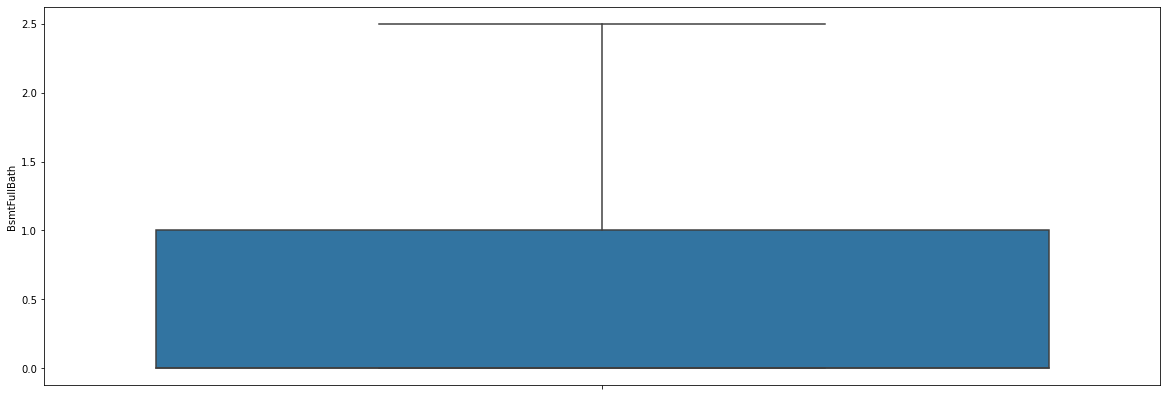

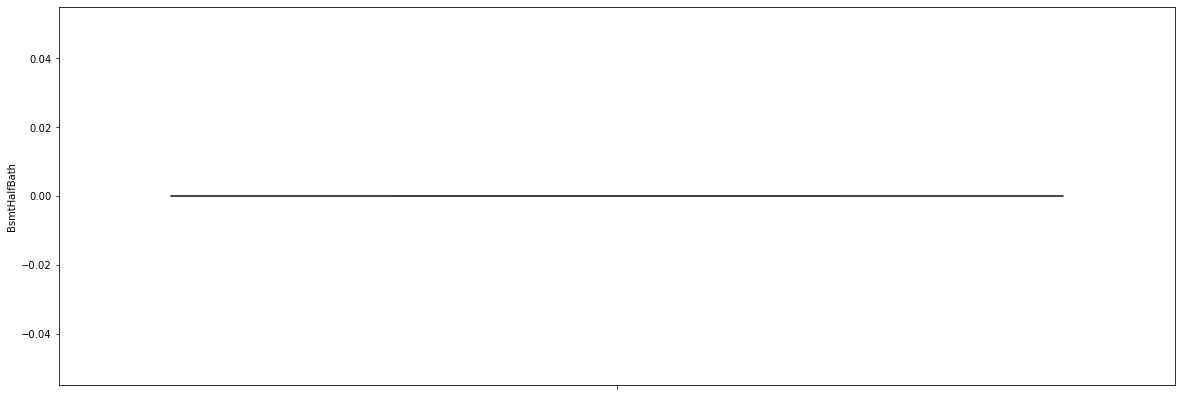

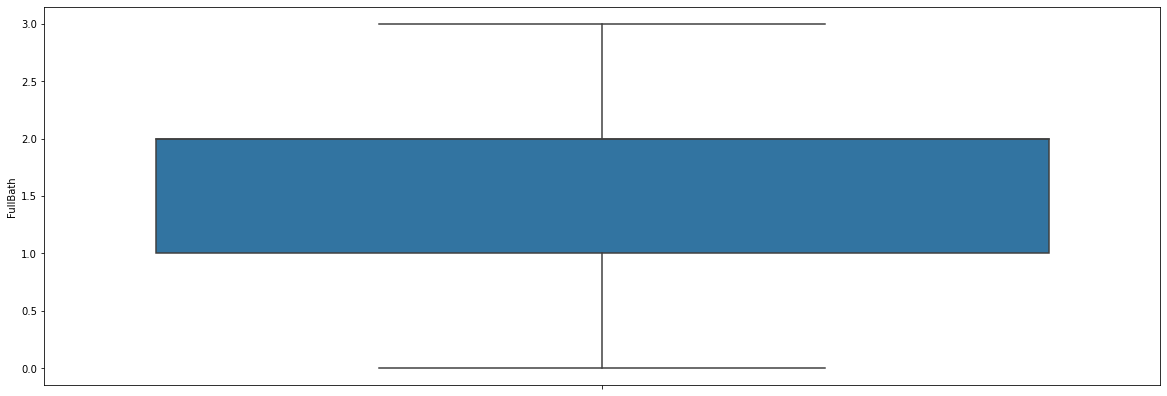

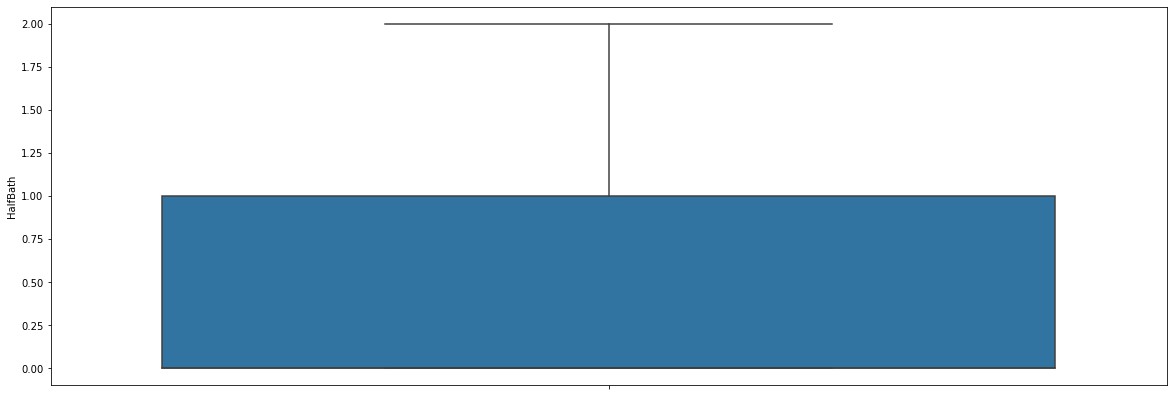

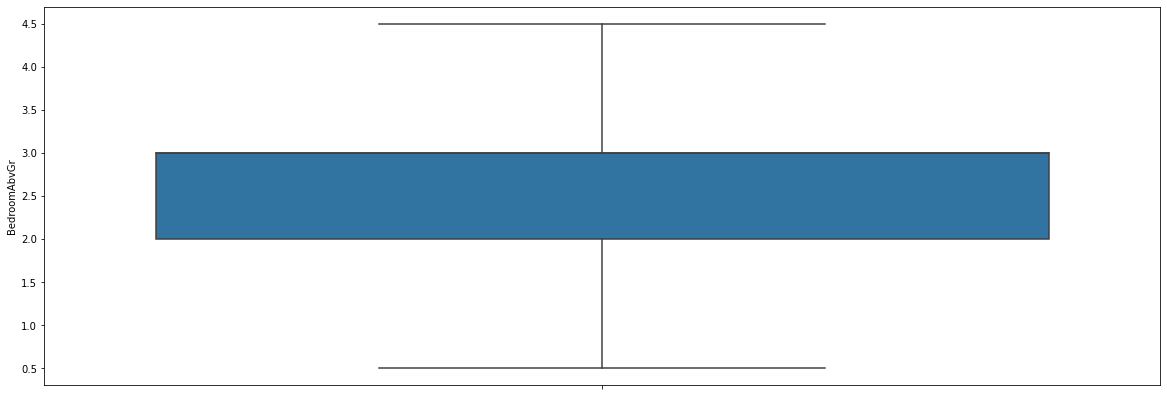

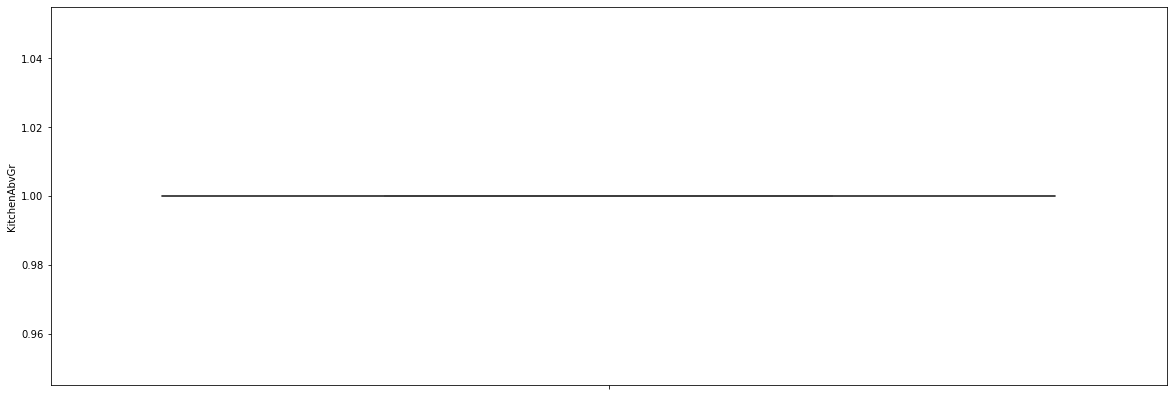

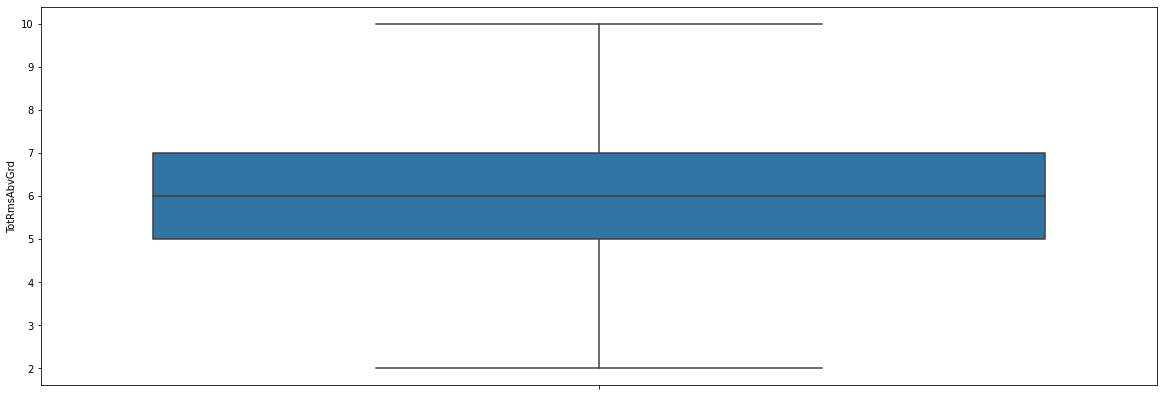

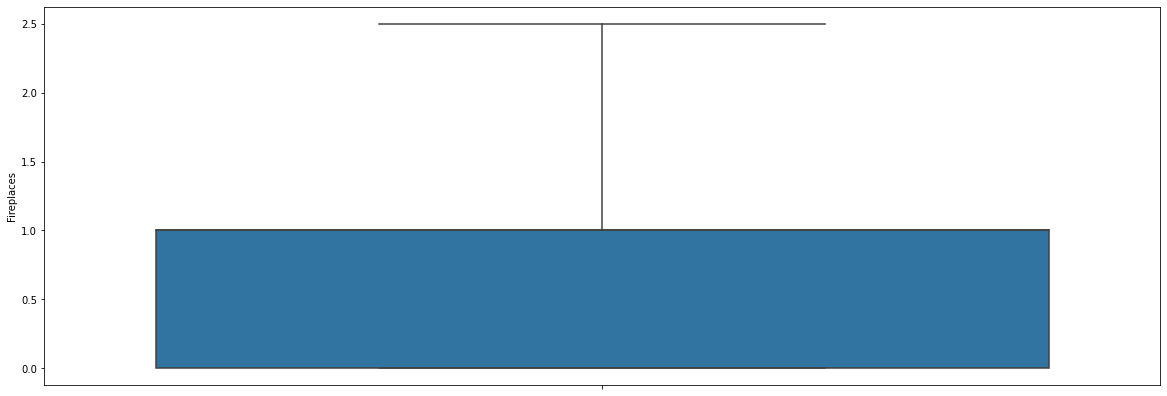

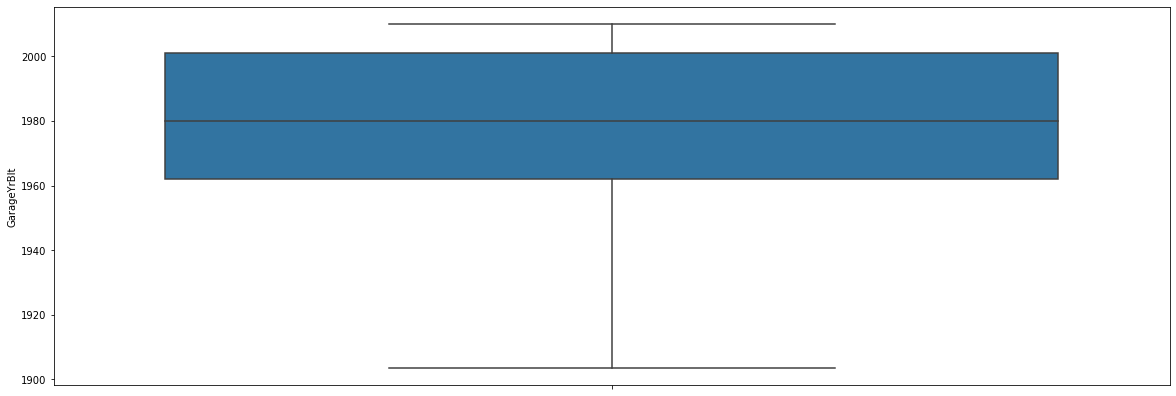

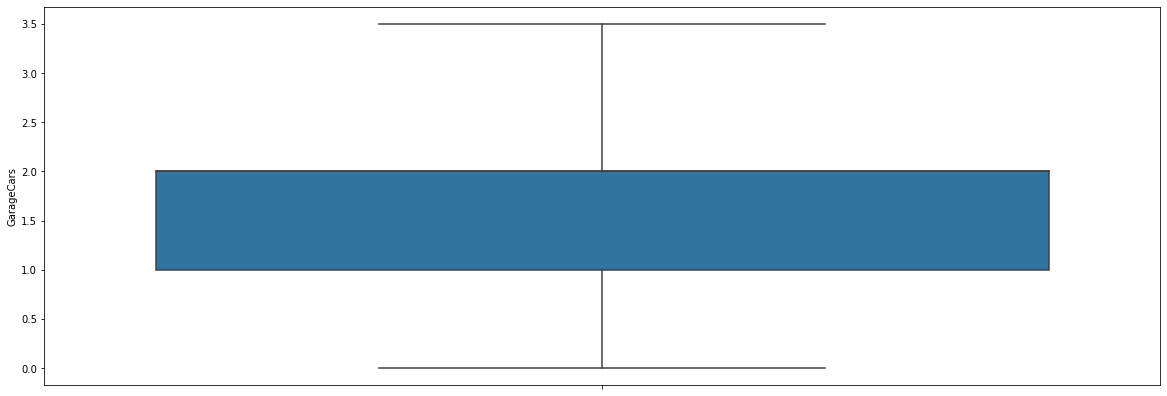

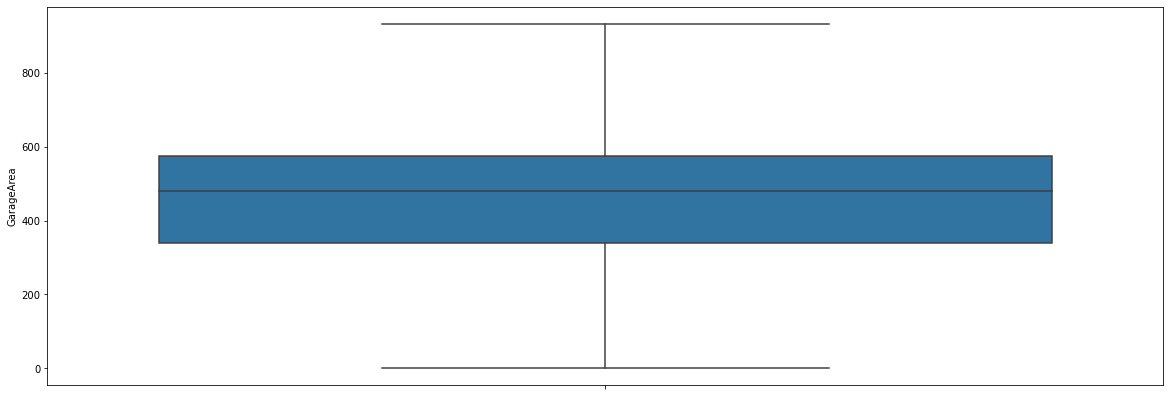

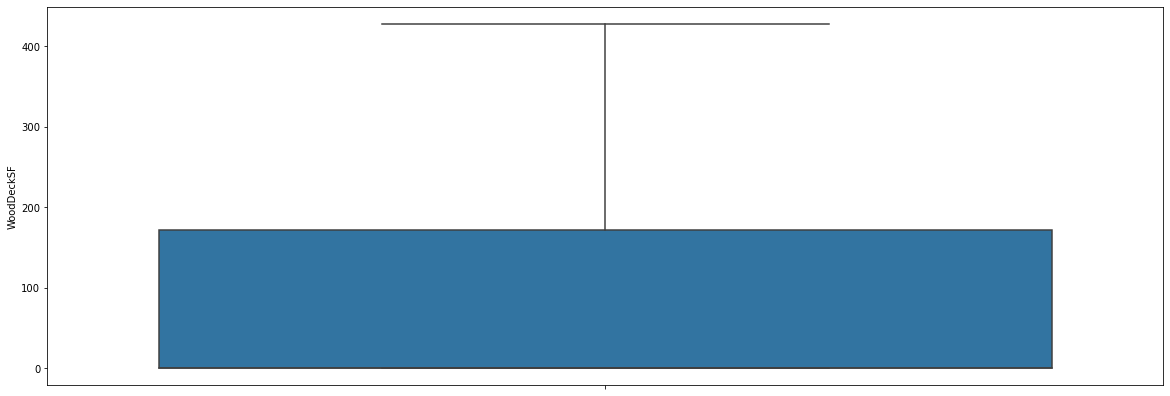

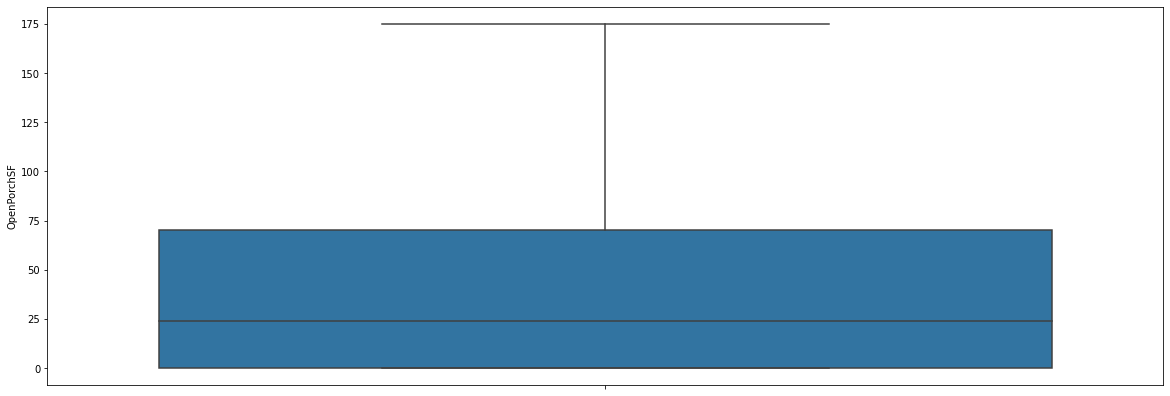

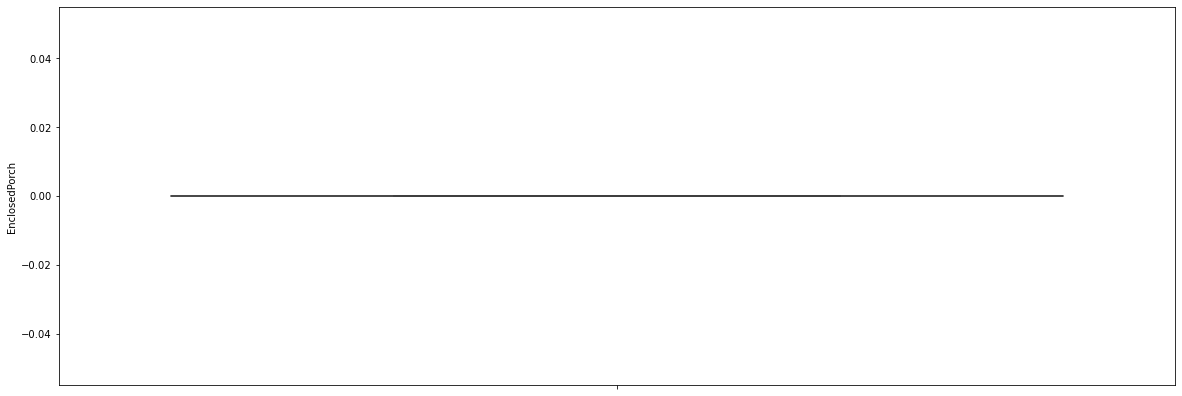

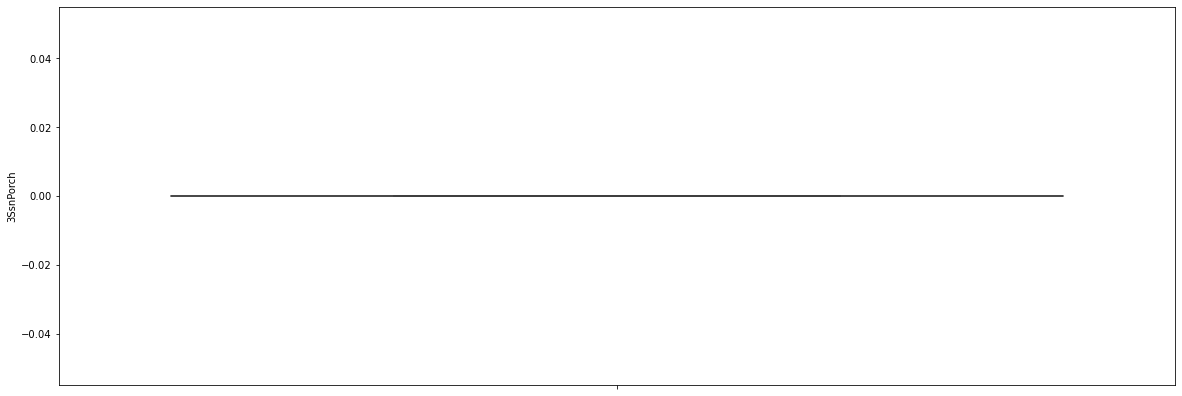

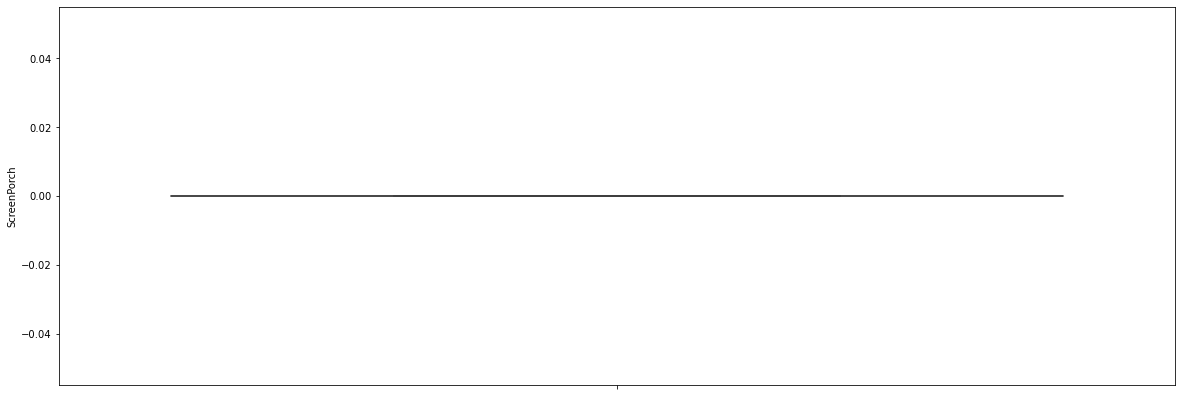

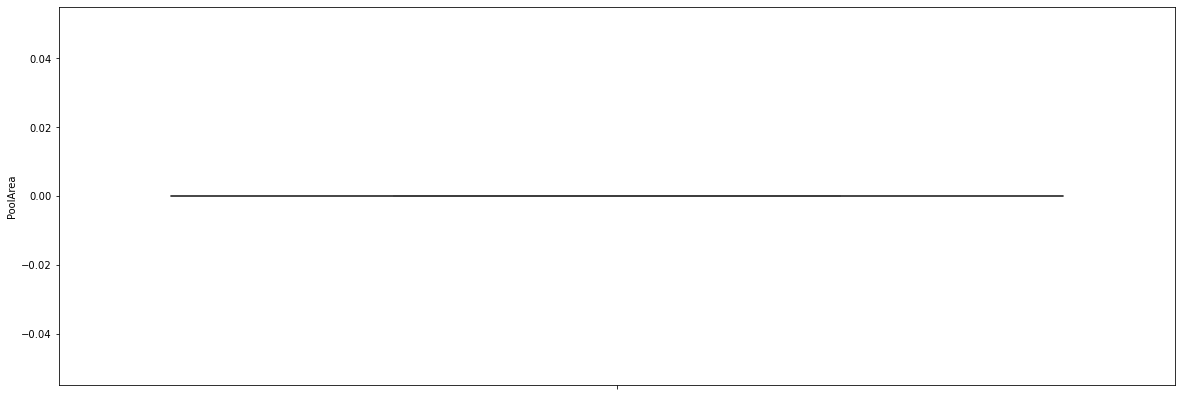

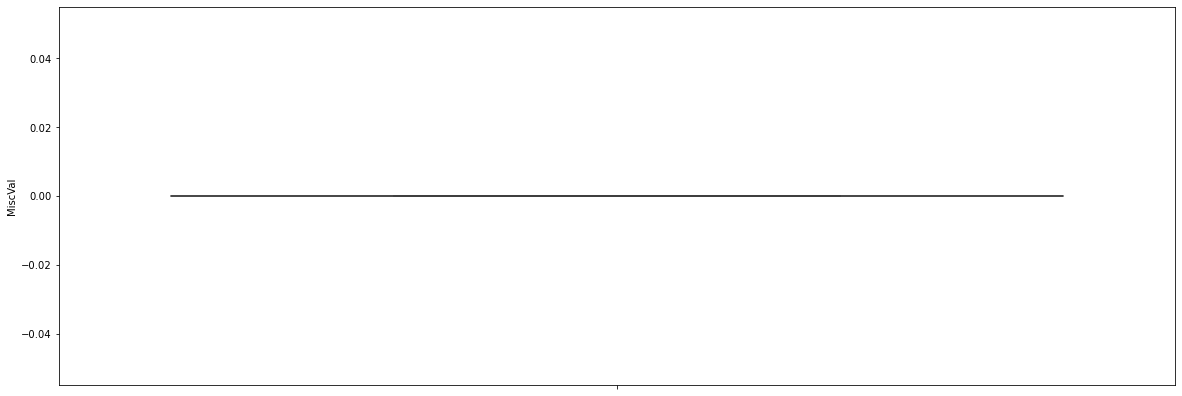

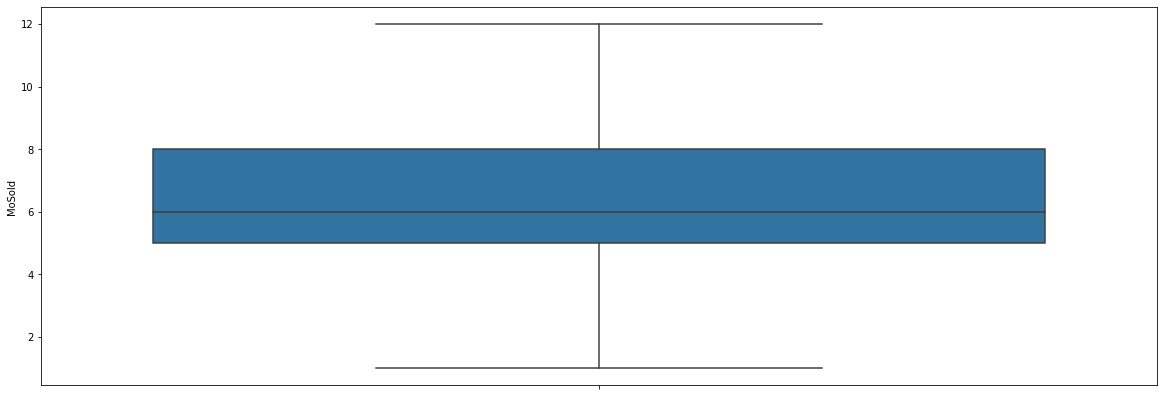

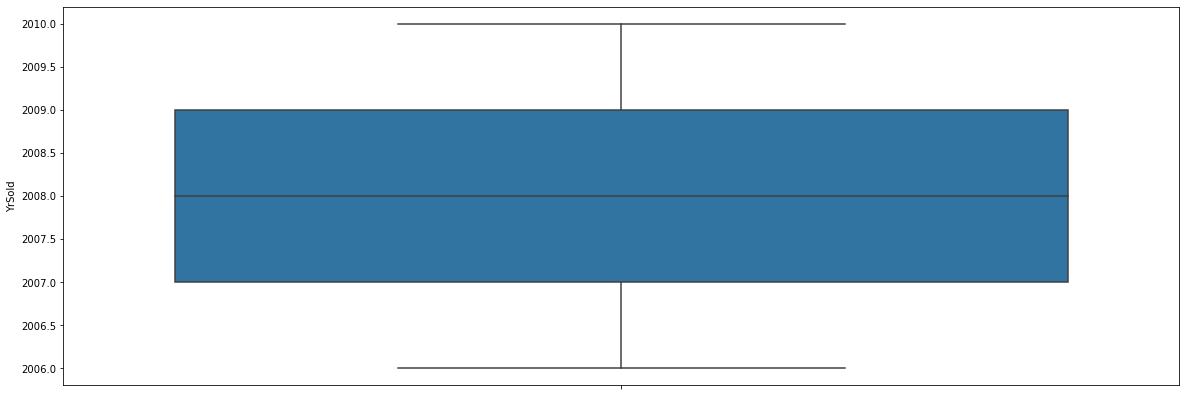

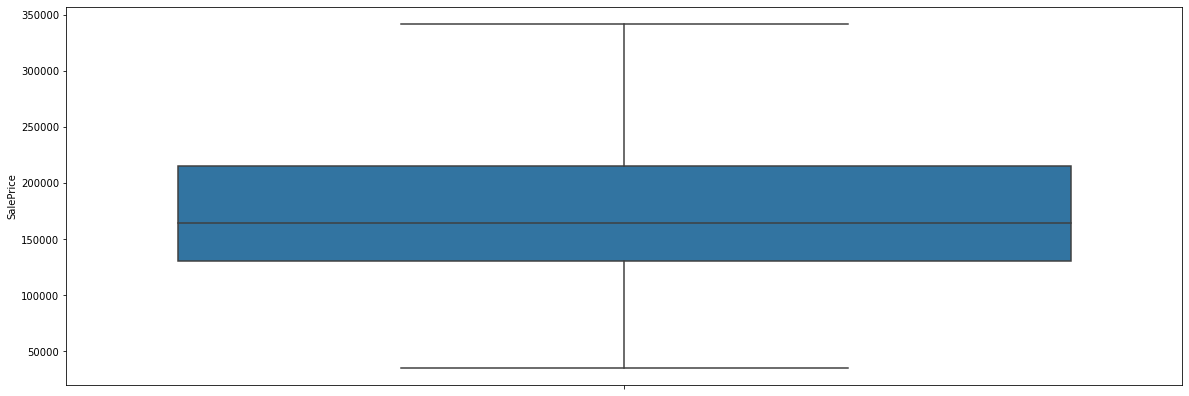

In [28]:
counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continous_columns[i],hue = continous_columns[i],data=df)
        #sns.boxplot(df[columns[i]])
        plt.show()

Outliers are successfully removed

In [29]:
fin_df  = df.drop(categorical_columns,axis=1)
fin_df = fin_df.drop('SalePrice',axis=1)#dropping the object type variables/ target variable
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

Scaling the data

In [30]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

Removing Skewness

In [31]:
fin_df_new.skew()

MSSubClass       0.158112
LotFrontage      0.012692
LotArea          0.002066
OverallQual      0.000728
OverallCond      0.000936
YearBuilt       -0.167651
YearRemodAdd    -0.297070
MasVnrArea       0.633846
BsmtFinSF1       0.127013
BsmtFinSF2       0.000000
BsmtUnfSF        0.070161
TotalBsmtSF      0.011932
1stFlrSF         0.024386
2ndFlrSF         0.391445
LowQualFinSF     0.000000
GrLivArea        0.018678
BsmtFullBath     0.369112
BsmtHalfBath     0.000000
FullBath        -0.022417
HalfBath         0.498982
BedroomAbvGr    -0.002153
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000622
Fireplaces       0.121385
GarageYrBlt     -0.176423
GarageCars      -0.013013
GarageArea       0.006177
WoodDeckSF       0.345480
OpenPorchSF      0.329374
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold          -0.008564
YrSold          -0.041226
dtype: float64

Skewness Removed

In [32]:
fin_df_new= fin_df_new.join(df['SalePrice'])
for i in categorical_columns:
    fin_df_new=fin_df_new.join(df[i])

In [33]:
x = fin_df_new.drop('SalePrice',axis=1)
y = fin_df_new['SalePrice']

# Train test split

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.9122522295050699 on Random State 33


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=33)

# model building

In [36]:
from sklearn import metrics
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9122522295050699
MAE: 14889.955766381772
MSE: 371736028.1239309
RMSE: 19280.45715547043


In [37]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred=rr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.911823459114965
MAE: 14934.890606094272
MSE: 373552477.7145672
RMSE: 19327.505729259716


In [38]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred=model_lasso.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9118234658159894
MAE: 14935.104867786691
MSE: 373552449.3262428
RMSE: 19327.504994857532


In [39]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred=model_enet.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9119966779517421
MAE: 14928.021981156287
MSE: 372818650.72367525
RMSE: 19308.512390230255


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2 score', r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.77230316602535
MAE: 23381.713675213676
MSE: 964618430.767094
RMSE: 31058.30695268327


In [41]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8870777493514164
MAE: 15944.455769230768
MSE: 478385589.8121632
RMSE: 21872.027565183875


# cross Vaildation

In [42]:
print("Cross validation score:",cross_val_score(regr,x,y,cv=5).mean())

Cross validation score: 0.8587944118029416


In [43]:
print("Cross validation score:",cross_val_score(rr,x,y,cv=5).mean())

Cross validation score: 0.8596712295672658


In [44]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,cv=5).mean())

Cross validation score: 0.8595843302432258


In [45]:
print("Cross validation score:",cross_val_score(model_enet,x,y,cv=5).mean())

Cross validation score: 0.8639115938544559


In [46]:
print("Cross validation score:",cross_val_score(dtr,x,y,cv=5).mean())

Cross validation score: 0.7304391277680083


In [47]:
print("Cross validation score:",cross_val_score(rdr,x,y,cv=5).mean())

Cross validation score: 0.8832089170211039


# Parameter Hypertuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter = {
 'max_depth': [100, 400, 800,1200],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [100,200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)


In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [55]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 400,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 200)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8868370055492021
MAE: 15964.659387464388
MSE: 479405480.62335813
RMSE: 21895.33010994258


In [ ]:
pred=rdr.predict(df1)

In [ ]:
predictions = pd.DataFrame({'Fares': pred})

In [ ]:
predictions

In [ ]:
predictions.to_excel("Submission.xlsx")

In [ ]:
import joblib
joblib.dump(rdr,"Flight price.pkl")

In [5]:
li=[3,4,5,6,7,43,2]
for i in li:
    print(i)

3
4
5
6
7
43
2


In [6]:
4%5

4

In [10]:
5/2

2.5

In [11]:
5//2

2

In [33]:
l=['qw',1,2,4,4.55]

for i in l:
    print(type(i))

<class 'str'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
